# Jose Luis Ropero, Jose Luis Rueda 


## Carga de Datos 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Cargar archivo CSV
df_train= pd.read_csv("data/train.csv")
df_test= pd.read_csv("data/test.csv")
df_y_test = pd.read_csv("data\sample_submission.csv")

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rueda\AppData\Local\Temp\ipykernel_13176\1749518762.py:4: SyntaxWarning: invalid escape sequence '\s'
  df_y_test = pd.read_csv("data\sample_submission.csv")


In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# suma de valores nulos
train_missing_value = df_train.isna().sum()
train_missing_value.to_csv('train missing value.csv')

In [8]:
# mostrar las columnas con valores nulos
x = pd.read_csv('train missing value.csv')
x[x['0'] > 0]

Unnamed: 0     0
3    LotFrontage   259
6          Alley  1369
25    MasVnrType   872
26    MasVnrArea     8
30      BsmtQual    37
31      BsmtCond    37
32  BsmtExposure    38
33  BsmtFinType1    37
35  BsmtFinType2    38
42    Electrical     1
57   FireplaceQu   690
58    GarageType    81
59   GarageYrBlt    81
60  GarageFinish    81
63    GarageQual    81
64    GarageCond    81
72        PoolQC  1453
73         Fence  1179
74   MiscFeature  1406

In [9]:
#total de valores nulos y duplciados
print(f'Suma de valores nulos: {df_train.isna().sum().sum().item()}')
print(f'Valores duplicados: {df_train.duplicated().sum().item()}')

Suma de valores nulos: 7829
Valores duplicados: 0


In [10]:
#Descripciones estadisticas del conjunto de entrenamiento 
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

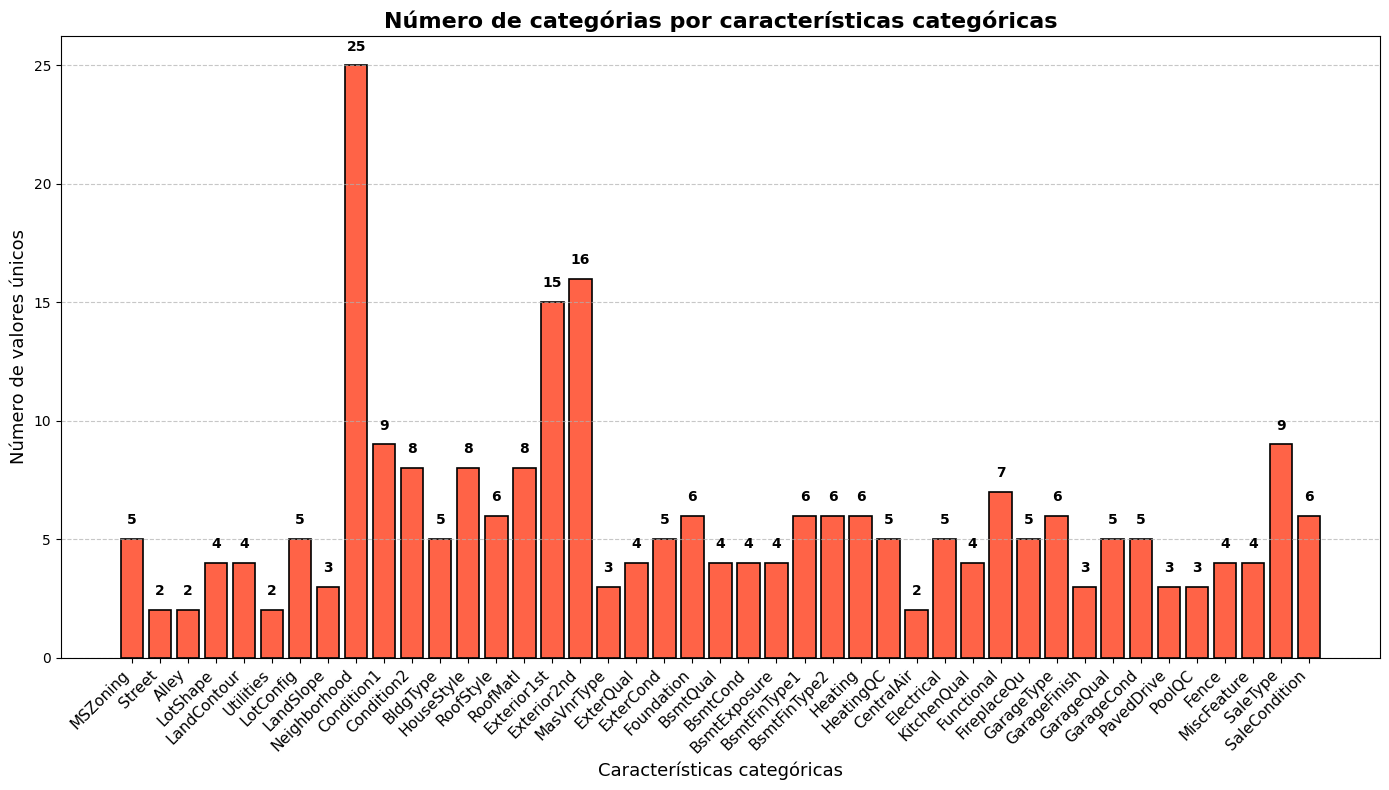

In [11]:
import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas
columnas_categoricas = df_train.select_dtypes(include=["object"])

# Calcular el número de valores únicos por cada columna categórica
valores_unicos = {col: columnas_categoricas[col].nunique() for col in columnas_categoricas.columns}

# Graficar los resultados con barras de un nuevo color
plt.figure(figsize=(14, 8))
bars = plt.bar(
    valores_unicos.keys(),
    valores_unicos.values(),
    color="#FF6347",  # Color rojo anaranjado para todas las barras
    edgecolor="black",
    linewidth=1.2
)

# Añadir etiquetas de valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold")

# Título y etiquetas
plt.title("Número de categórias por características categóricas", fontsize=16, fontweight="bold")
plt.ylabel("Número de valores únicos", fontsize=13)
plt.xlabel("Características categóricas", fontsize=13)
plt.xticks(rotation=45, ha="right", fontsize=11)

# Estilo de cuadrícula
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show()


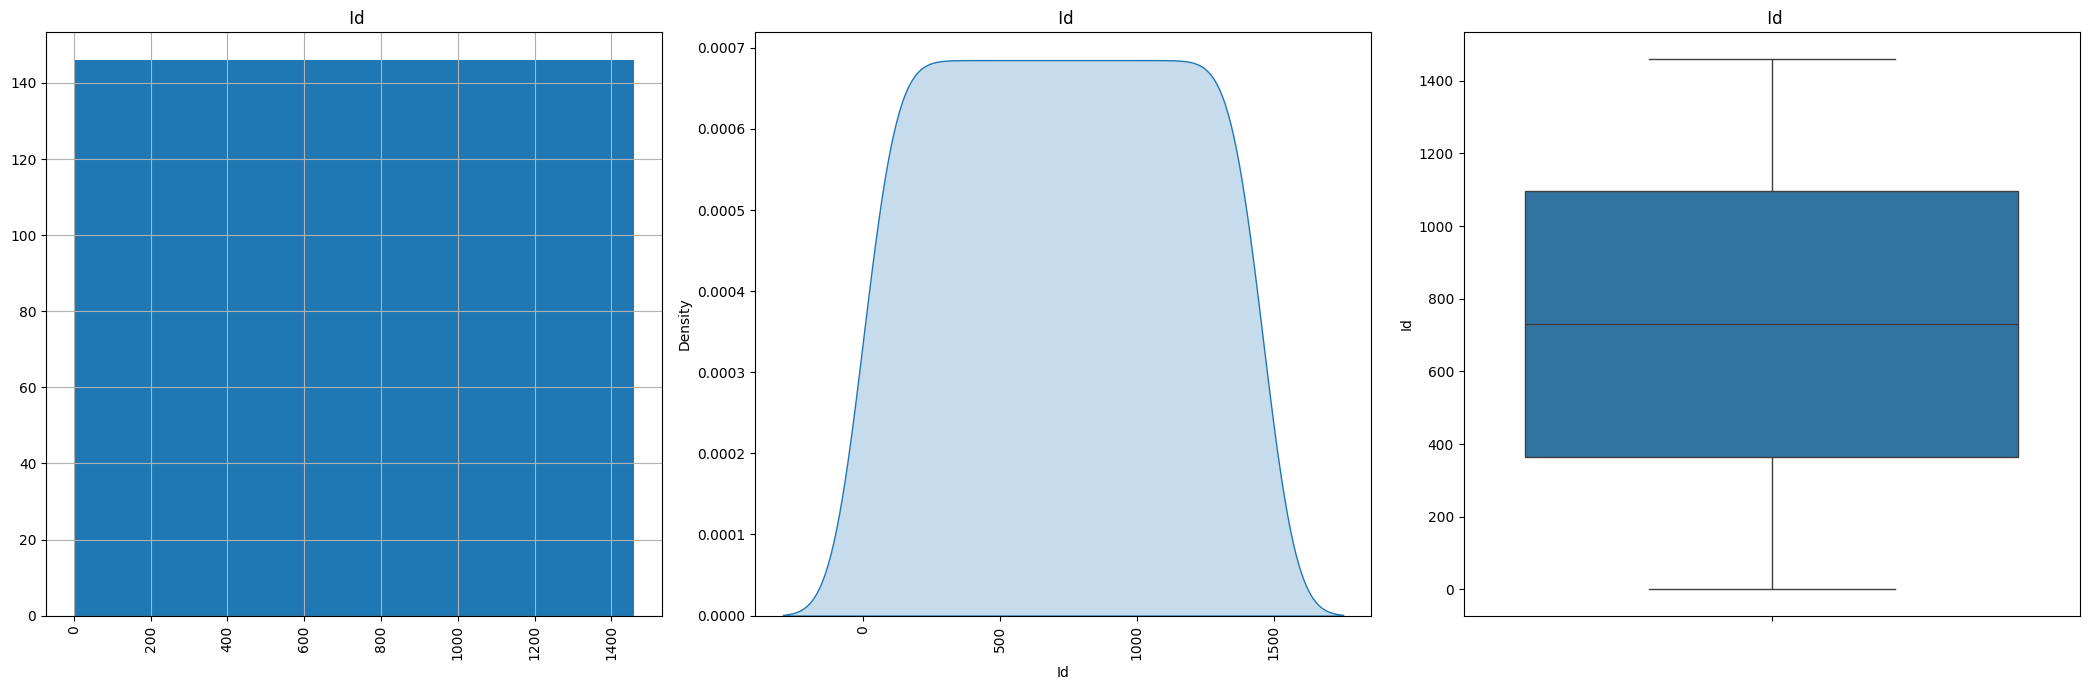

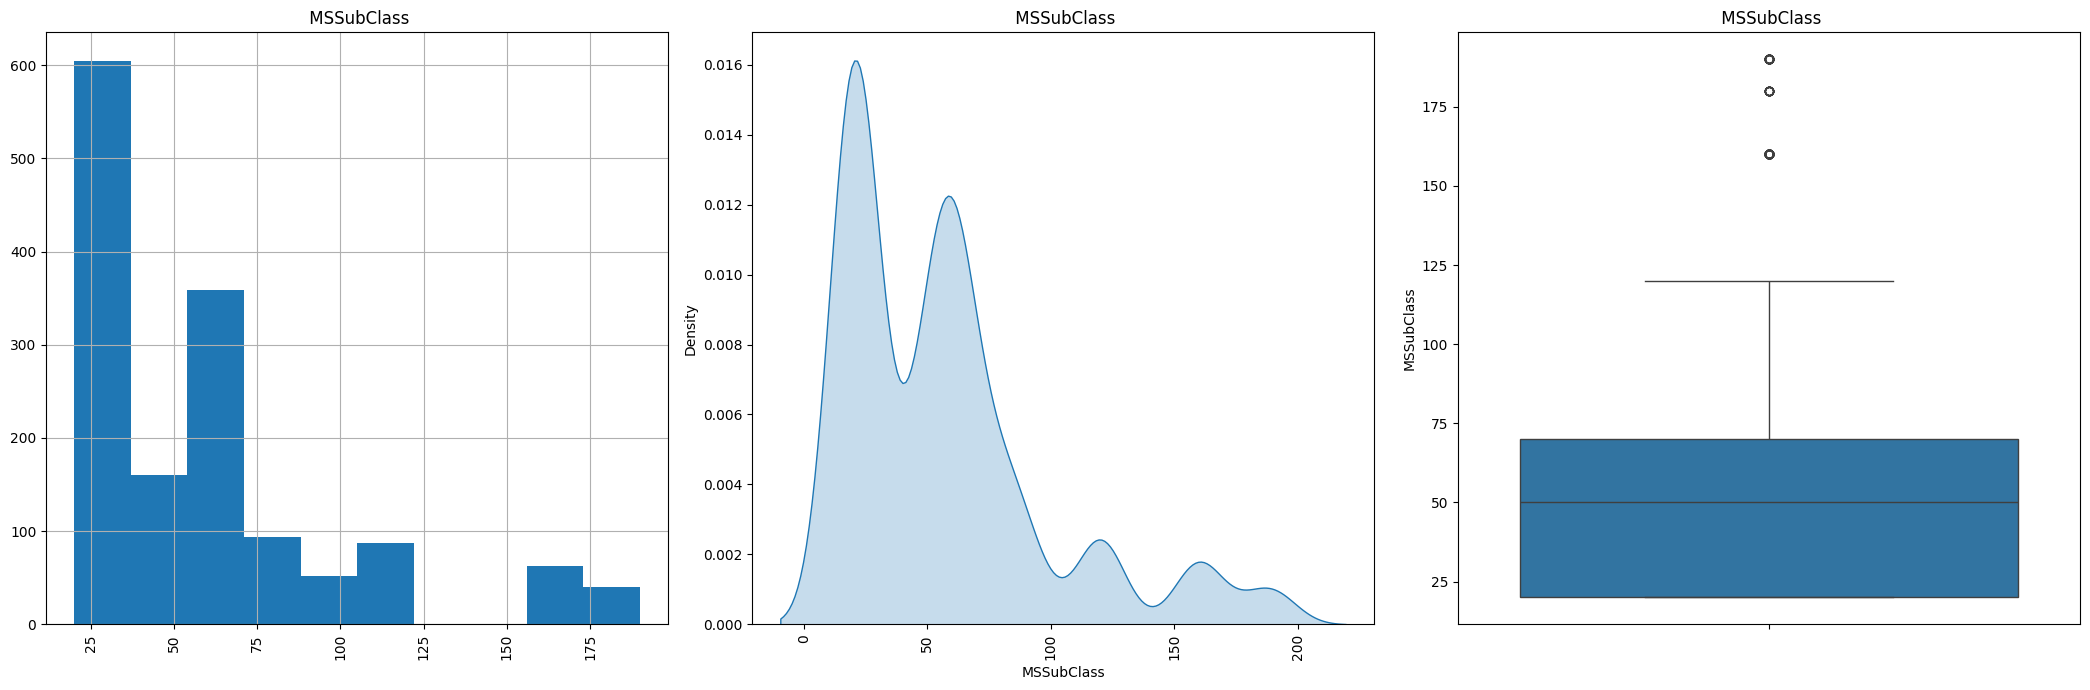

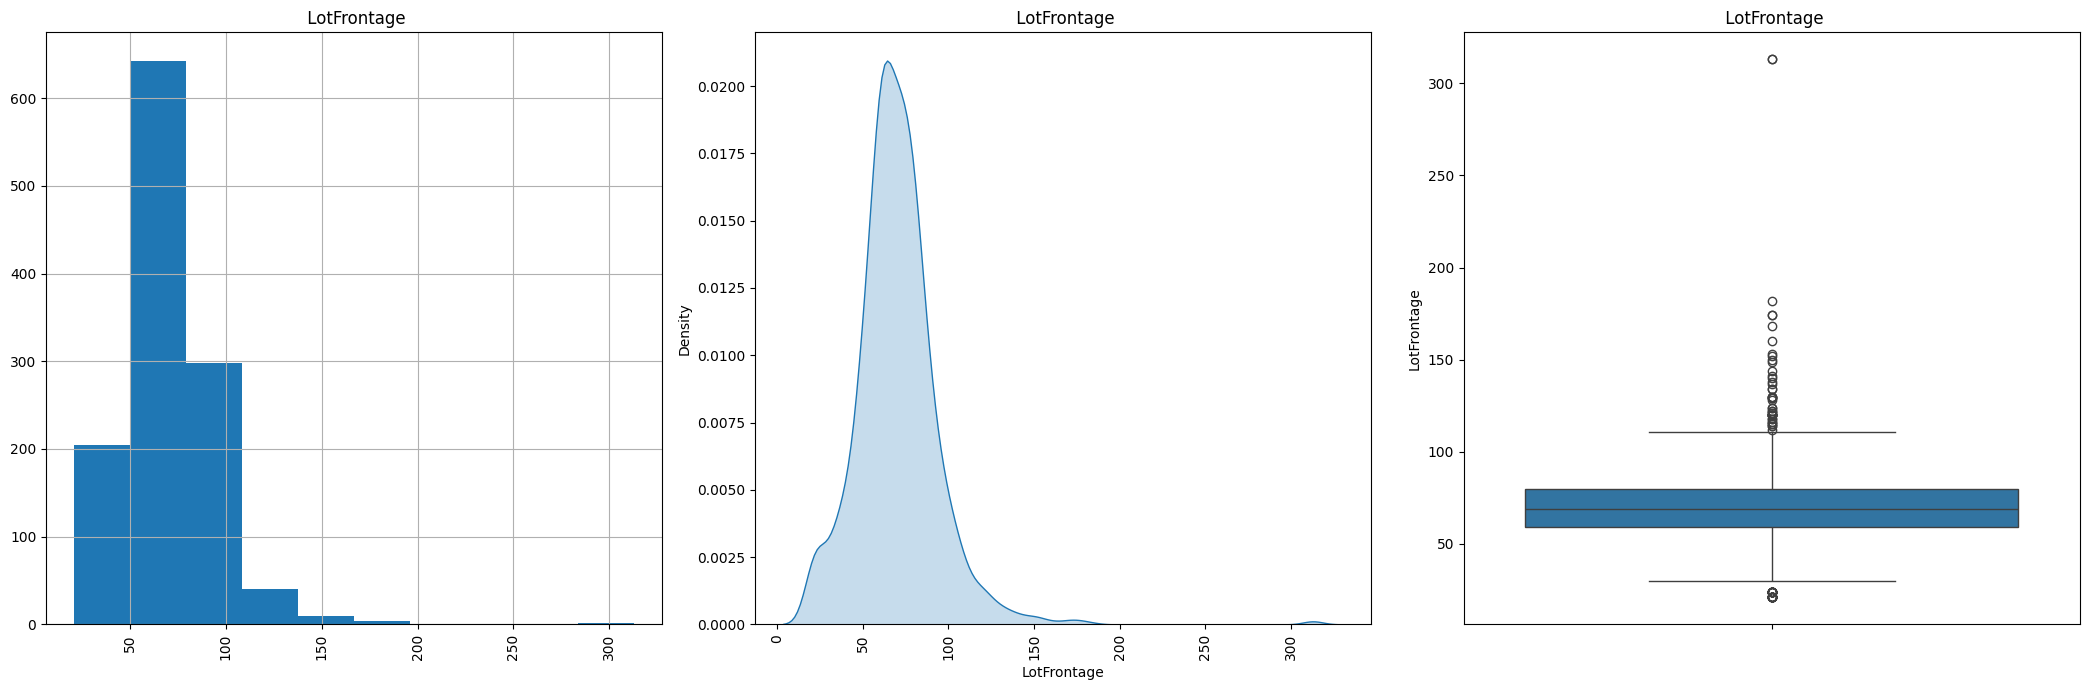

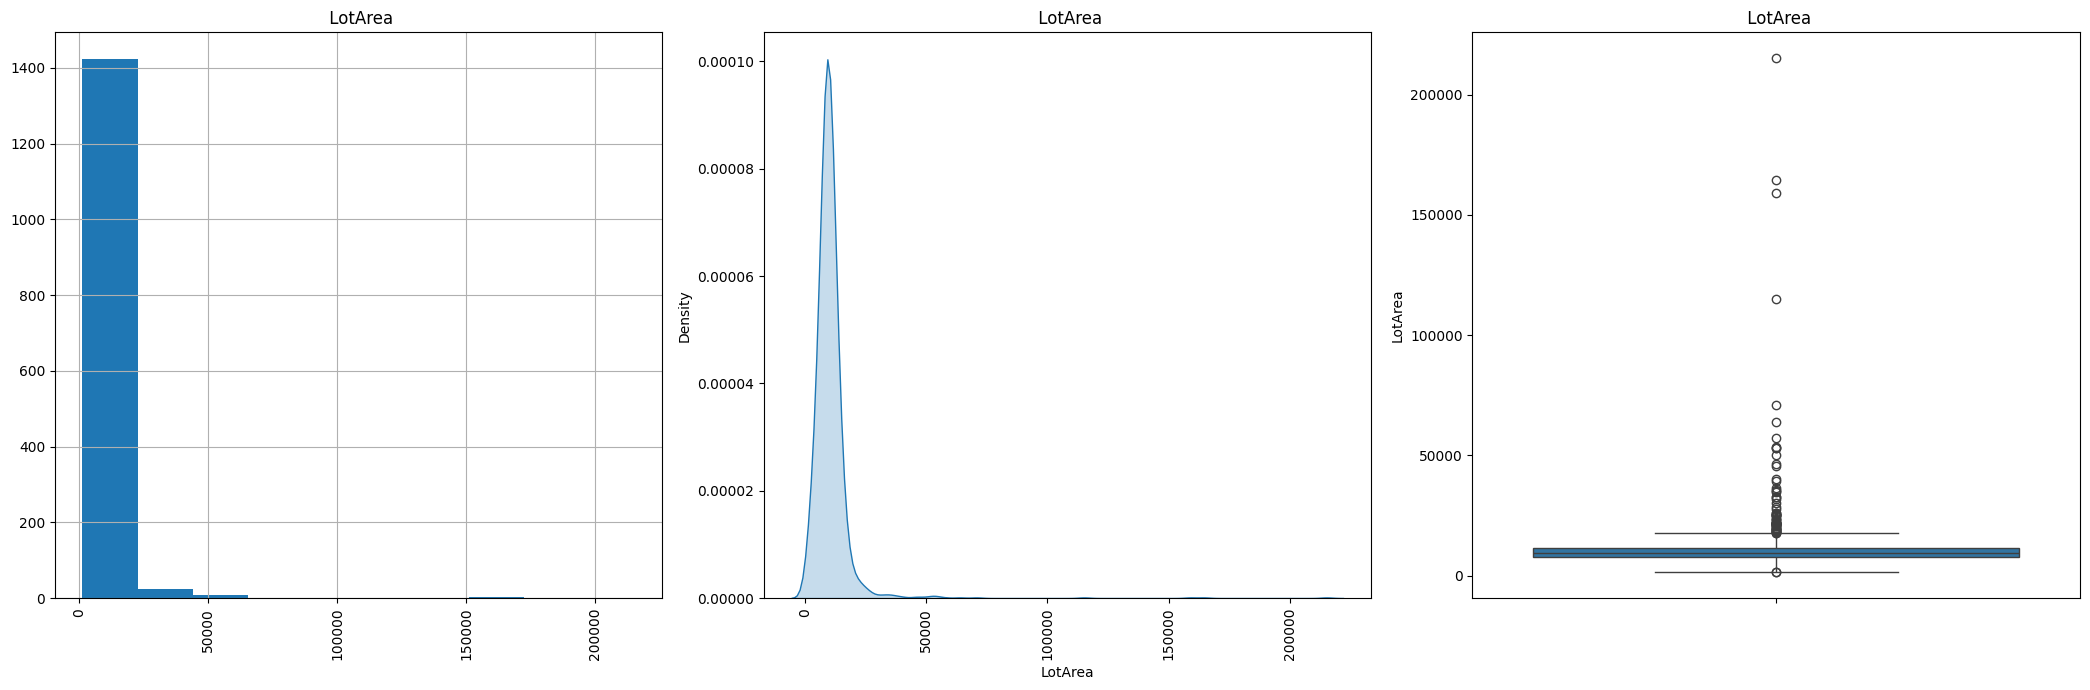

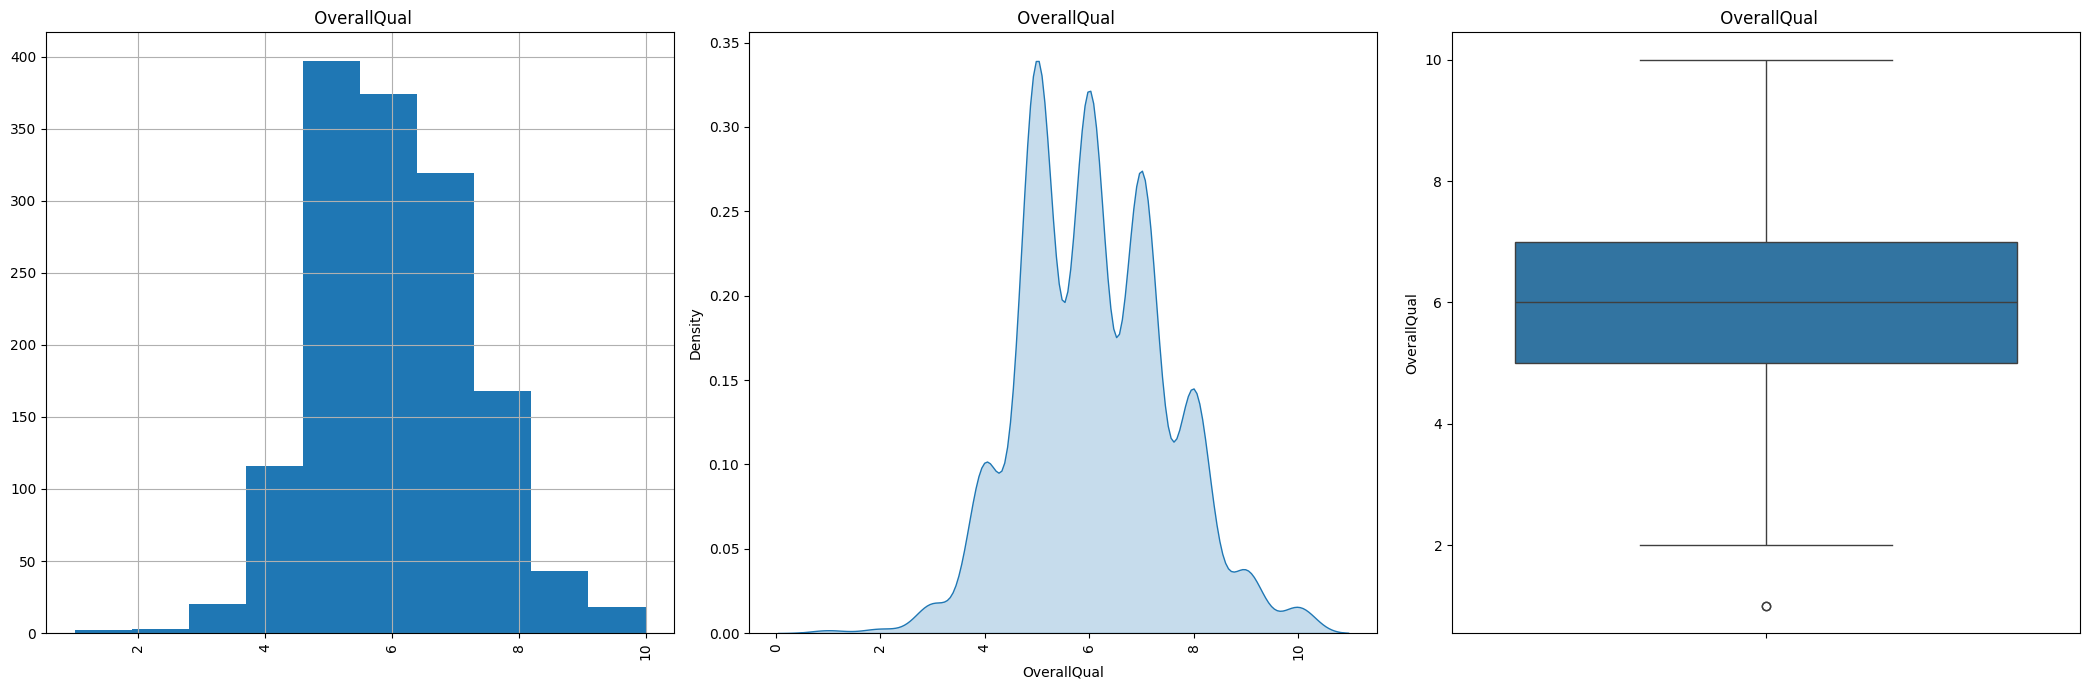

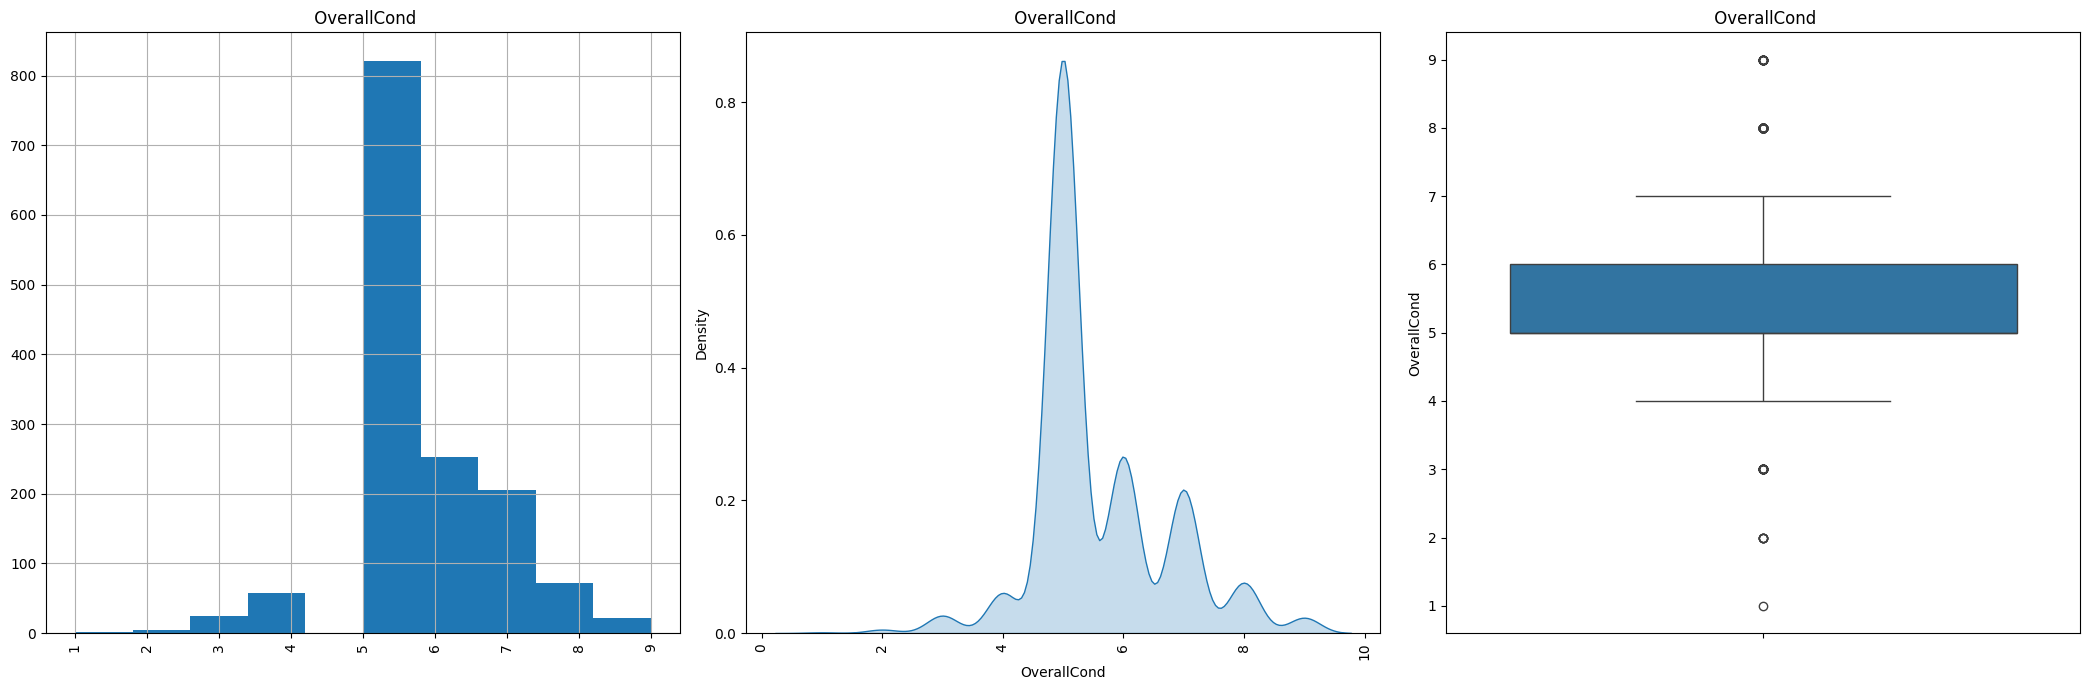

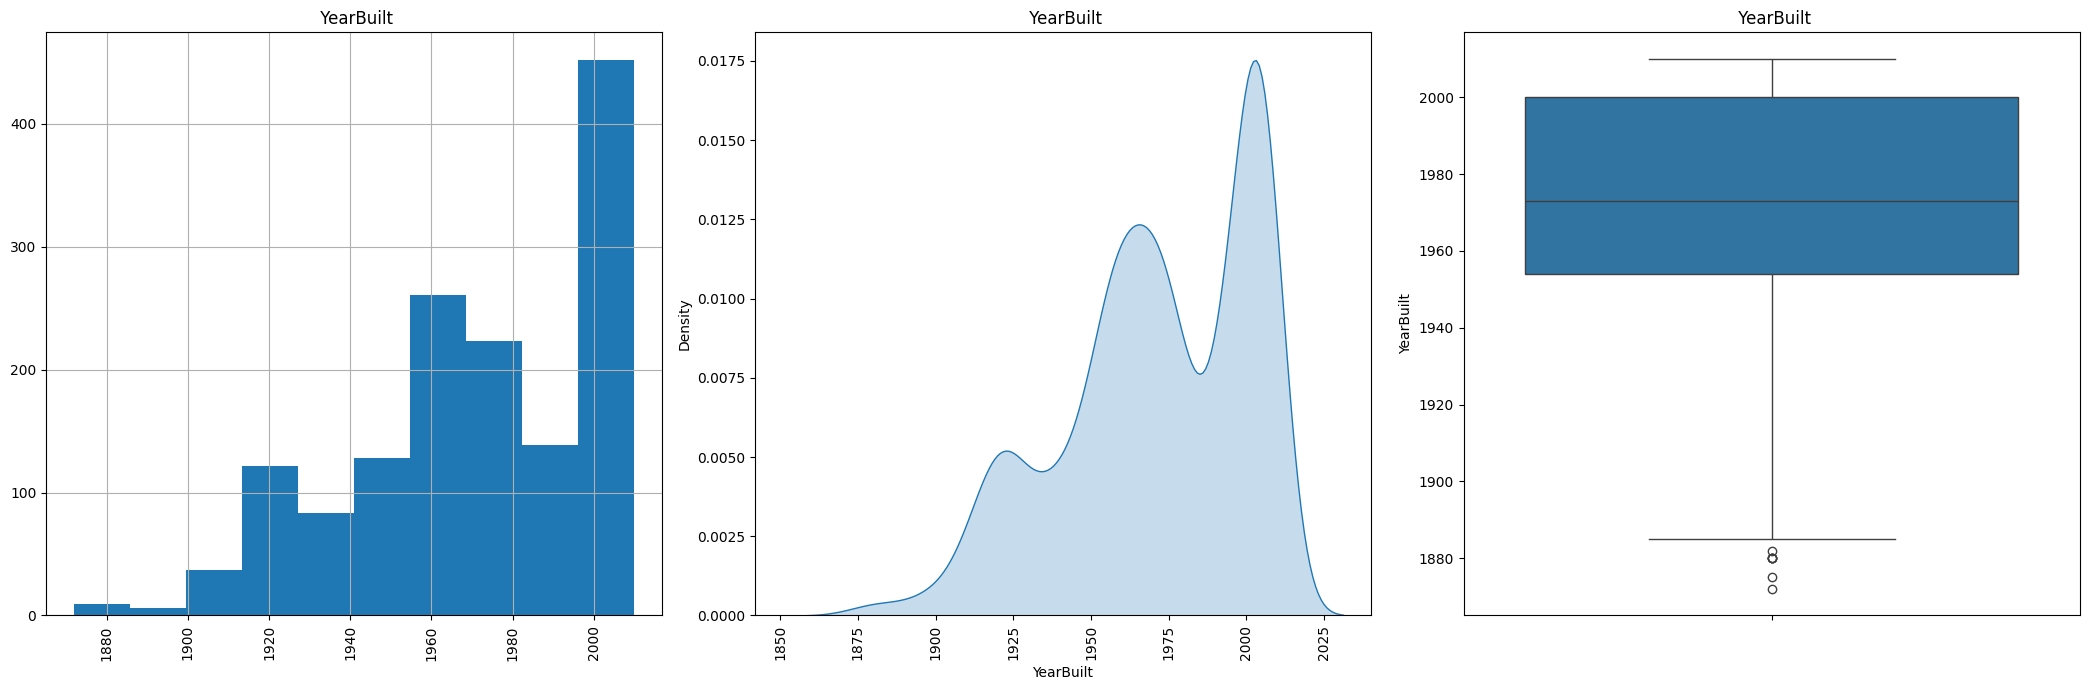

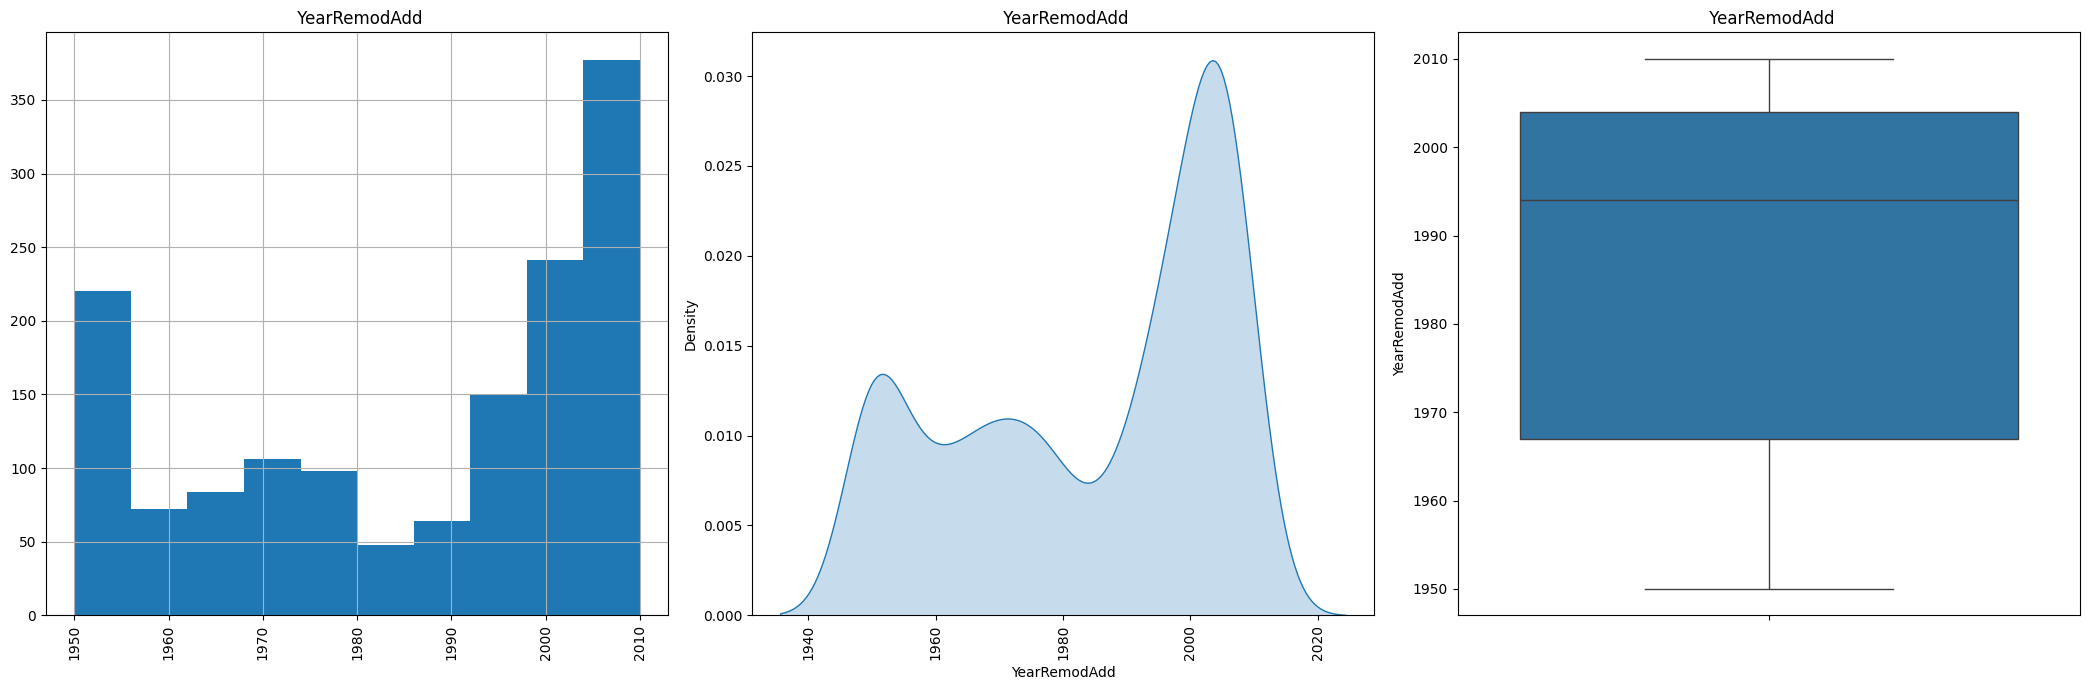

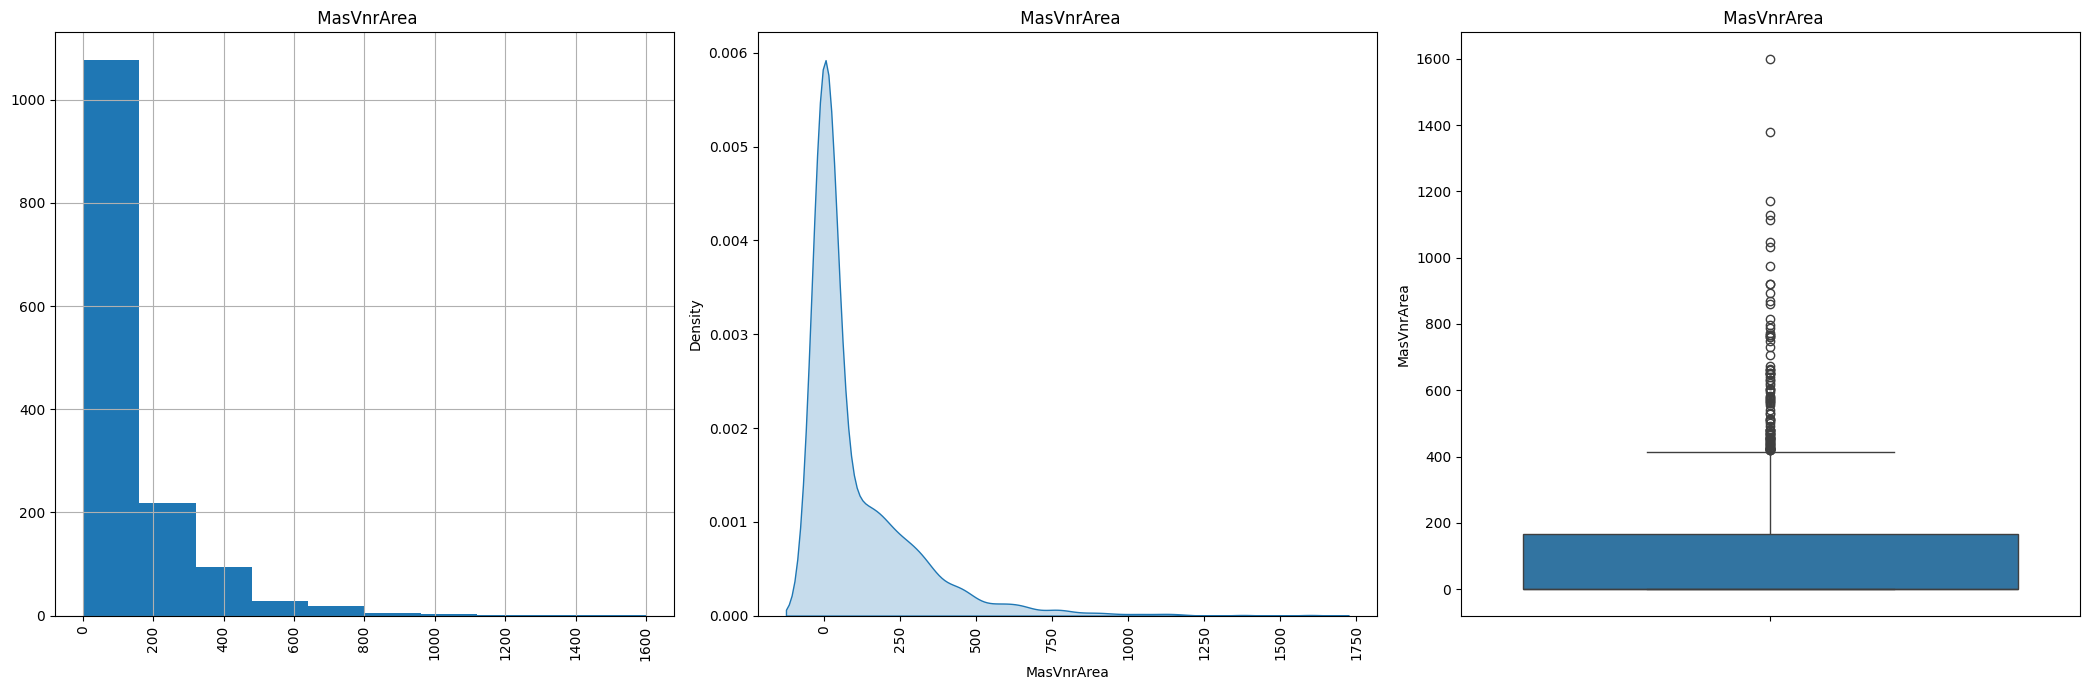

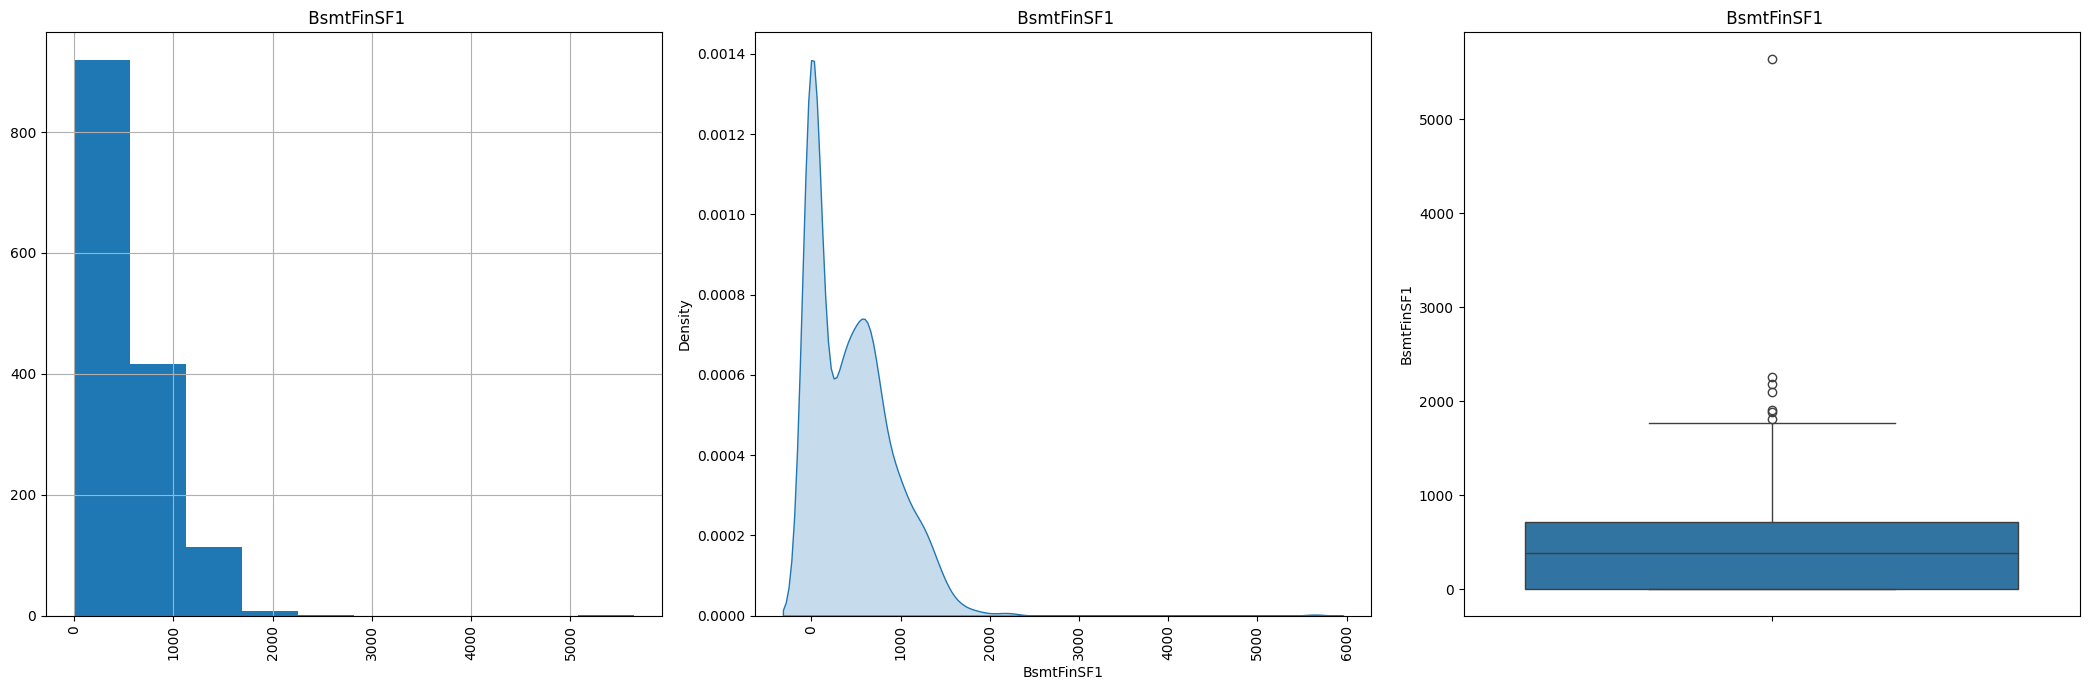

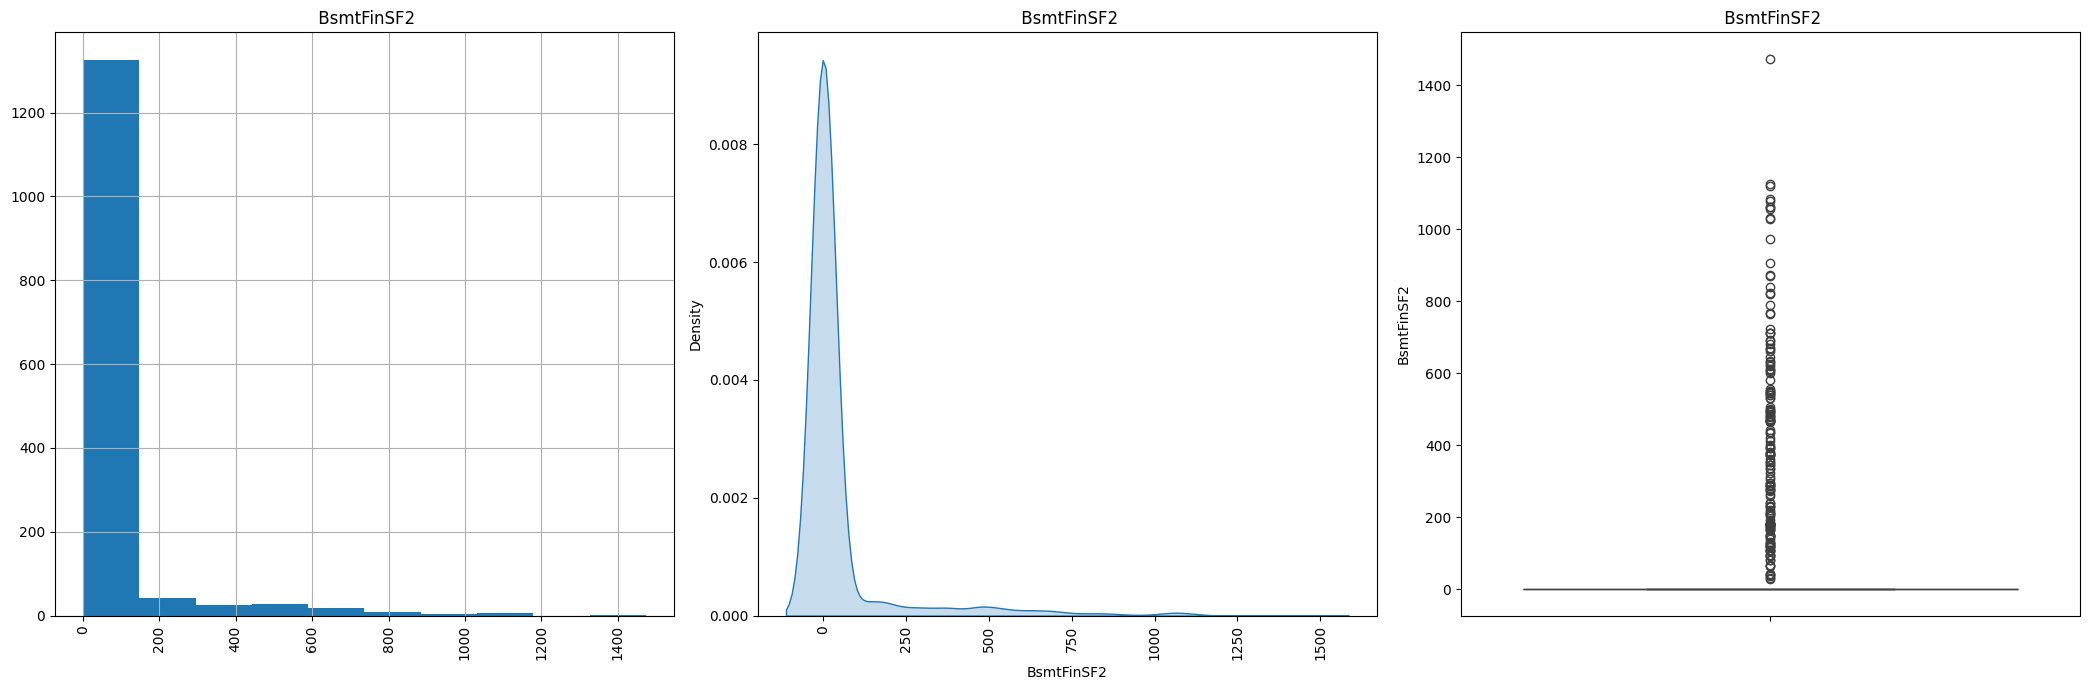

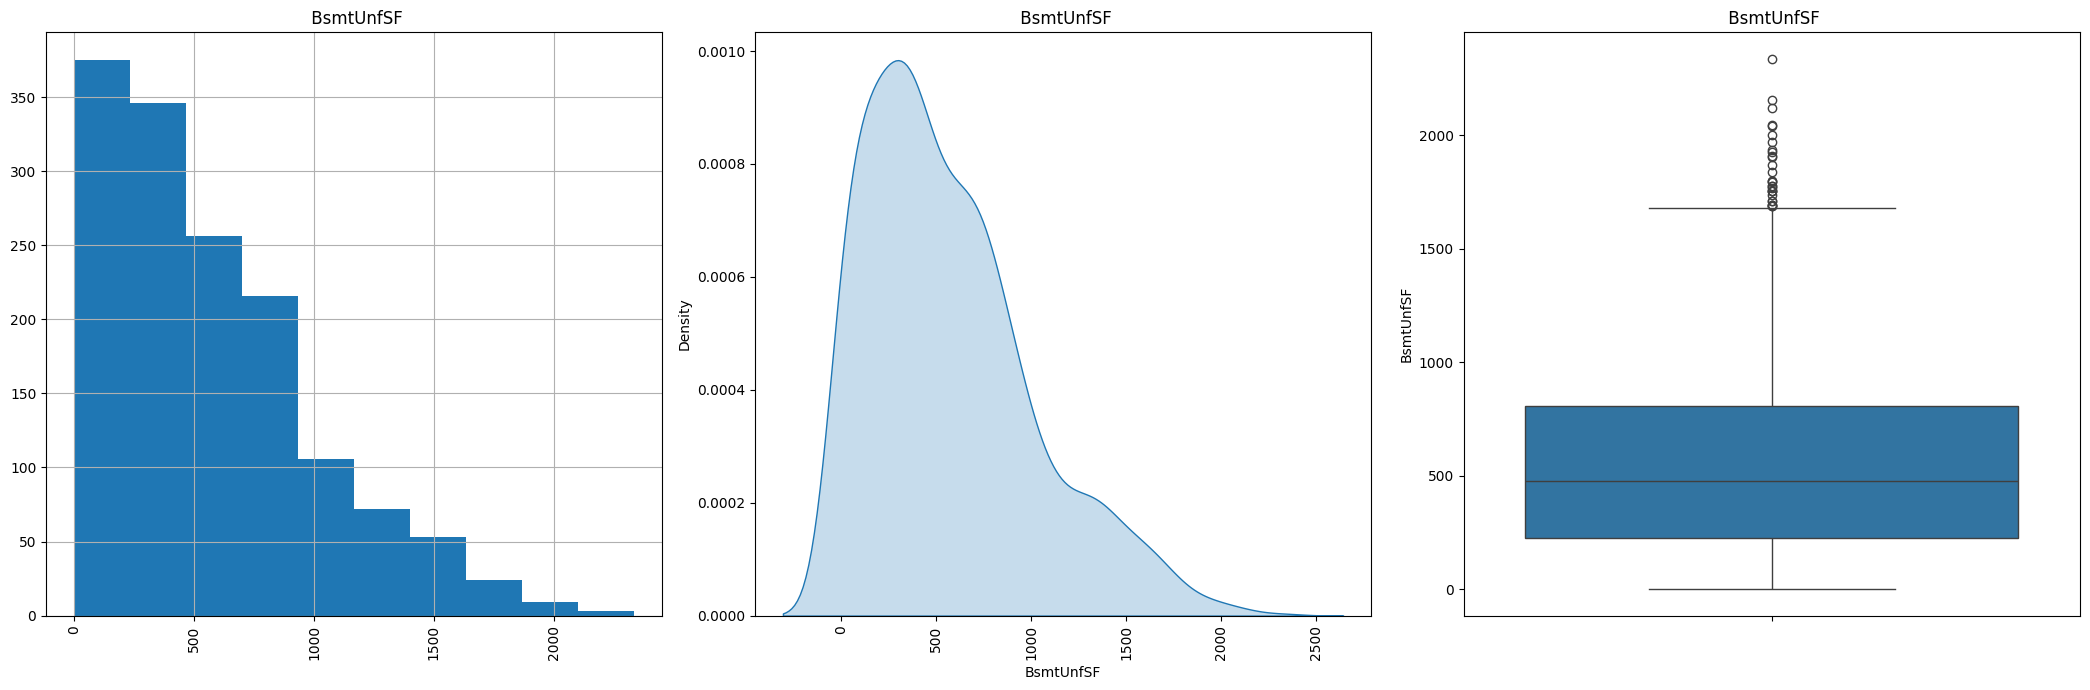

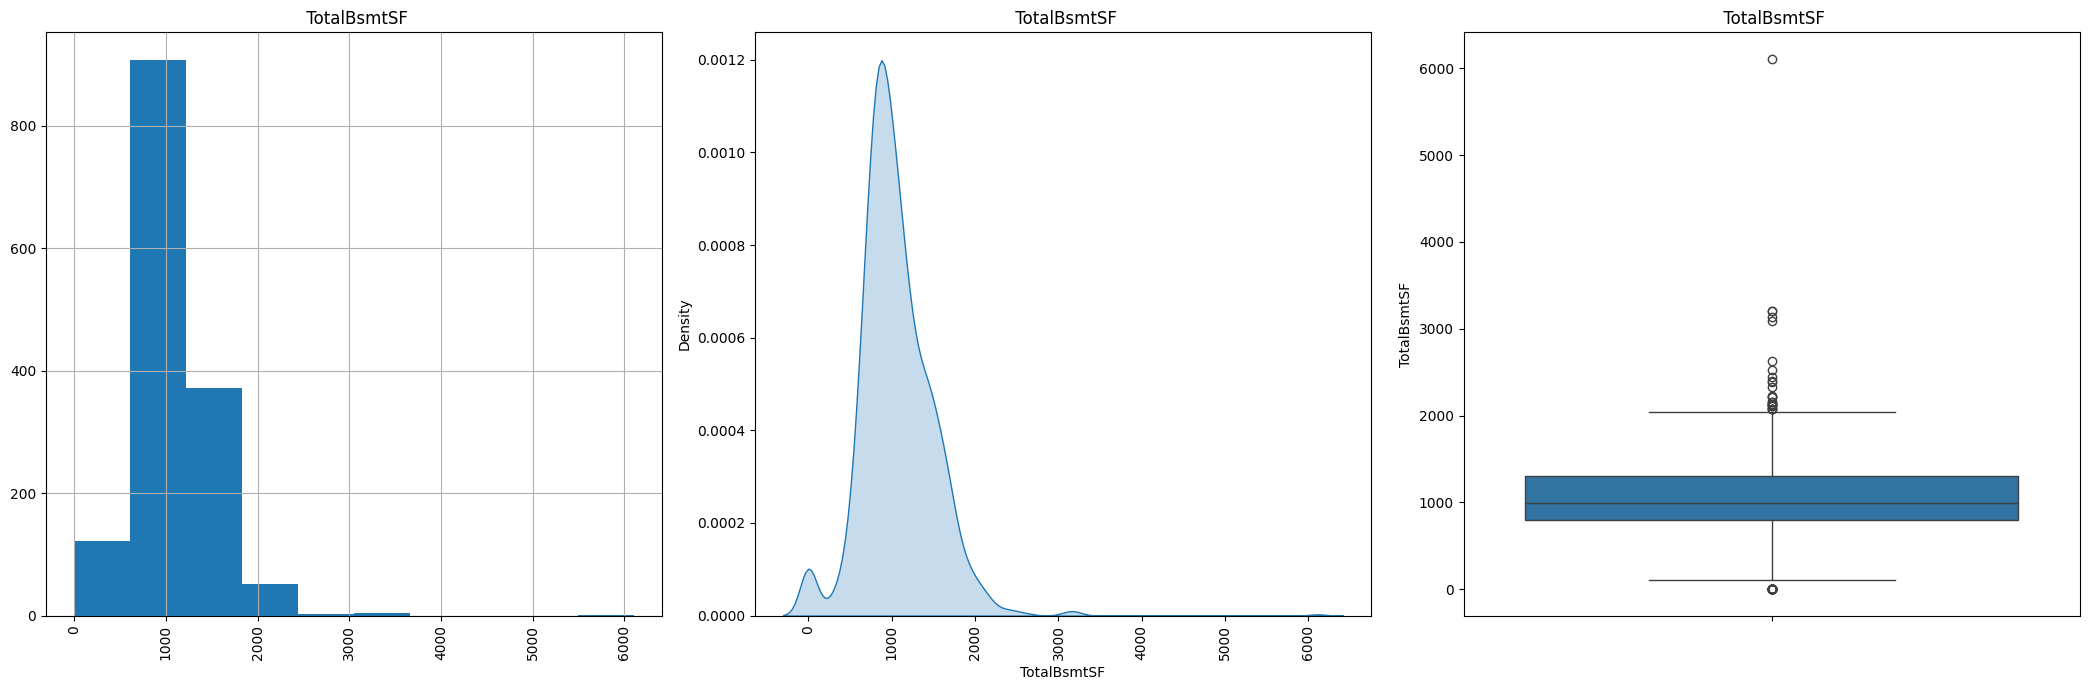

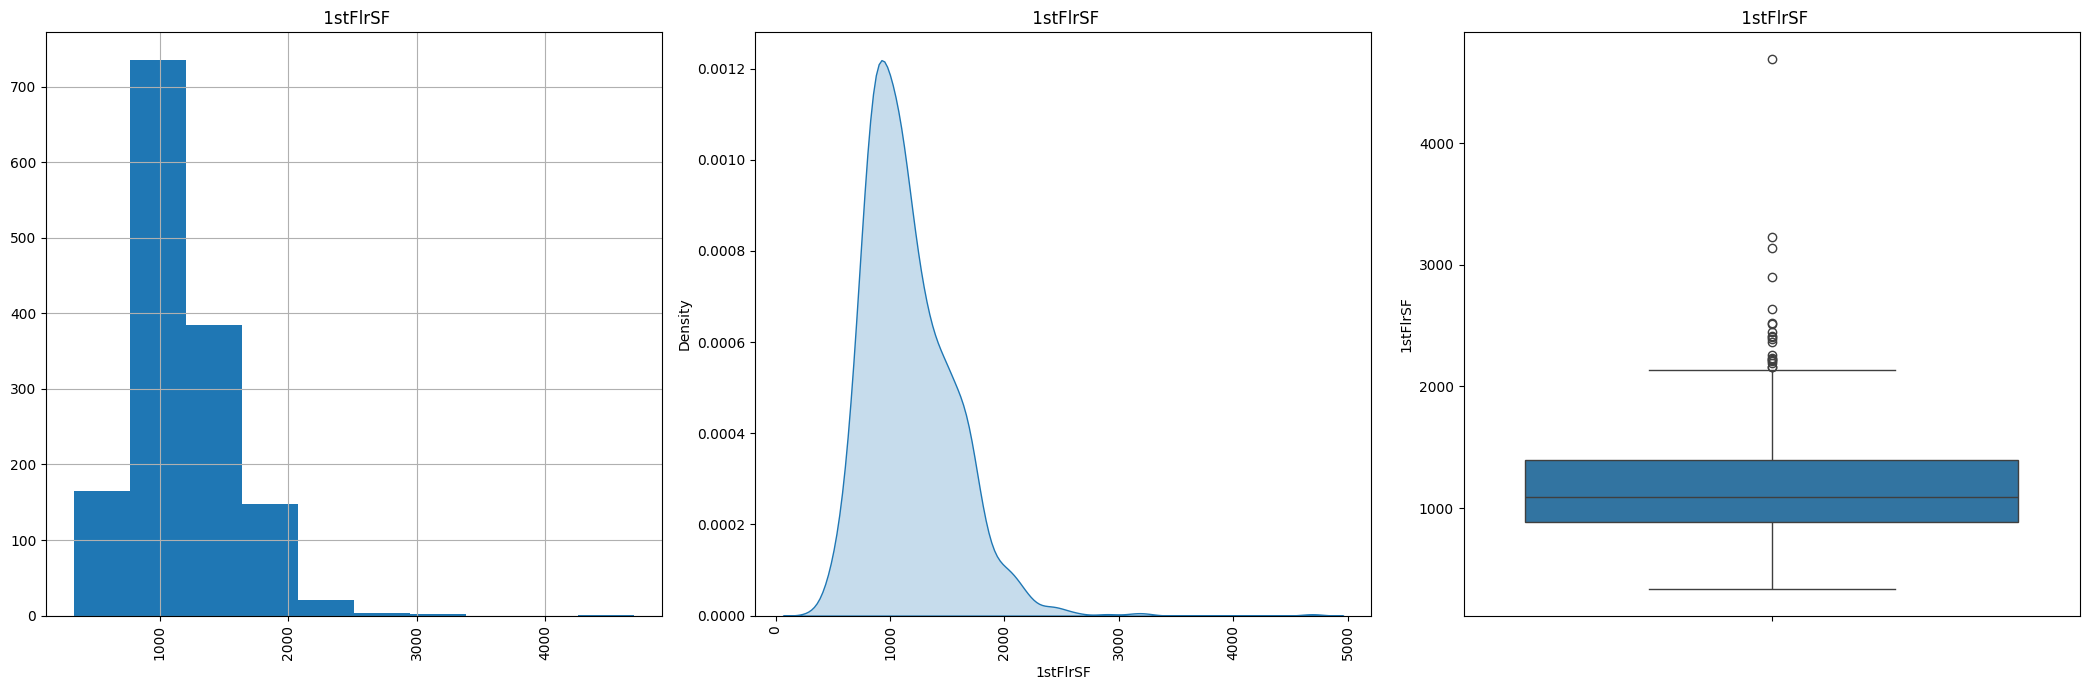

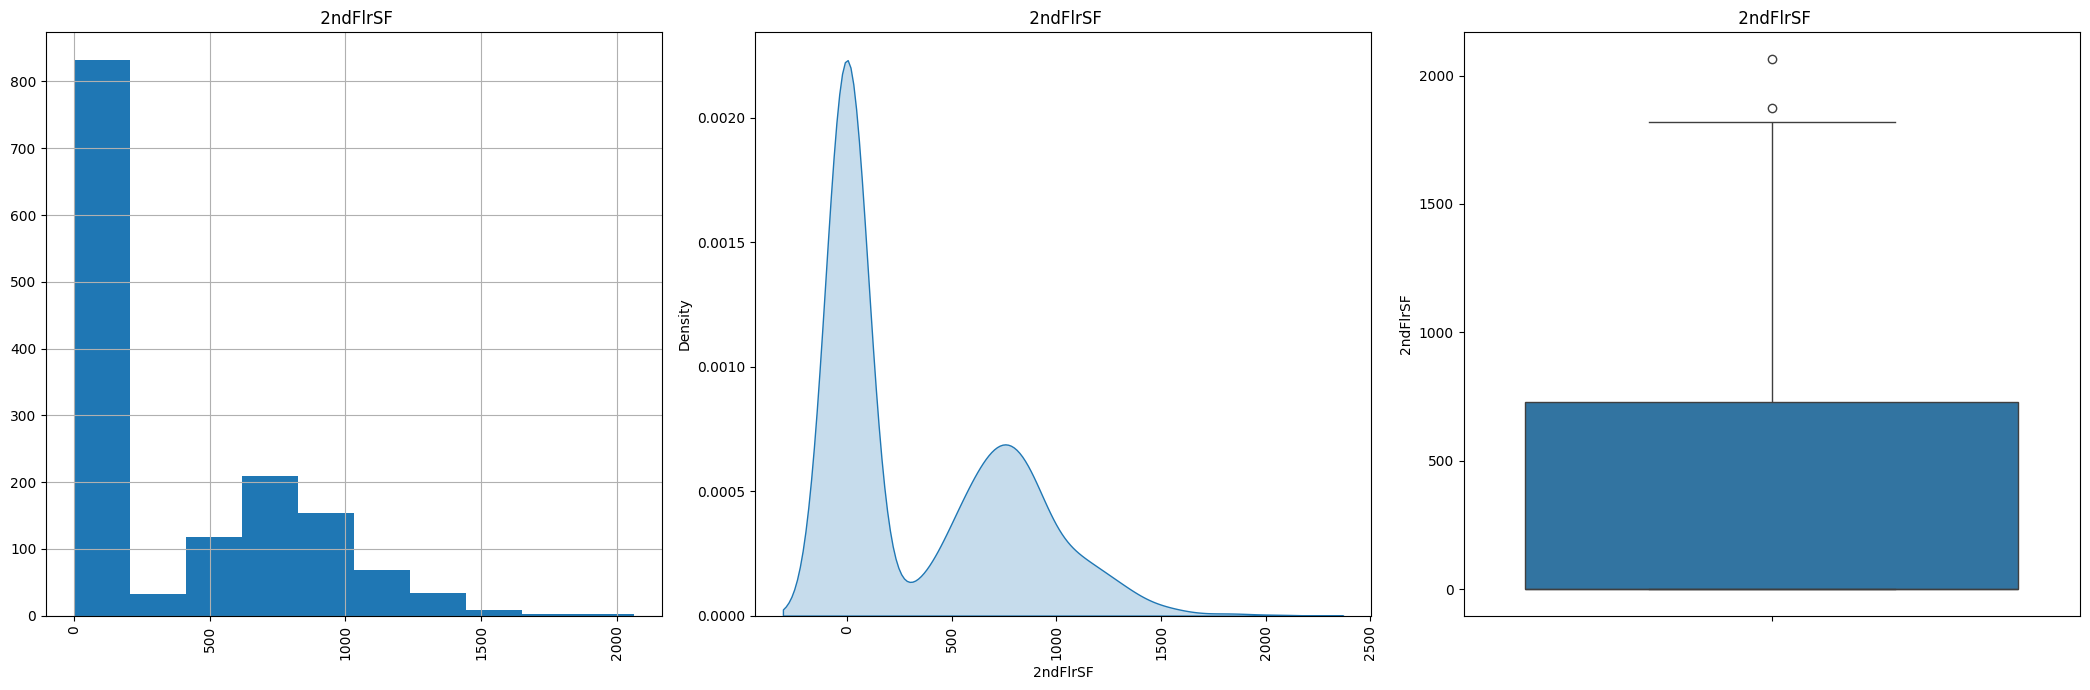

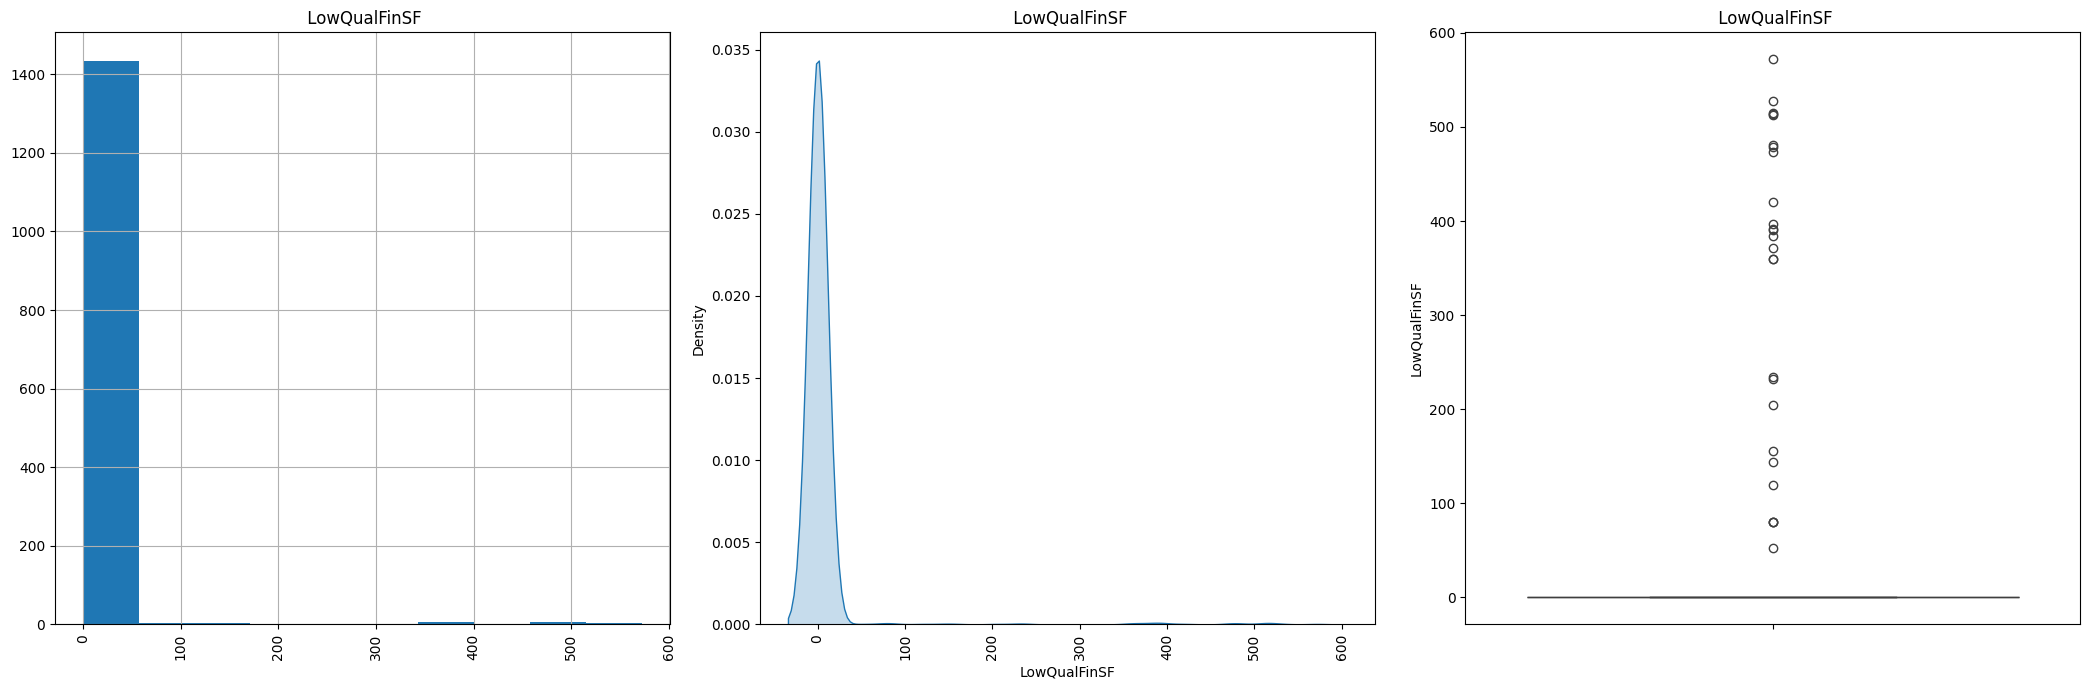

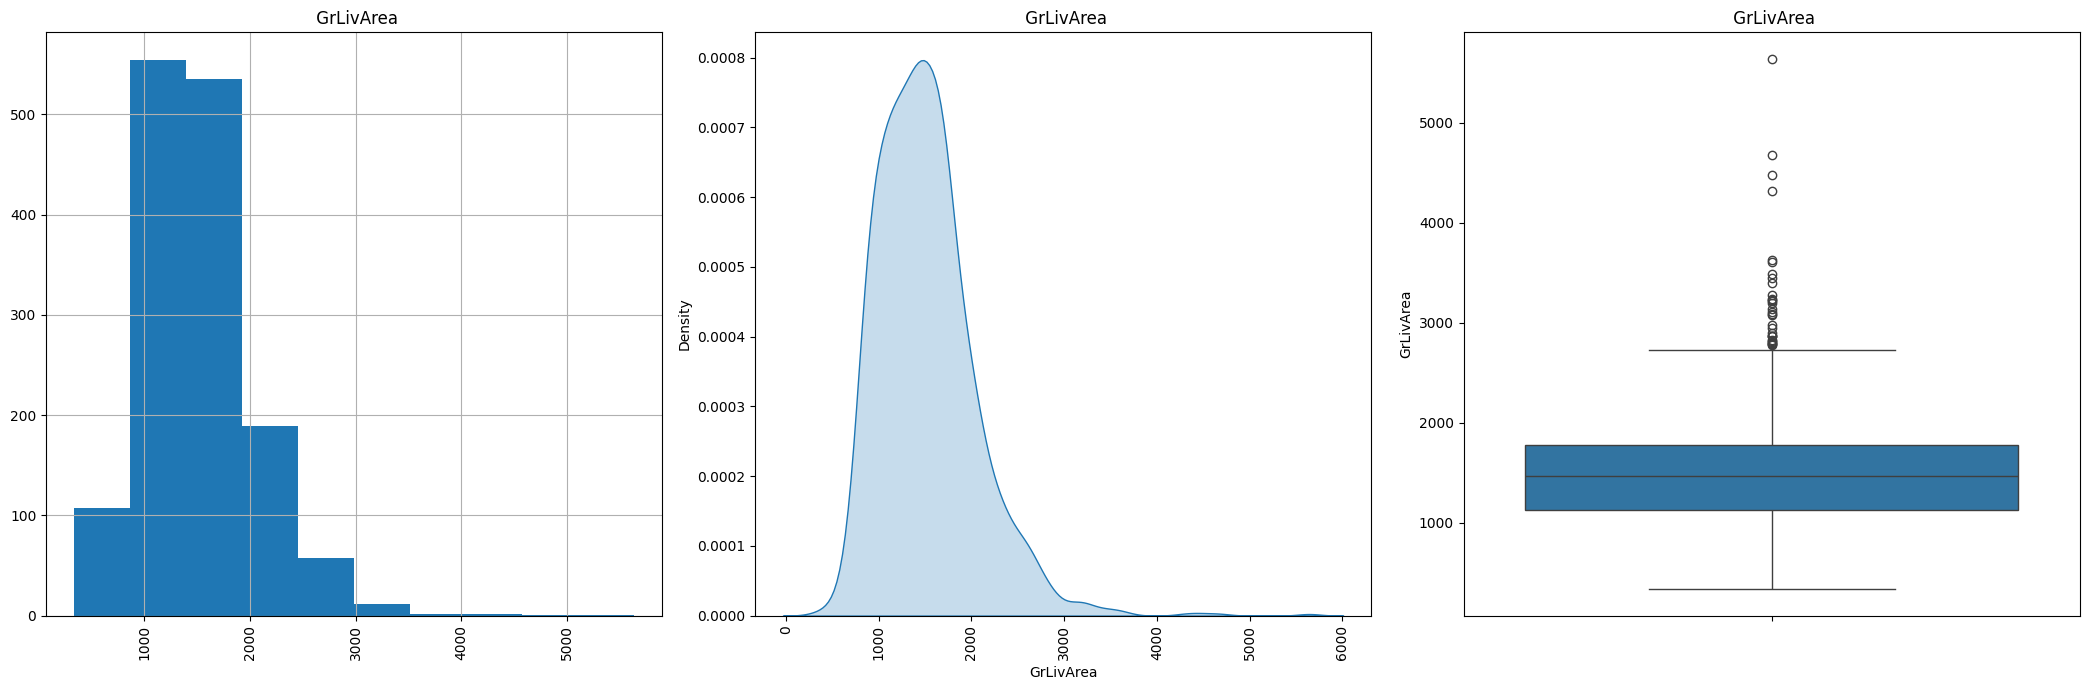

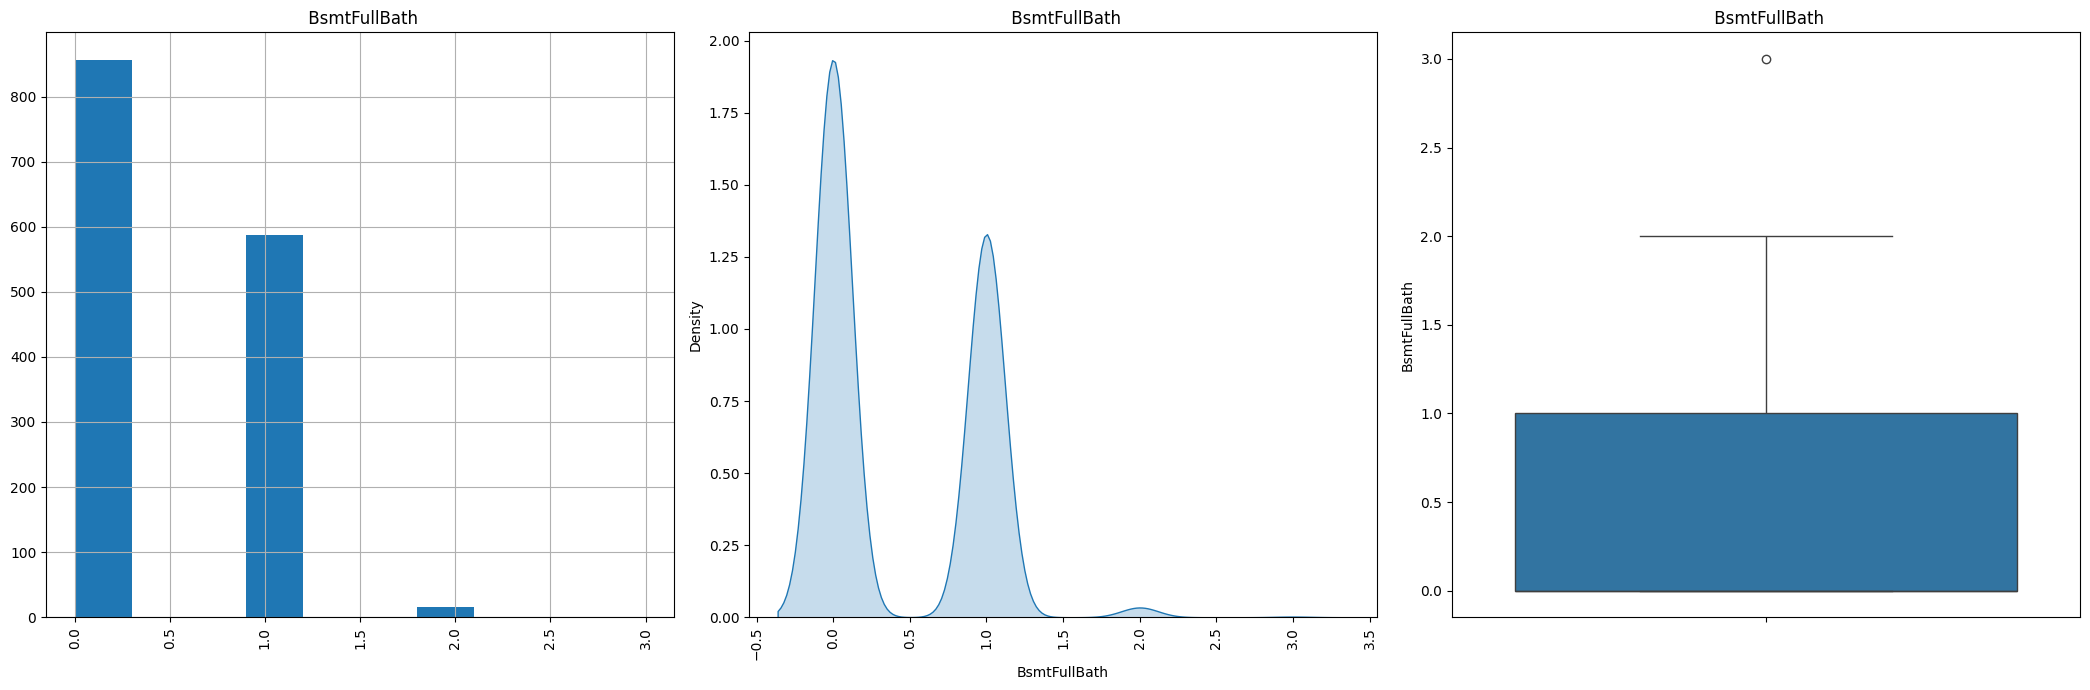

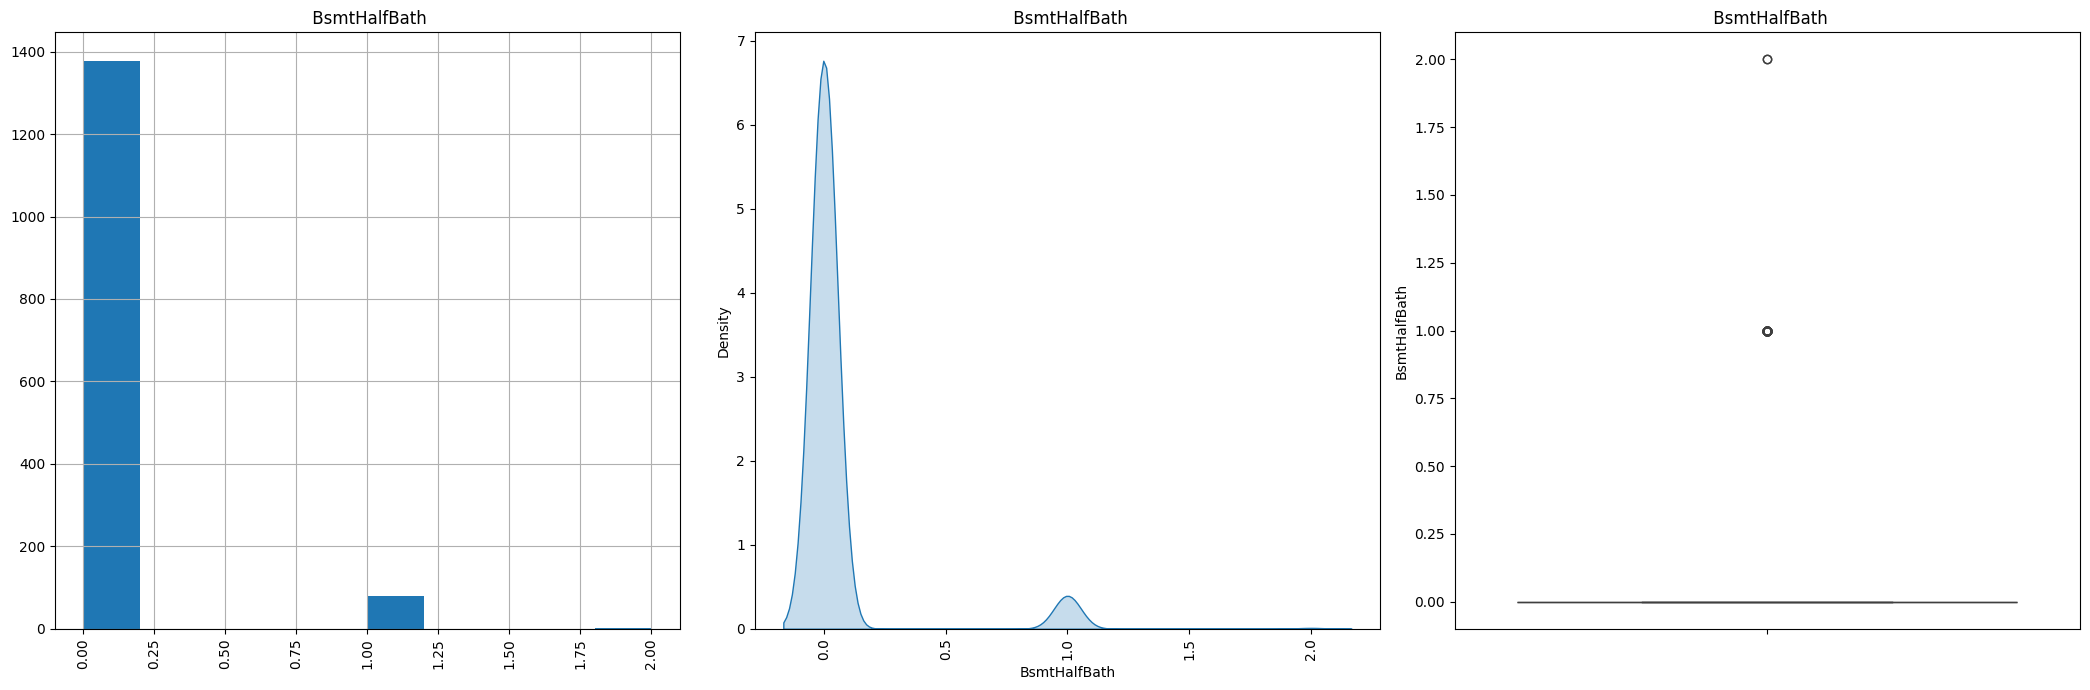

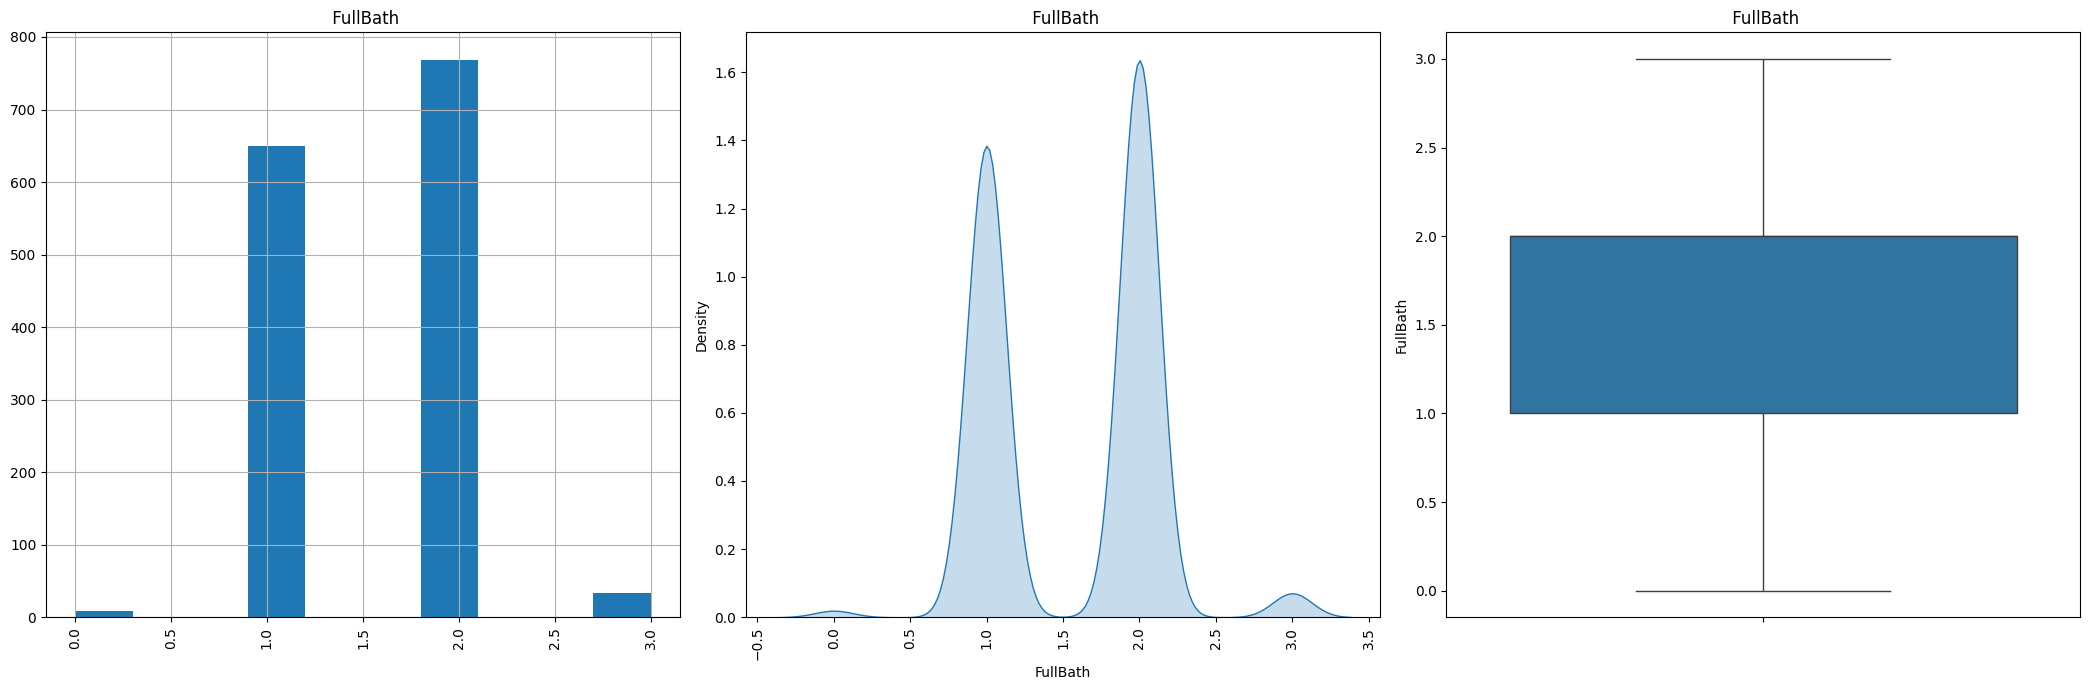

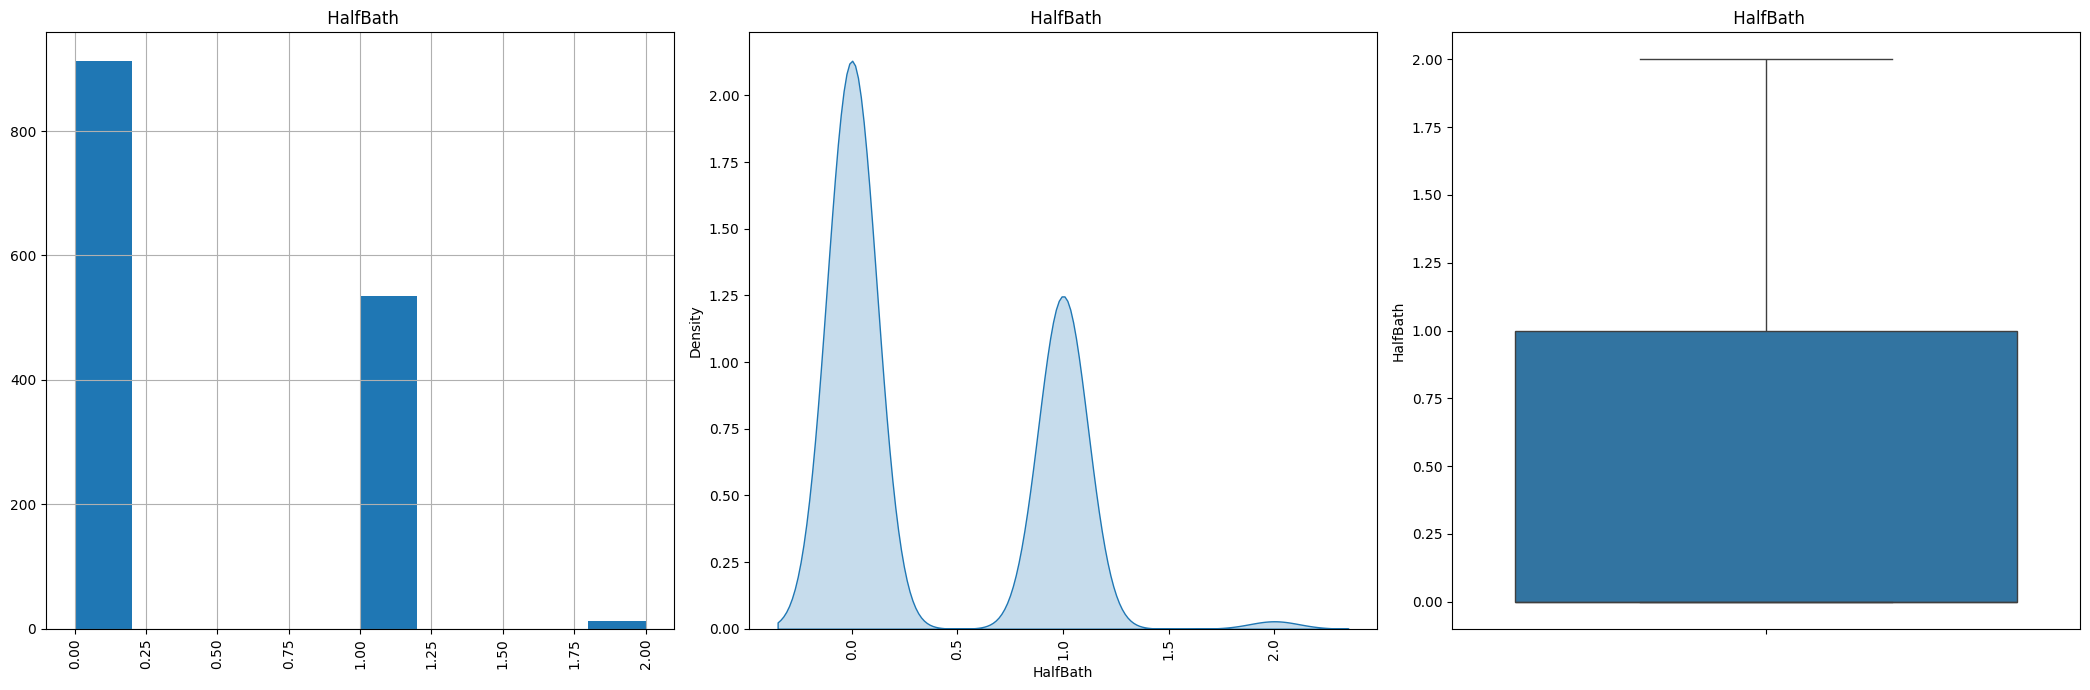

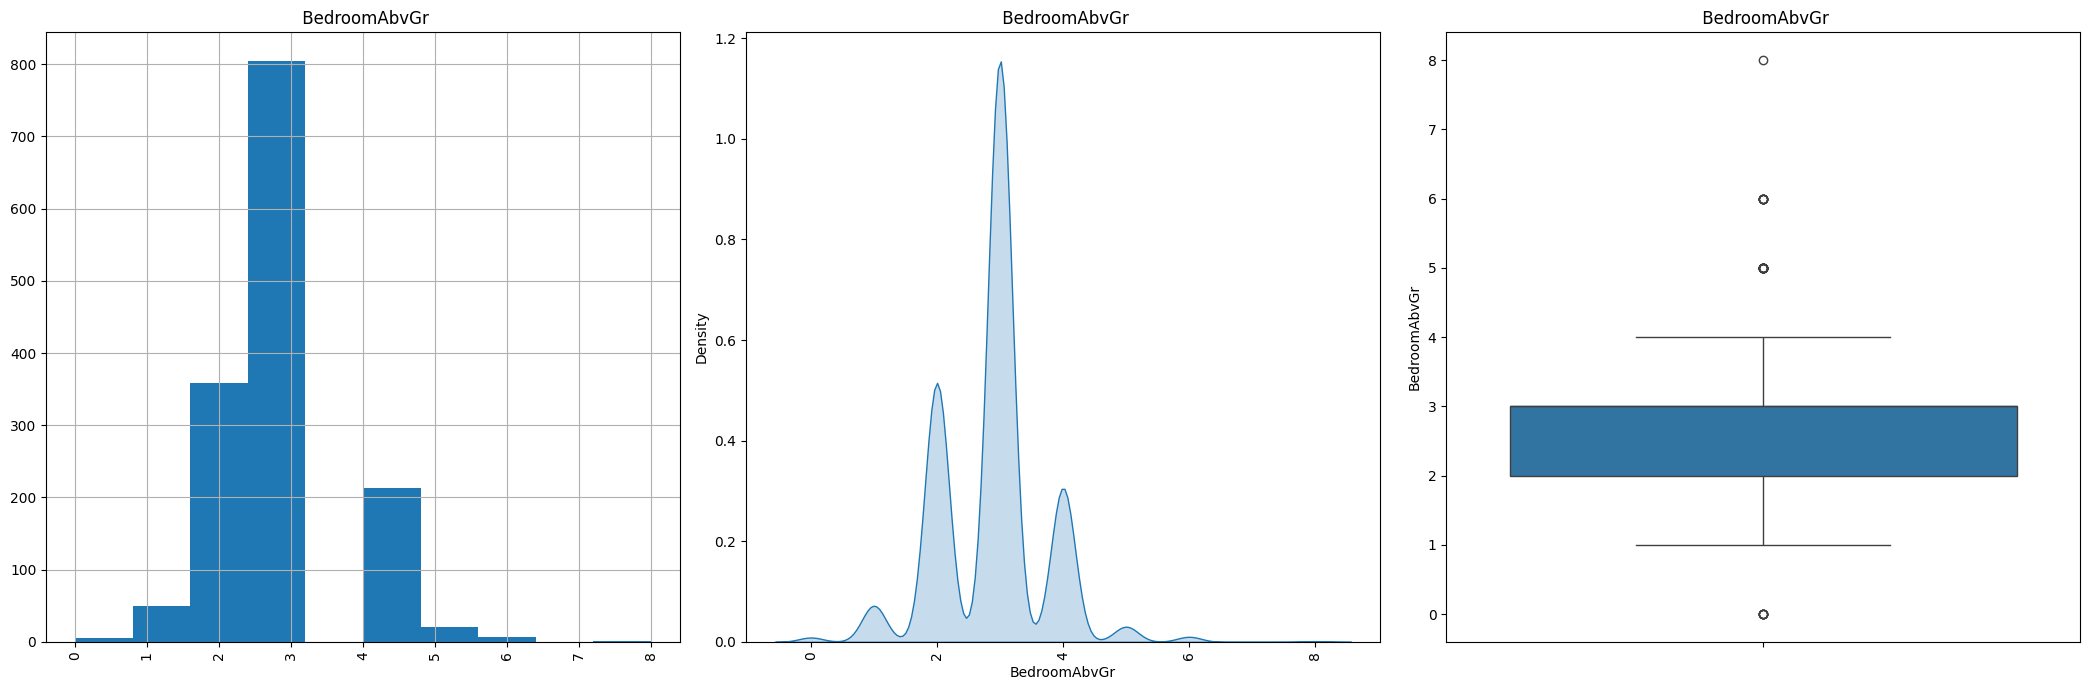

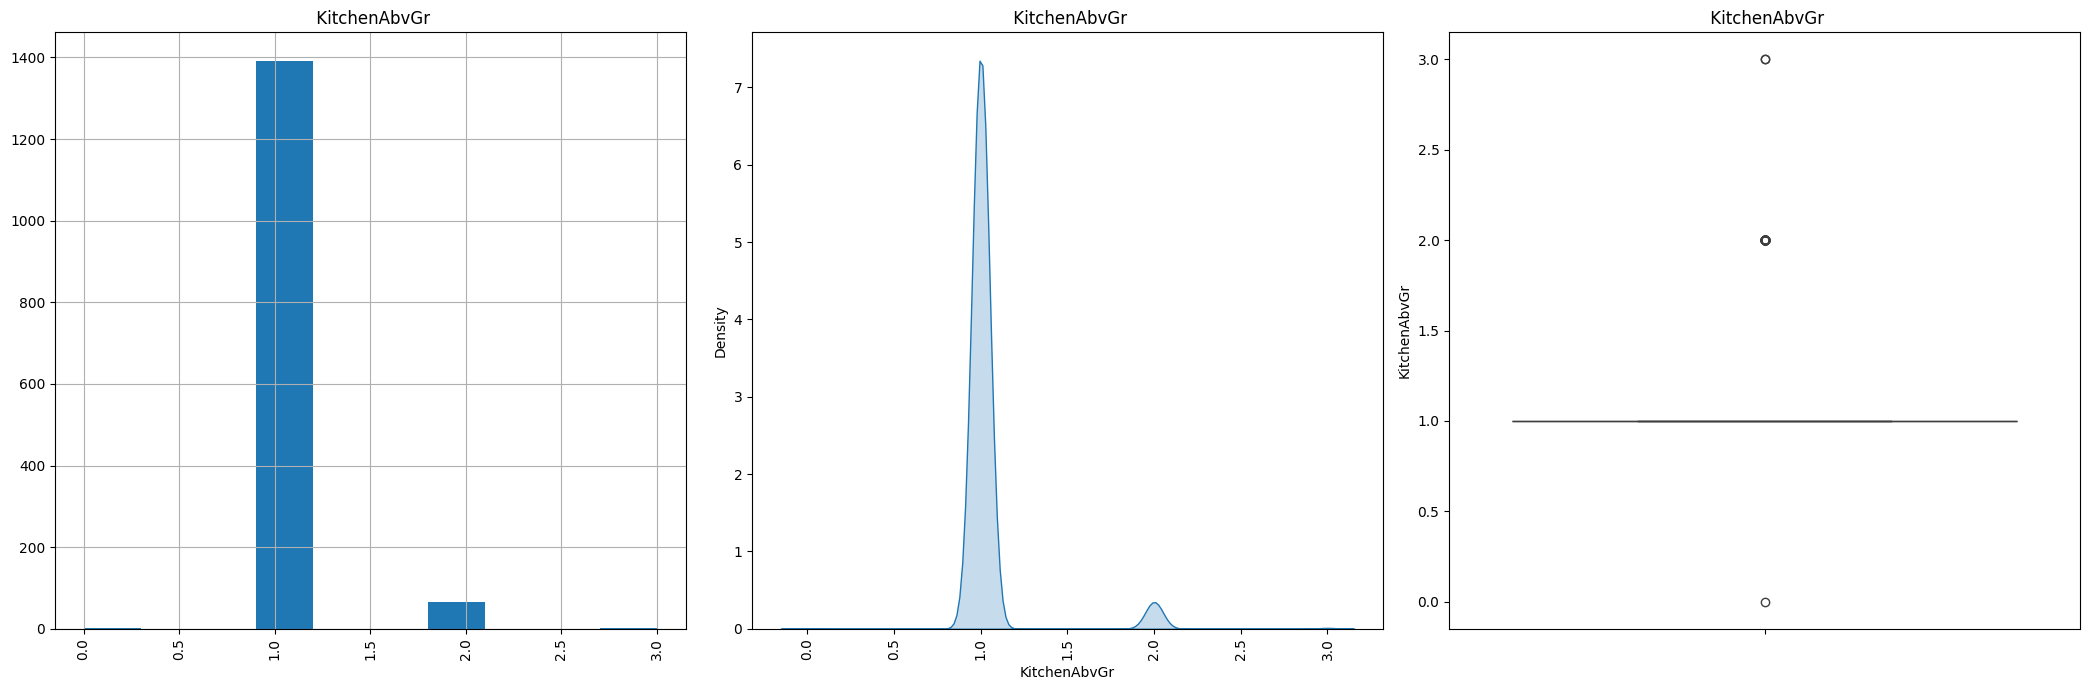

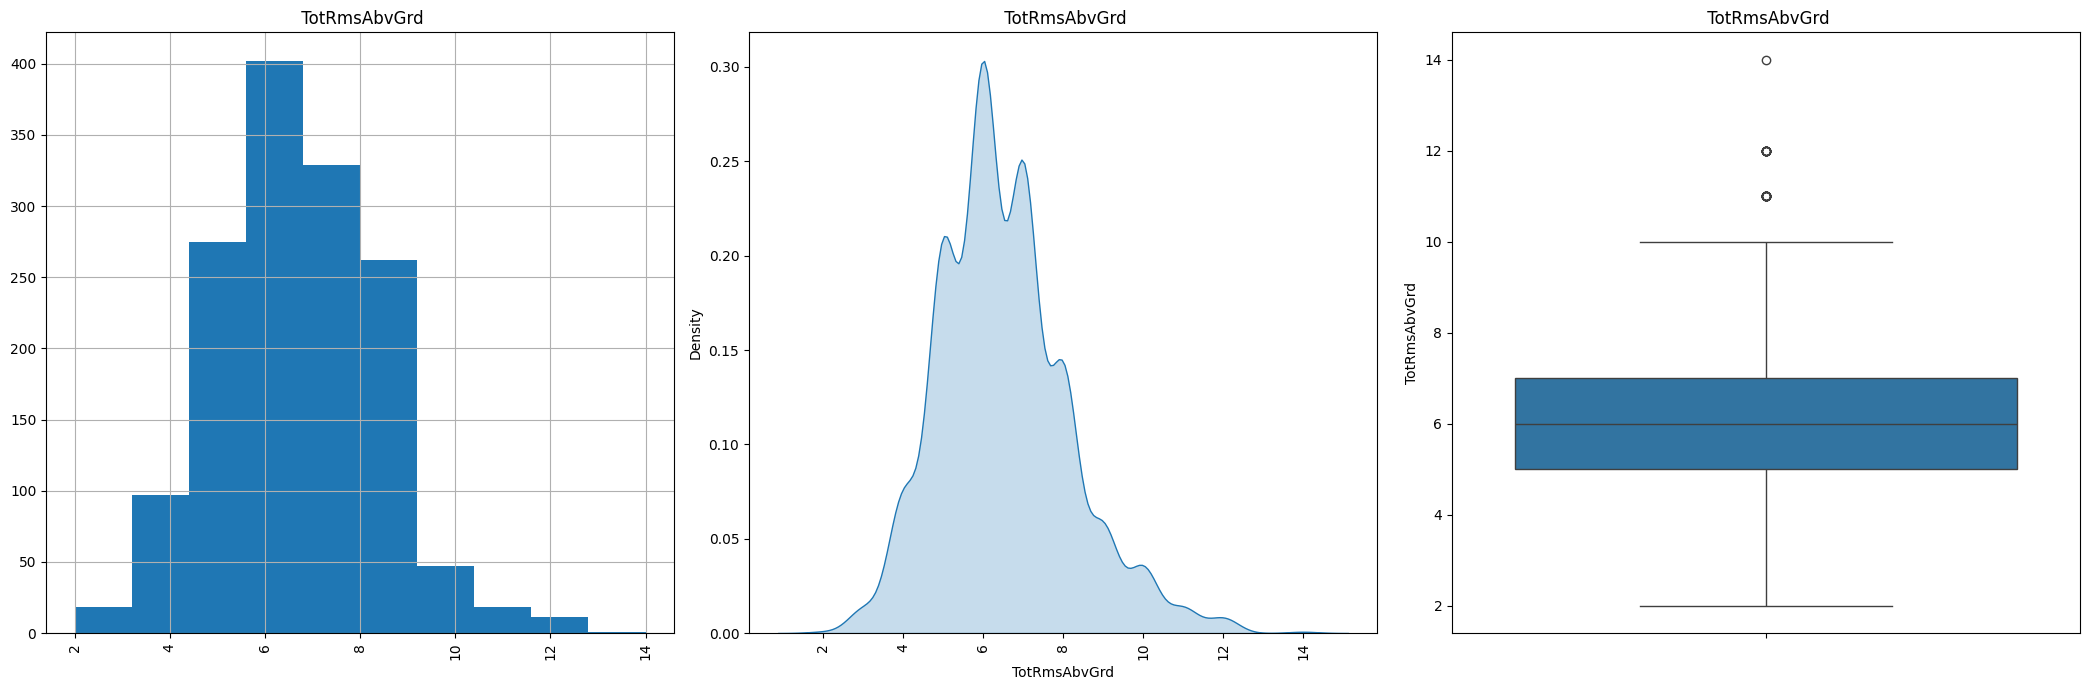

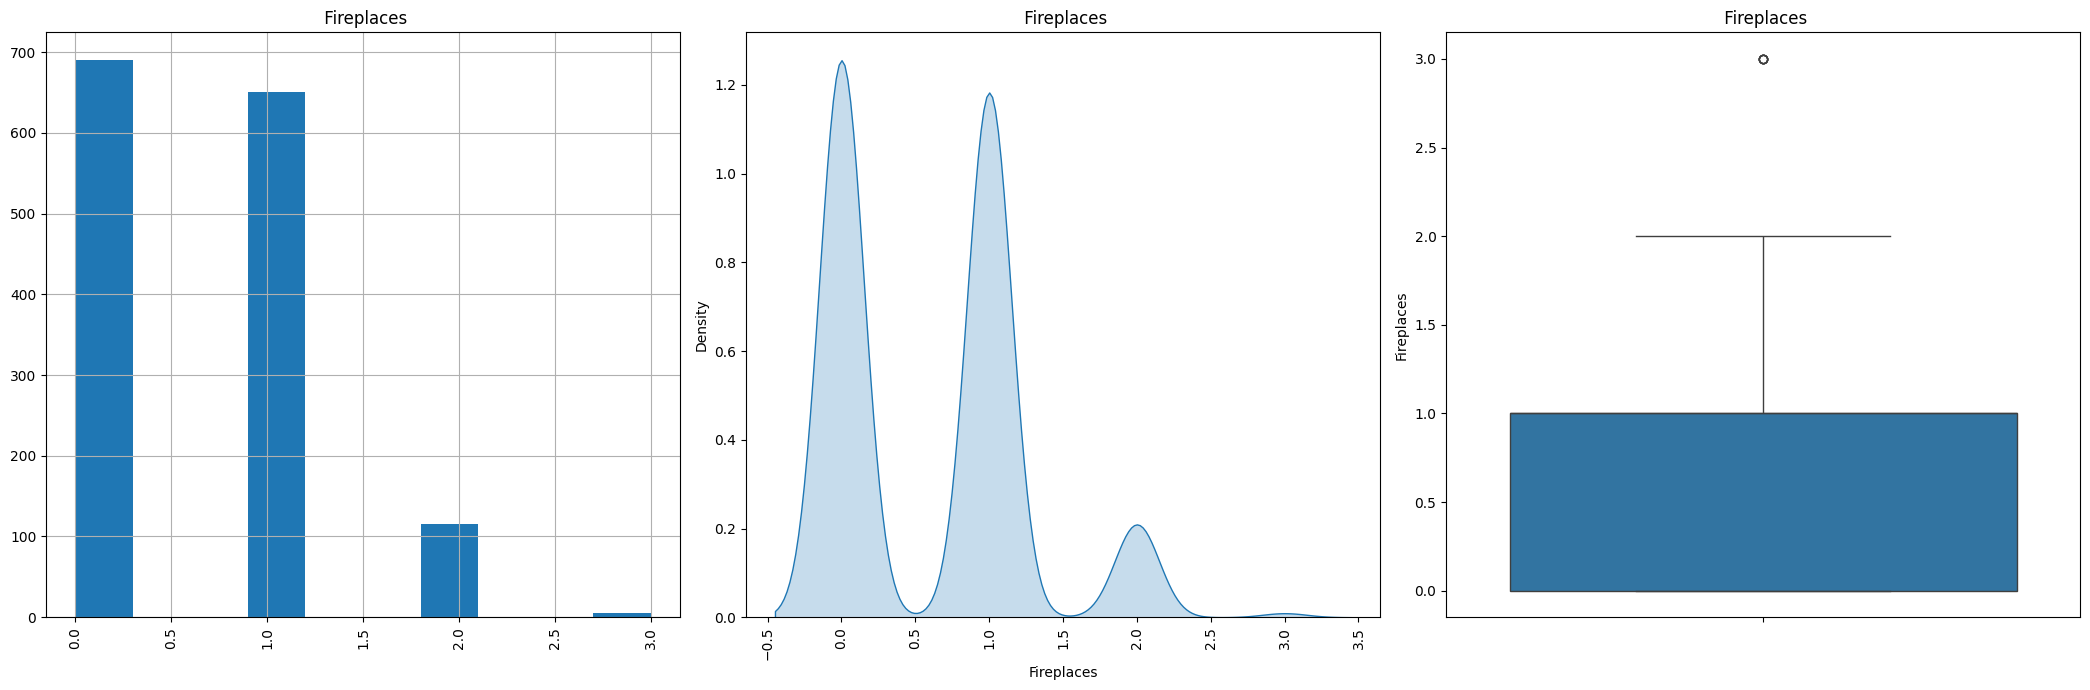

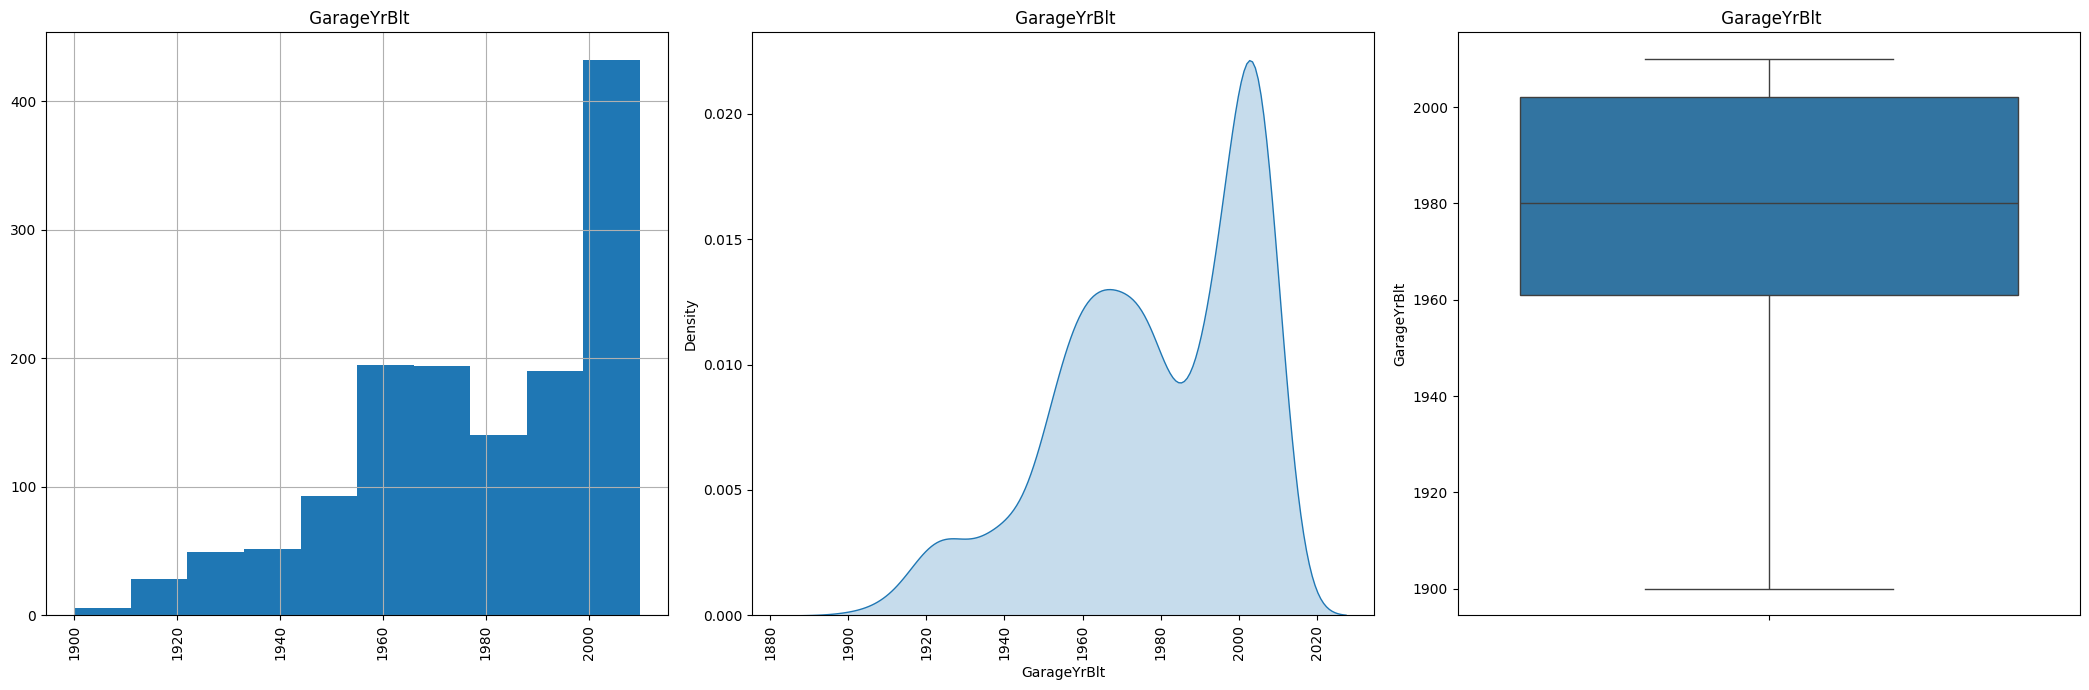

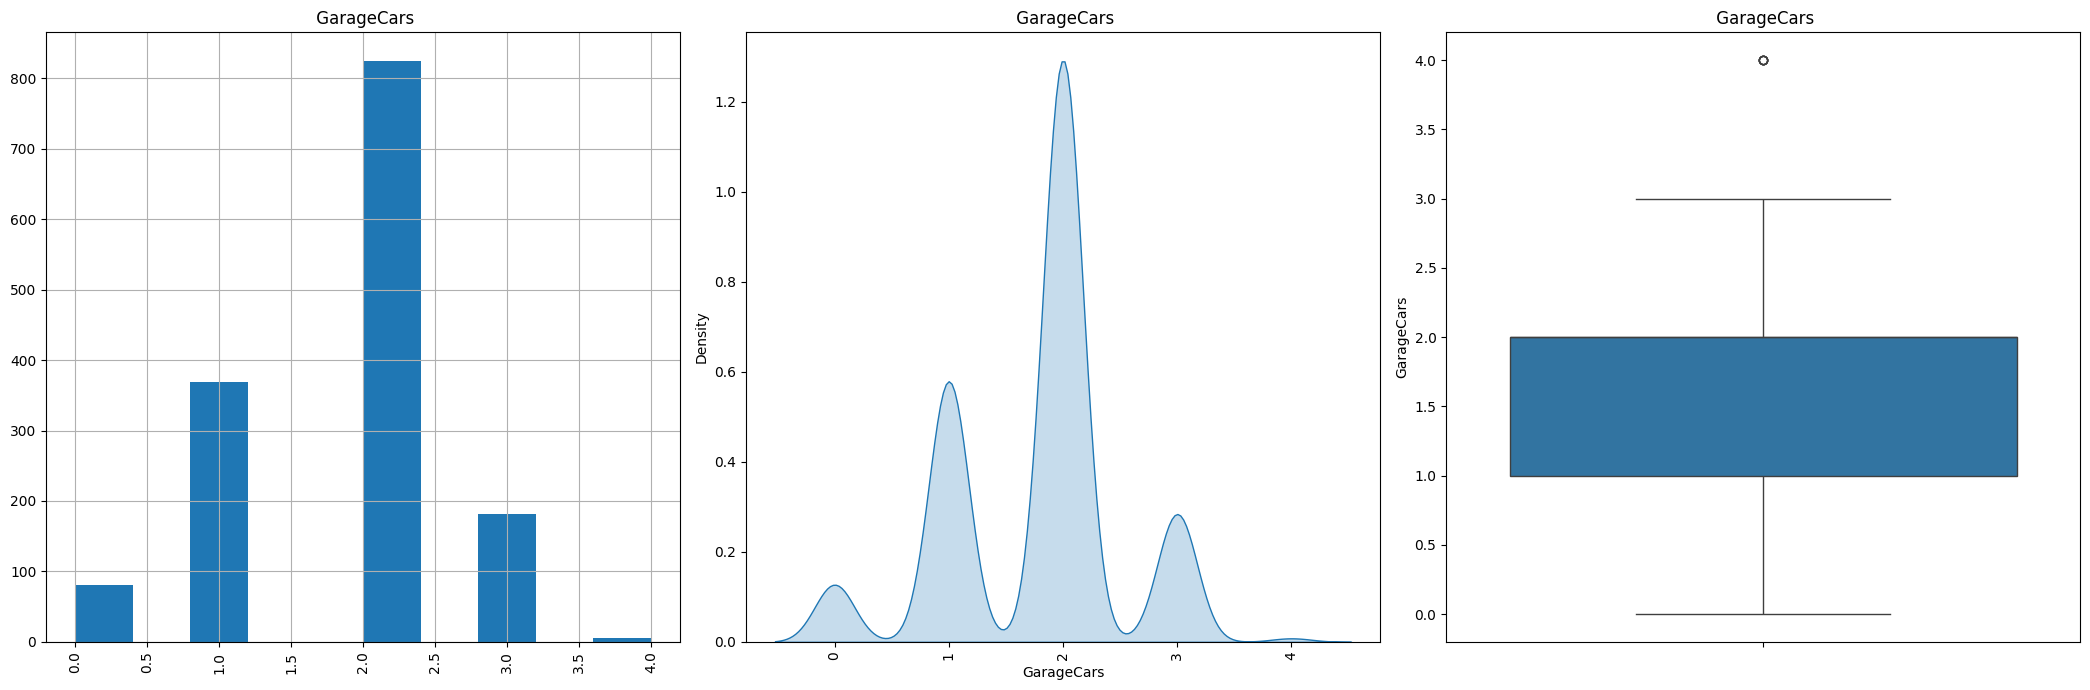

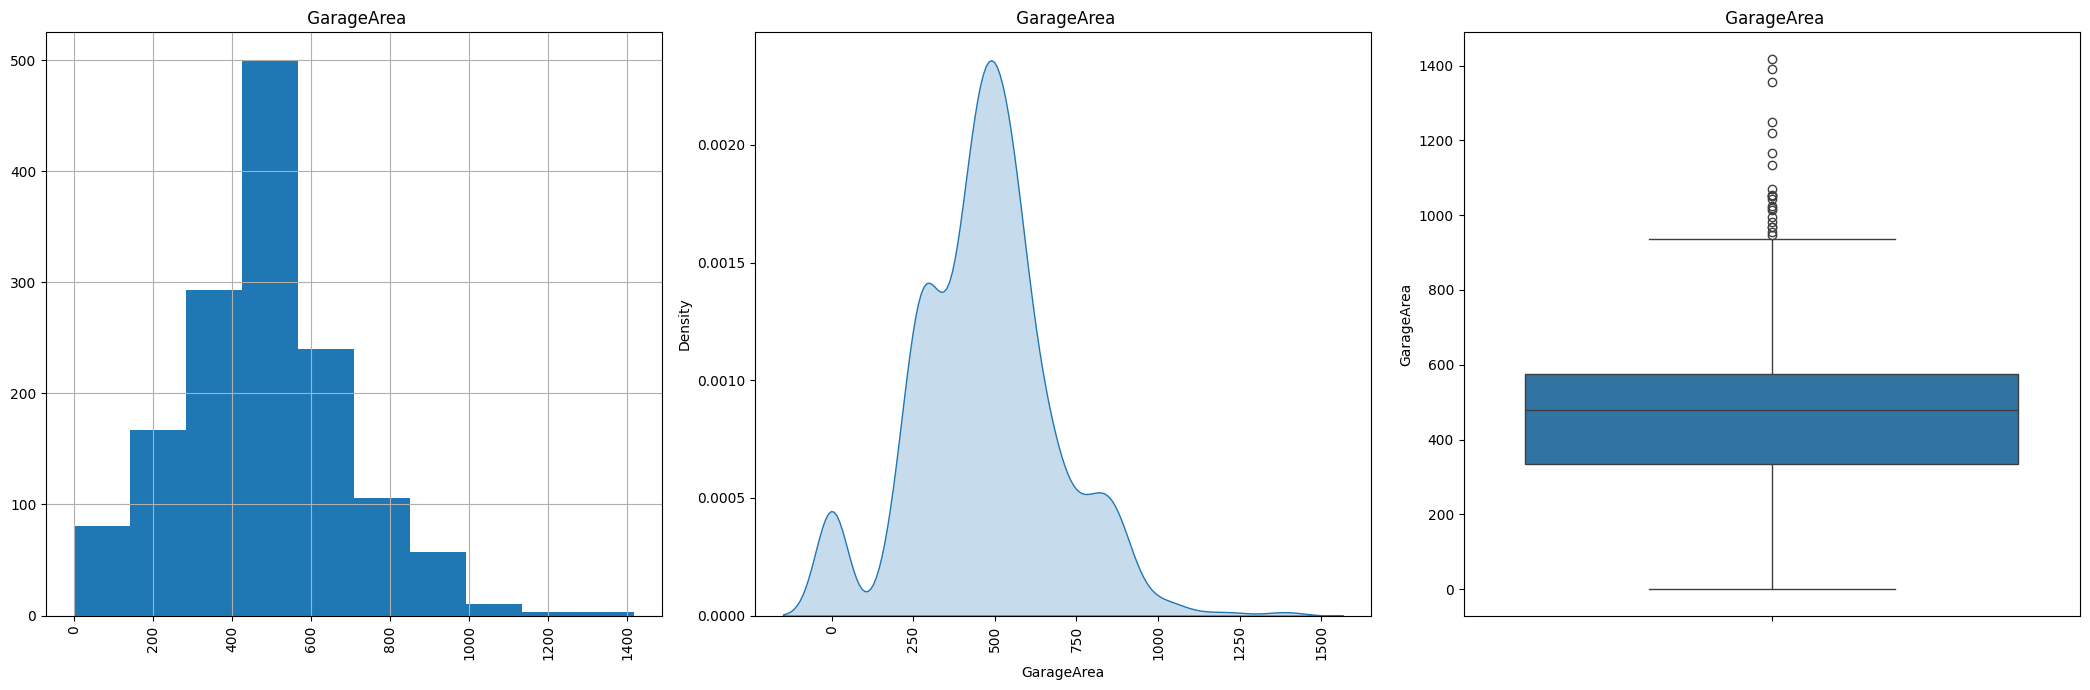

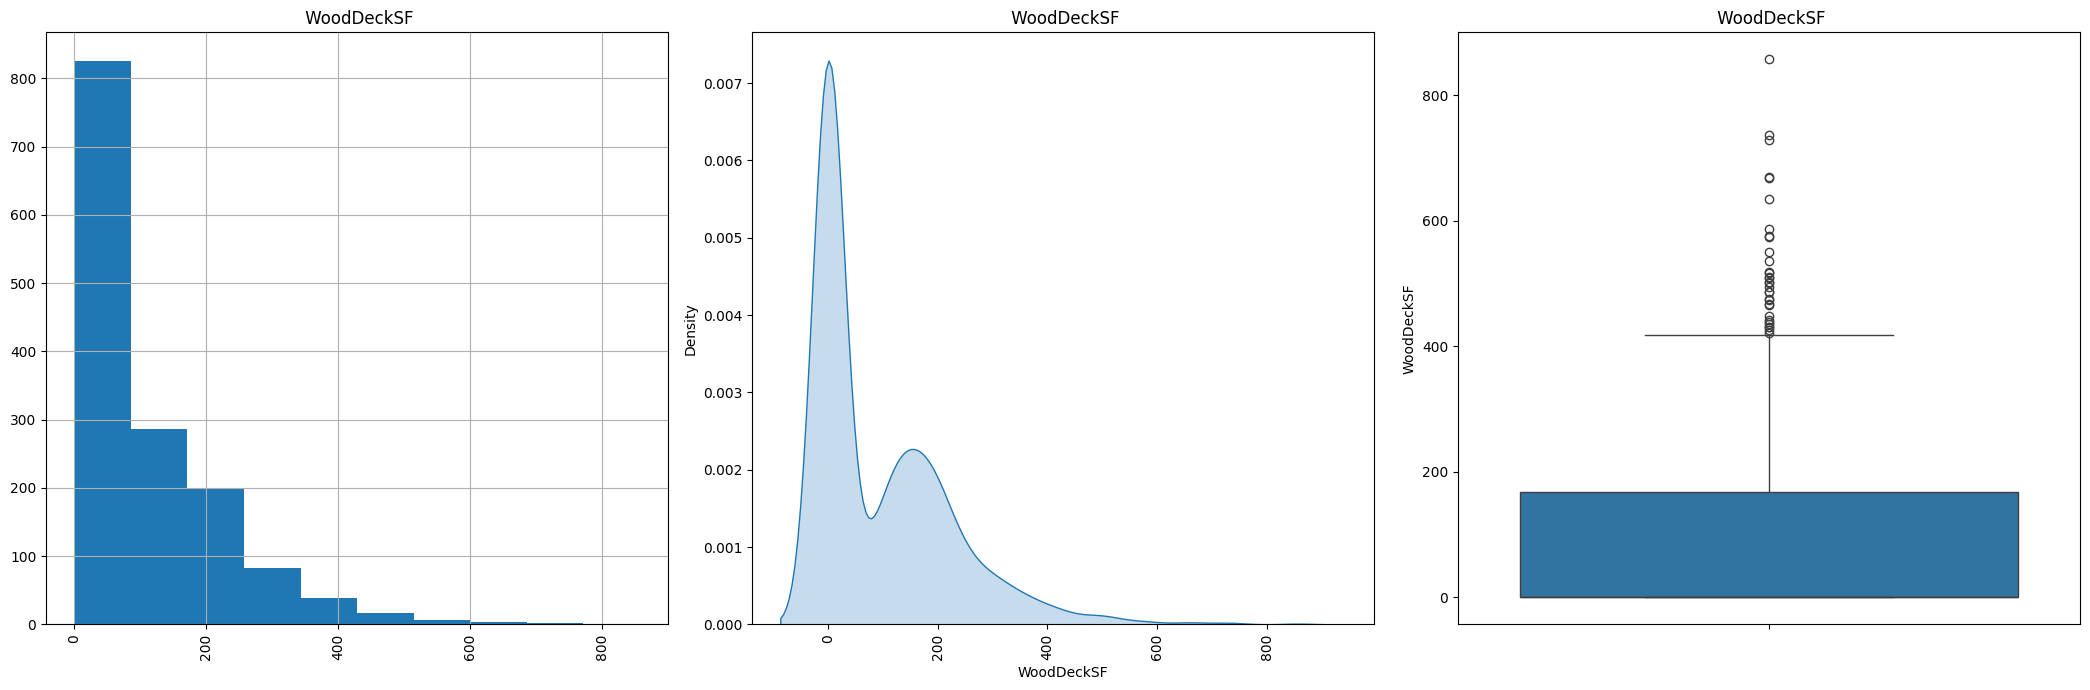

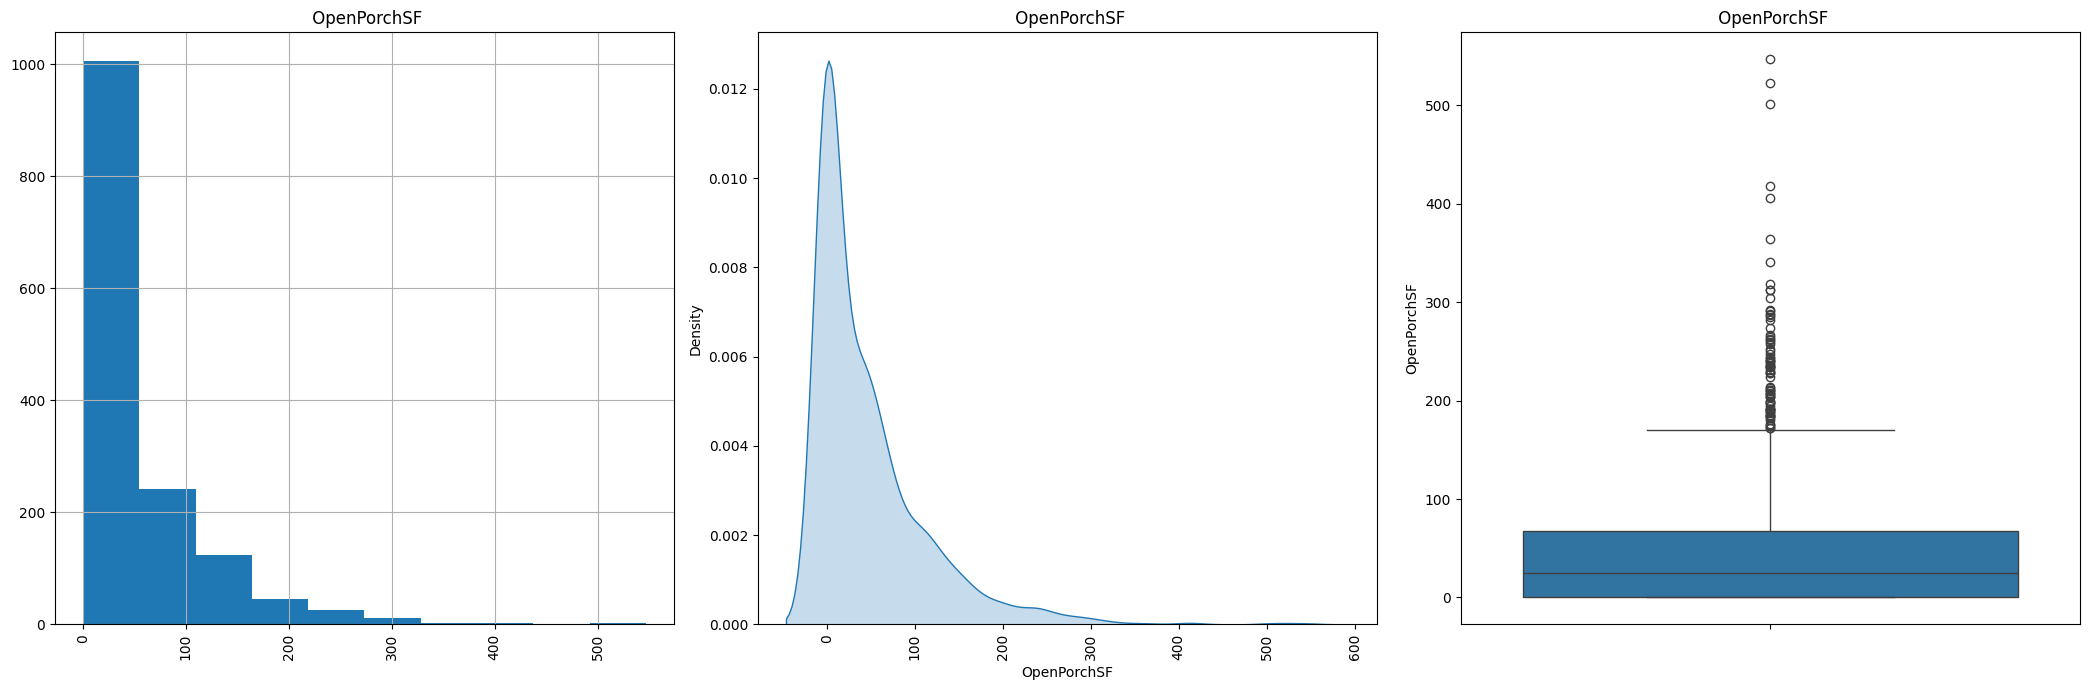

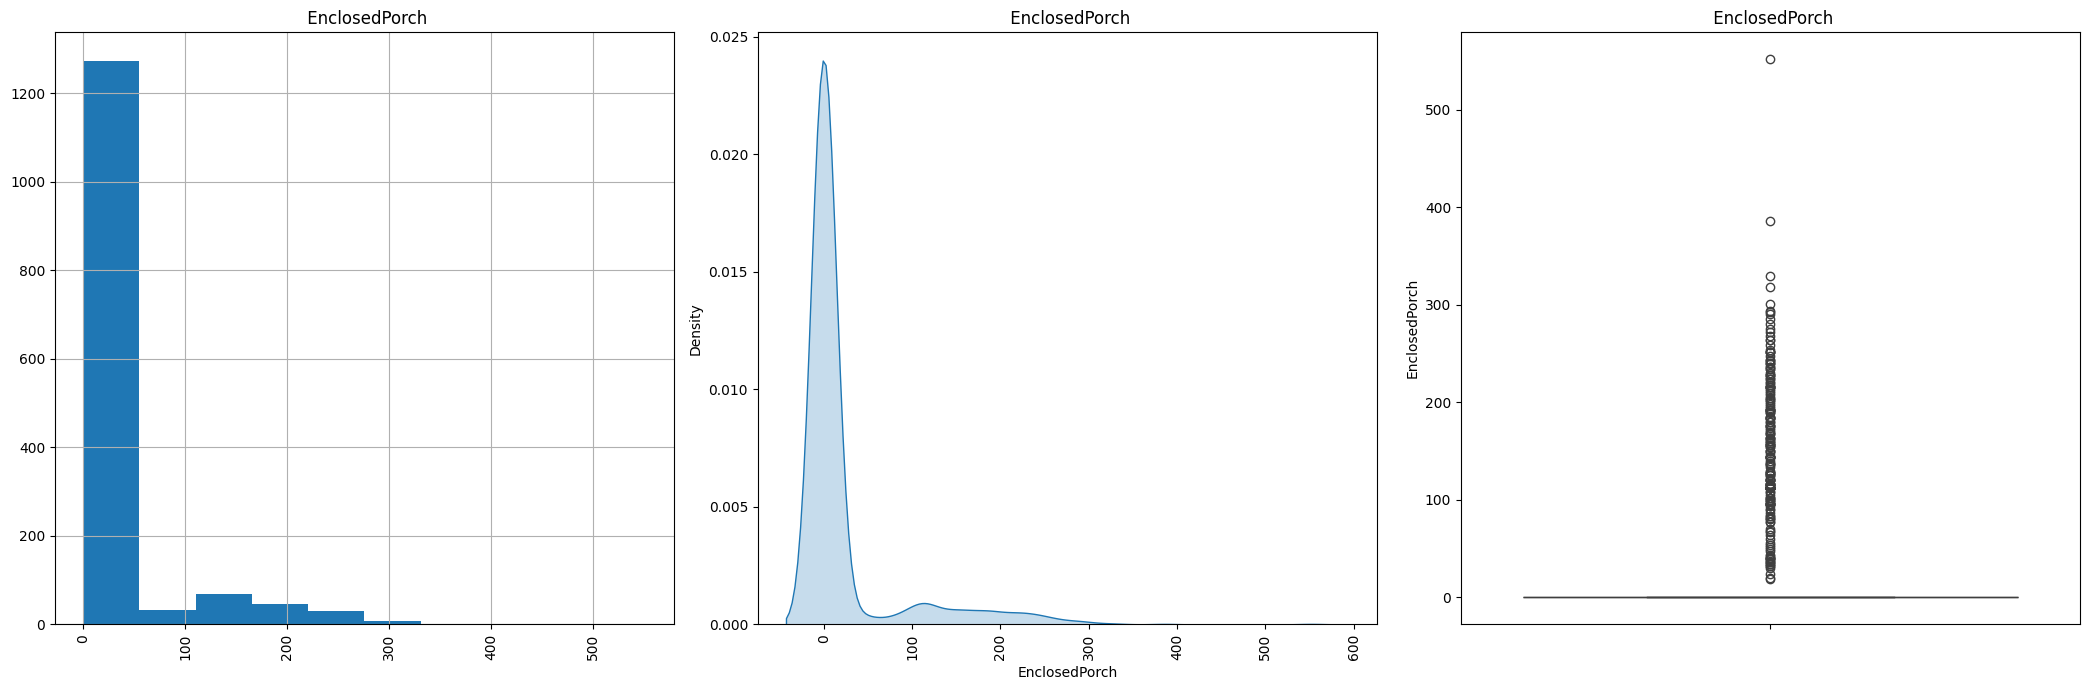

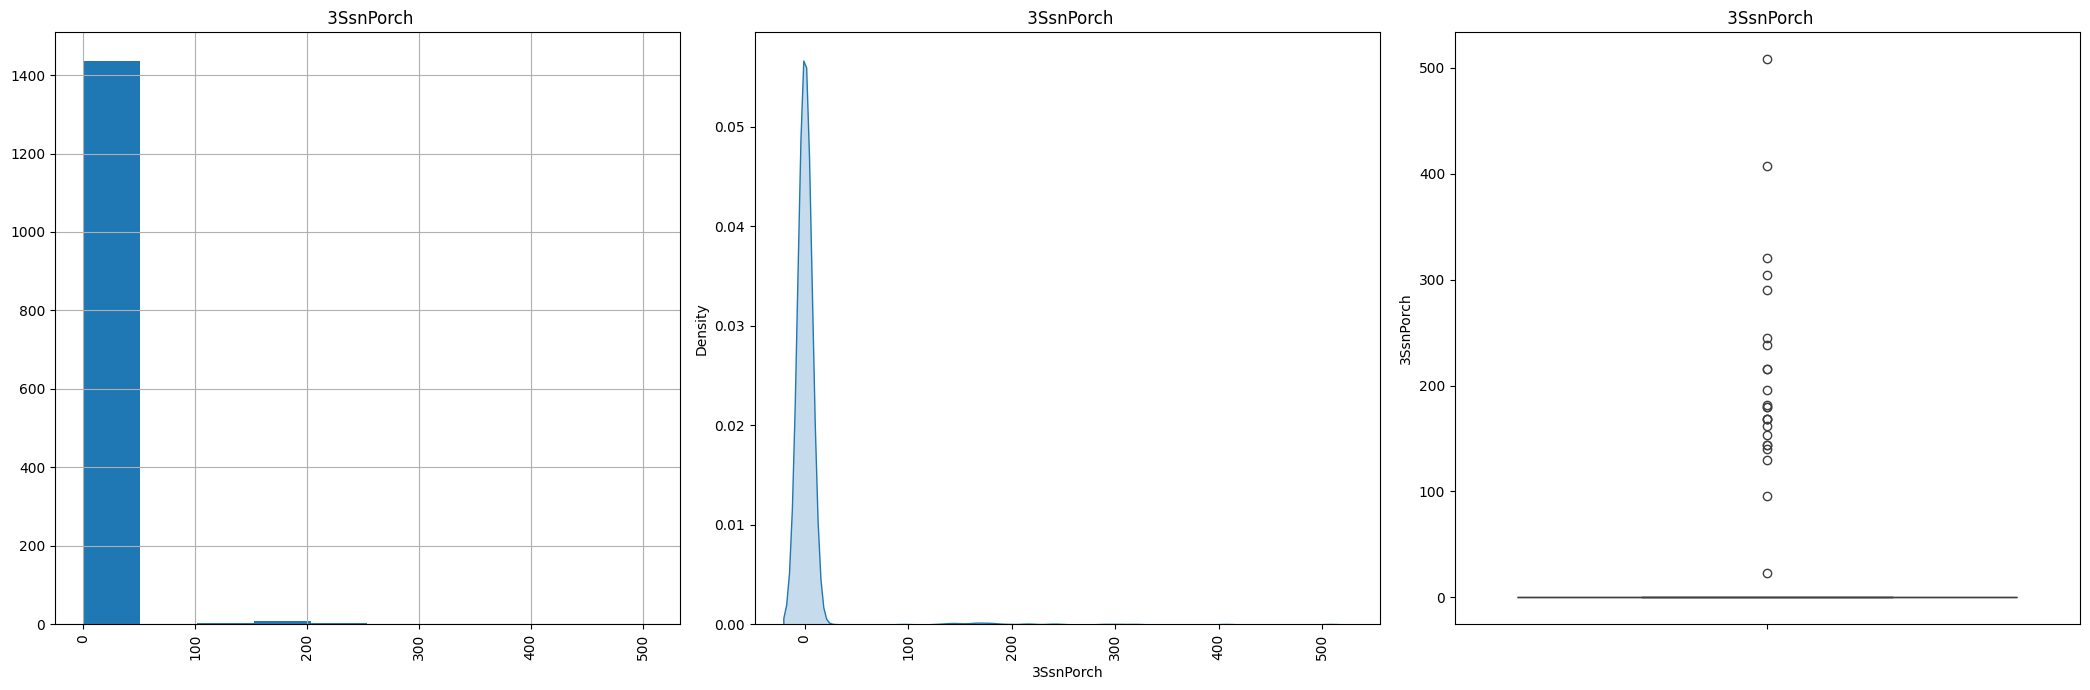

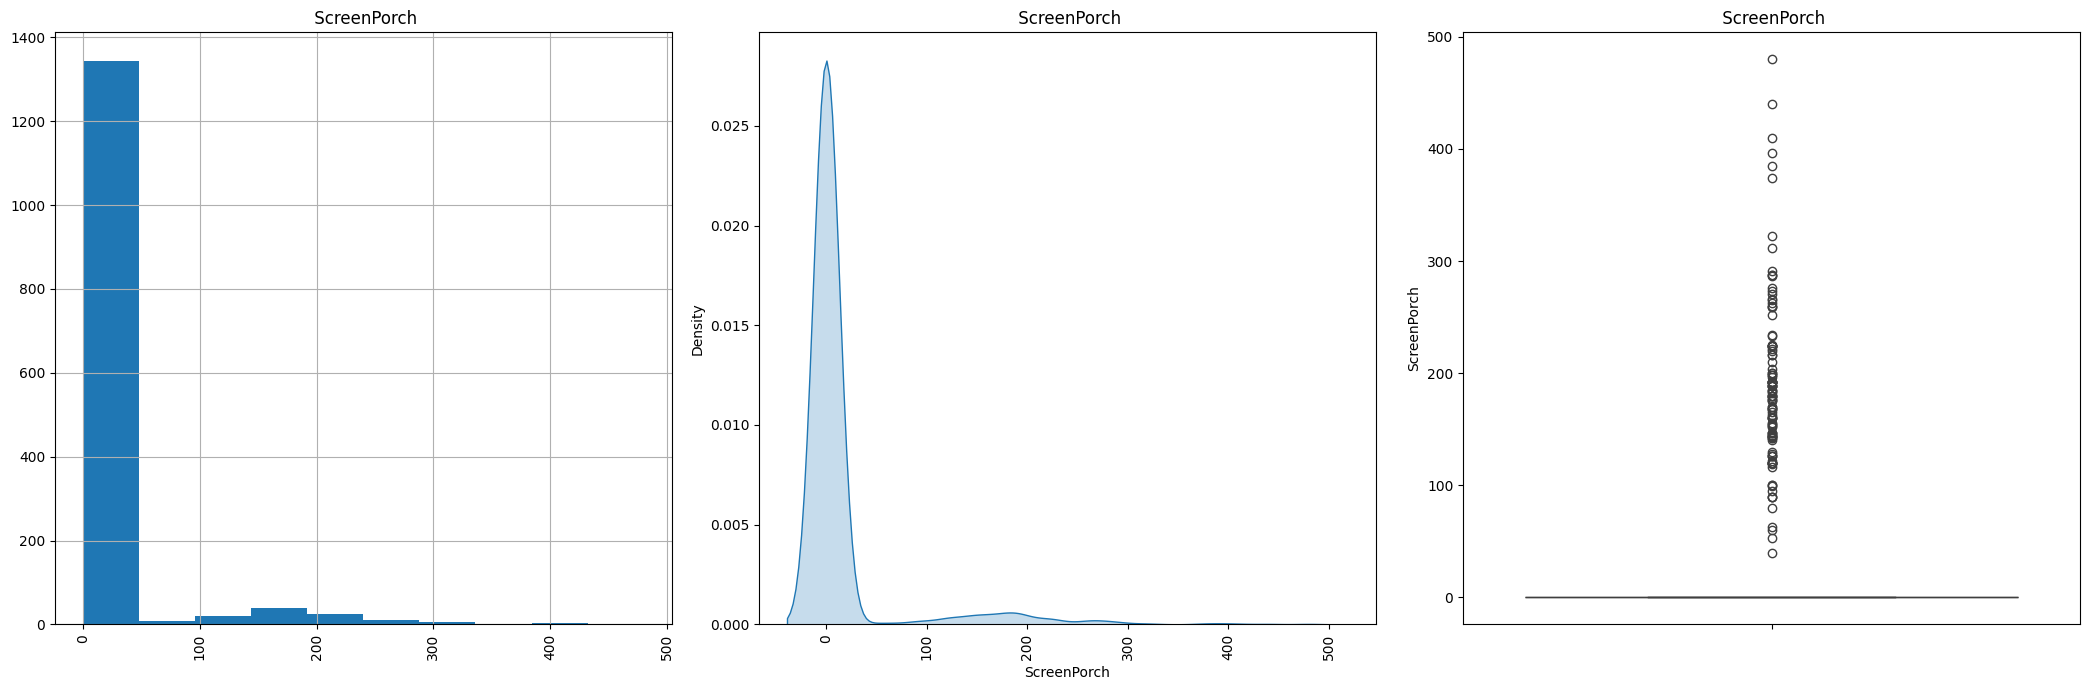

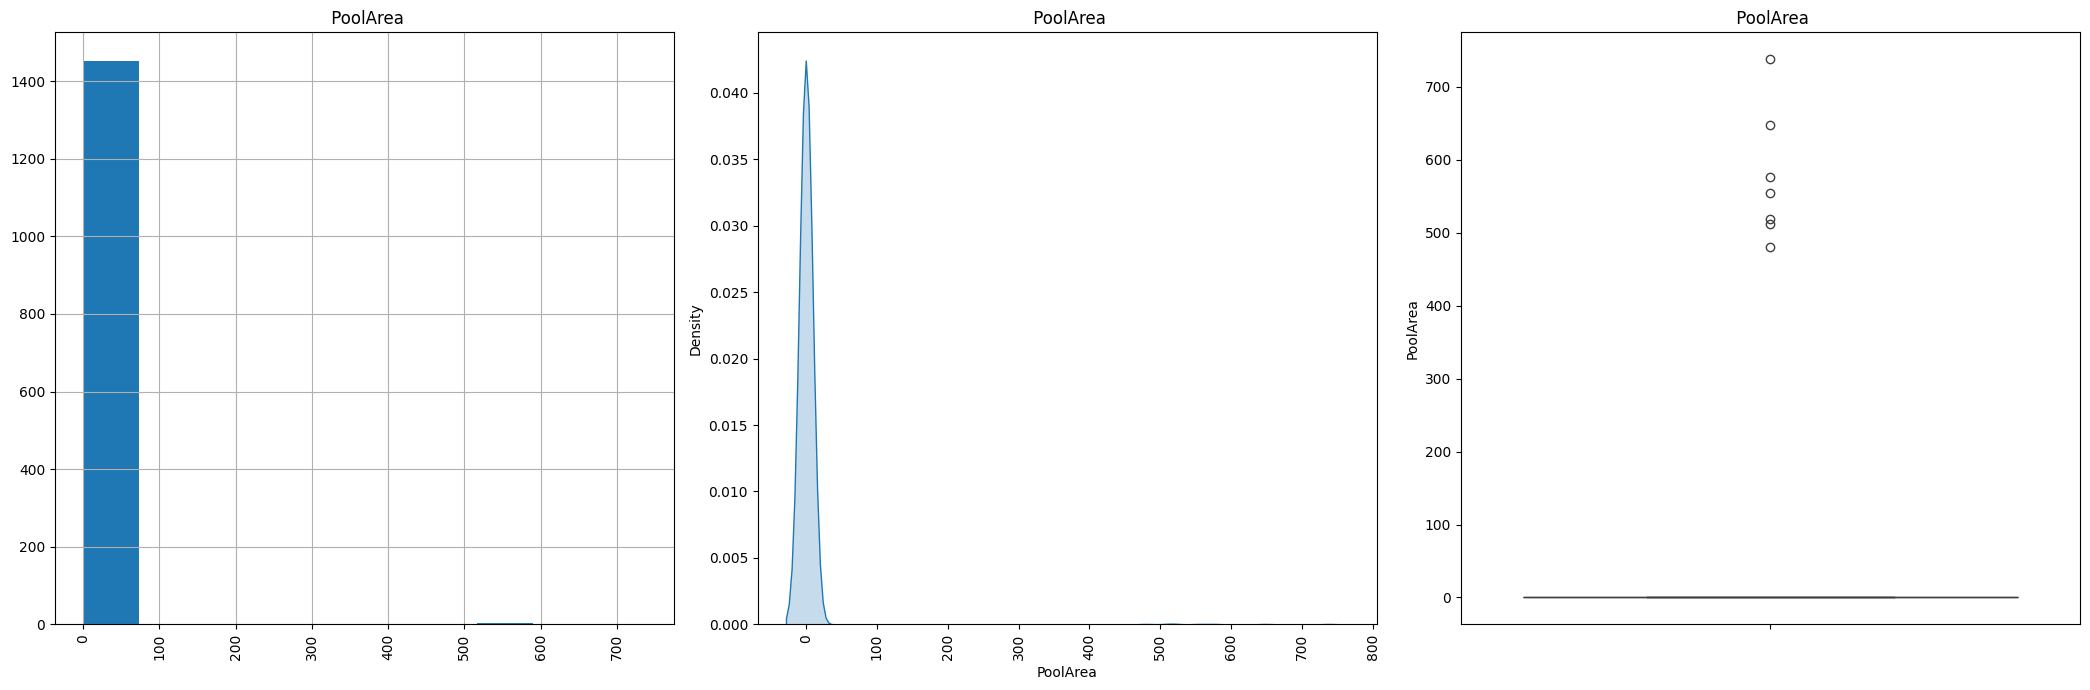

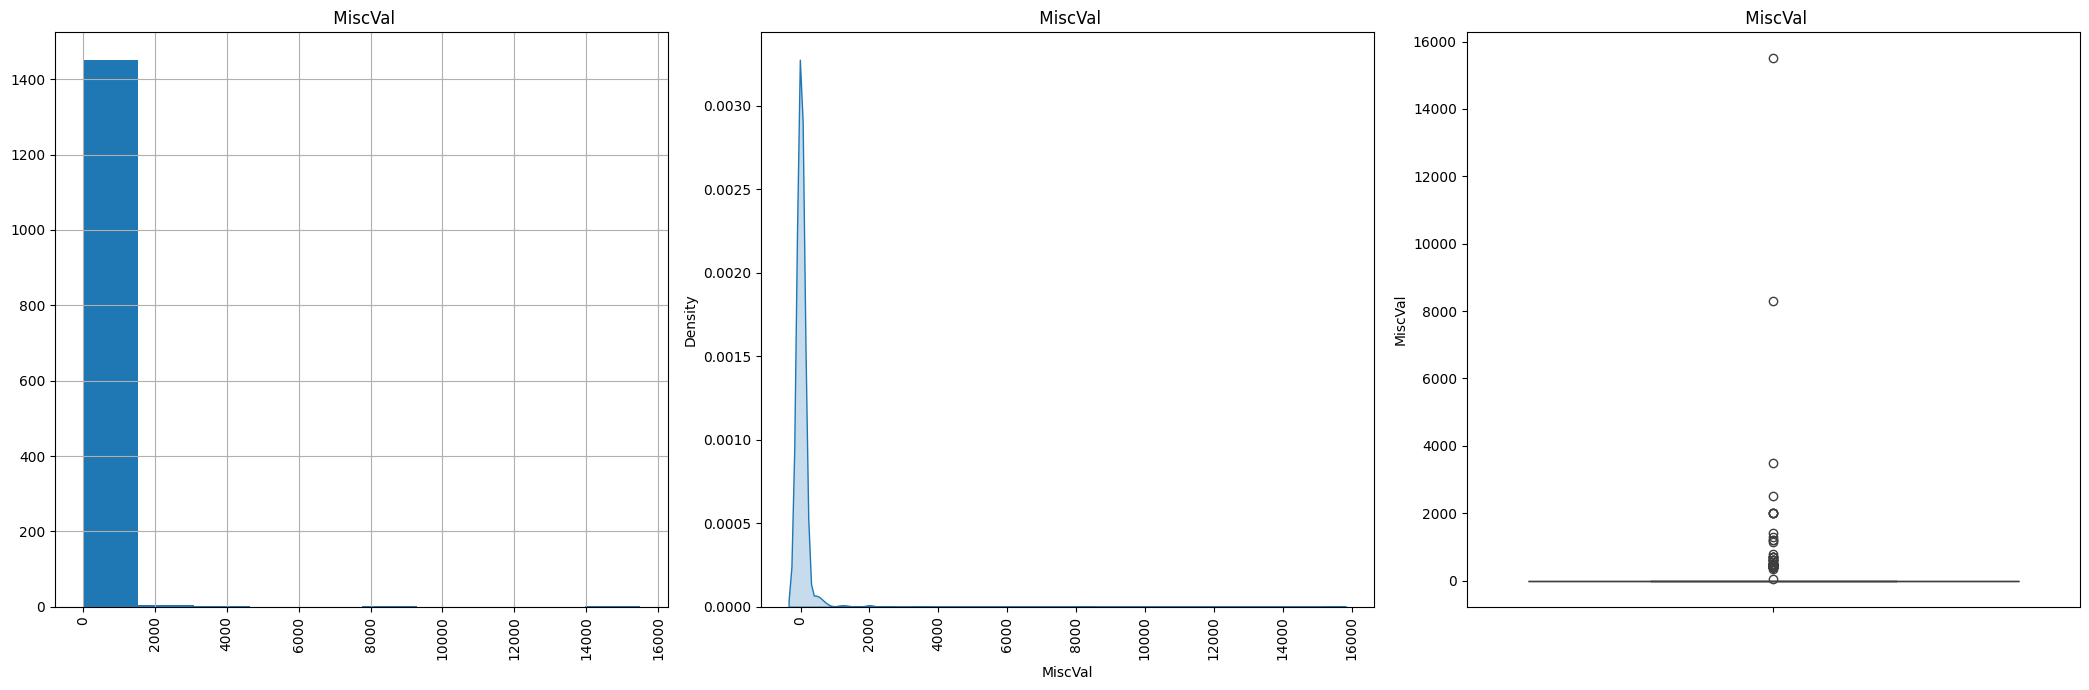

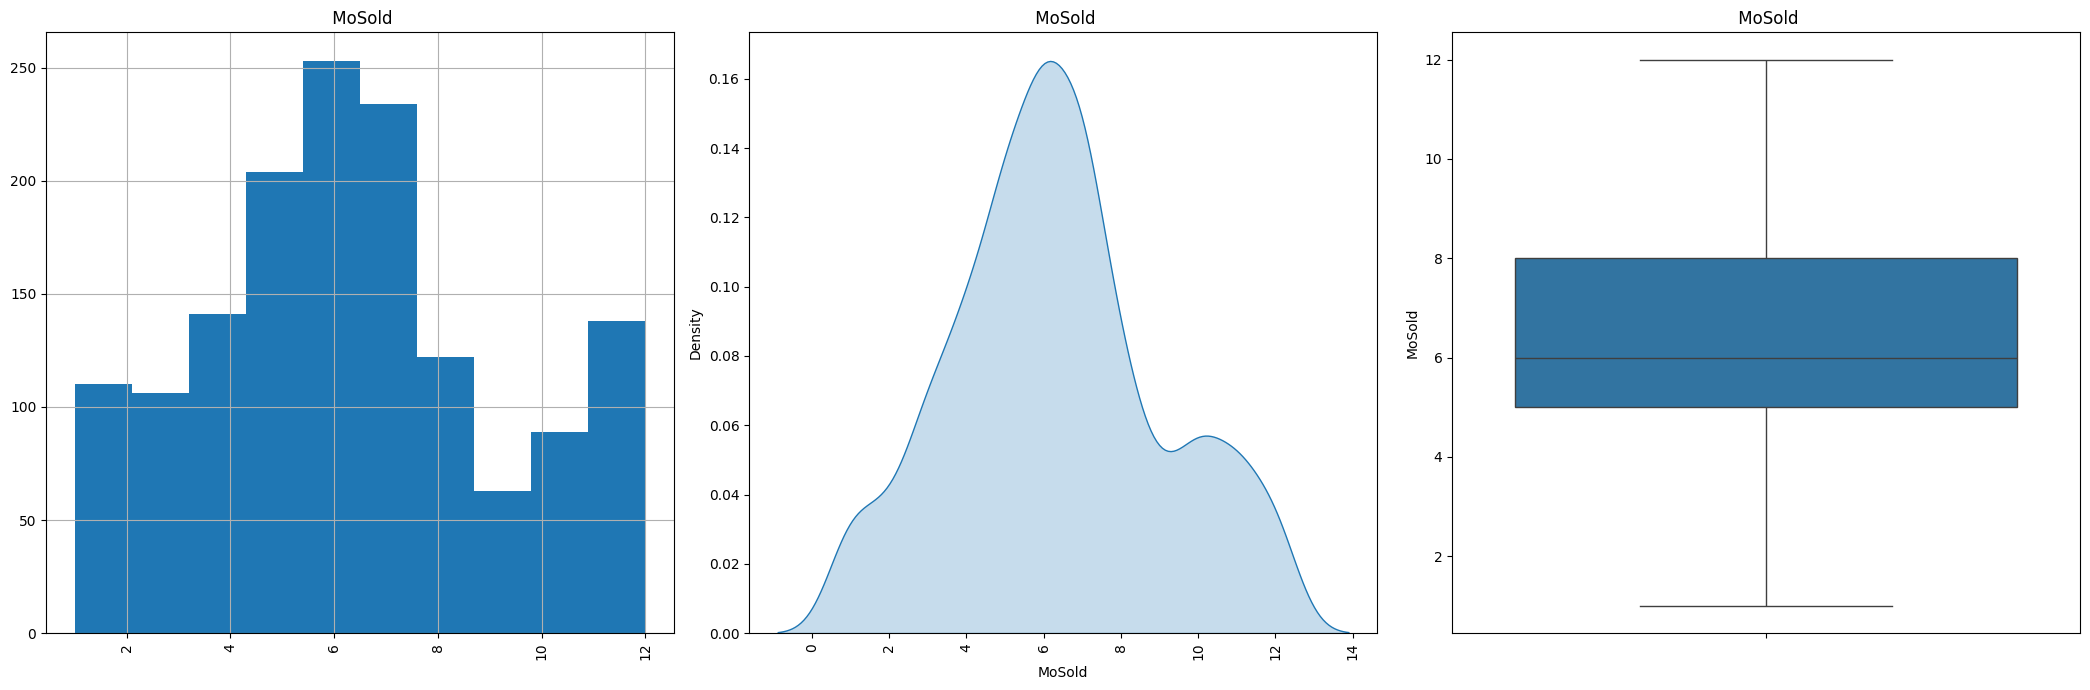

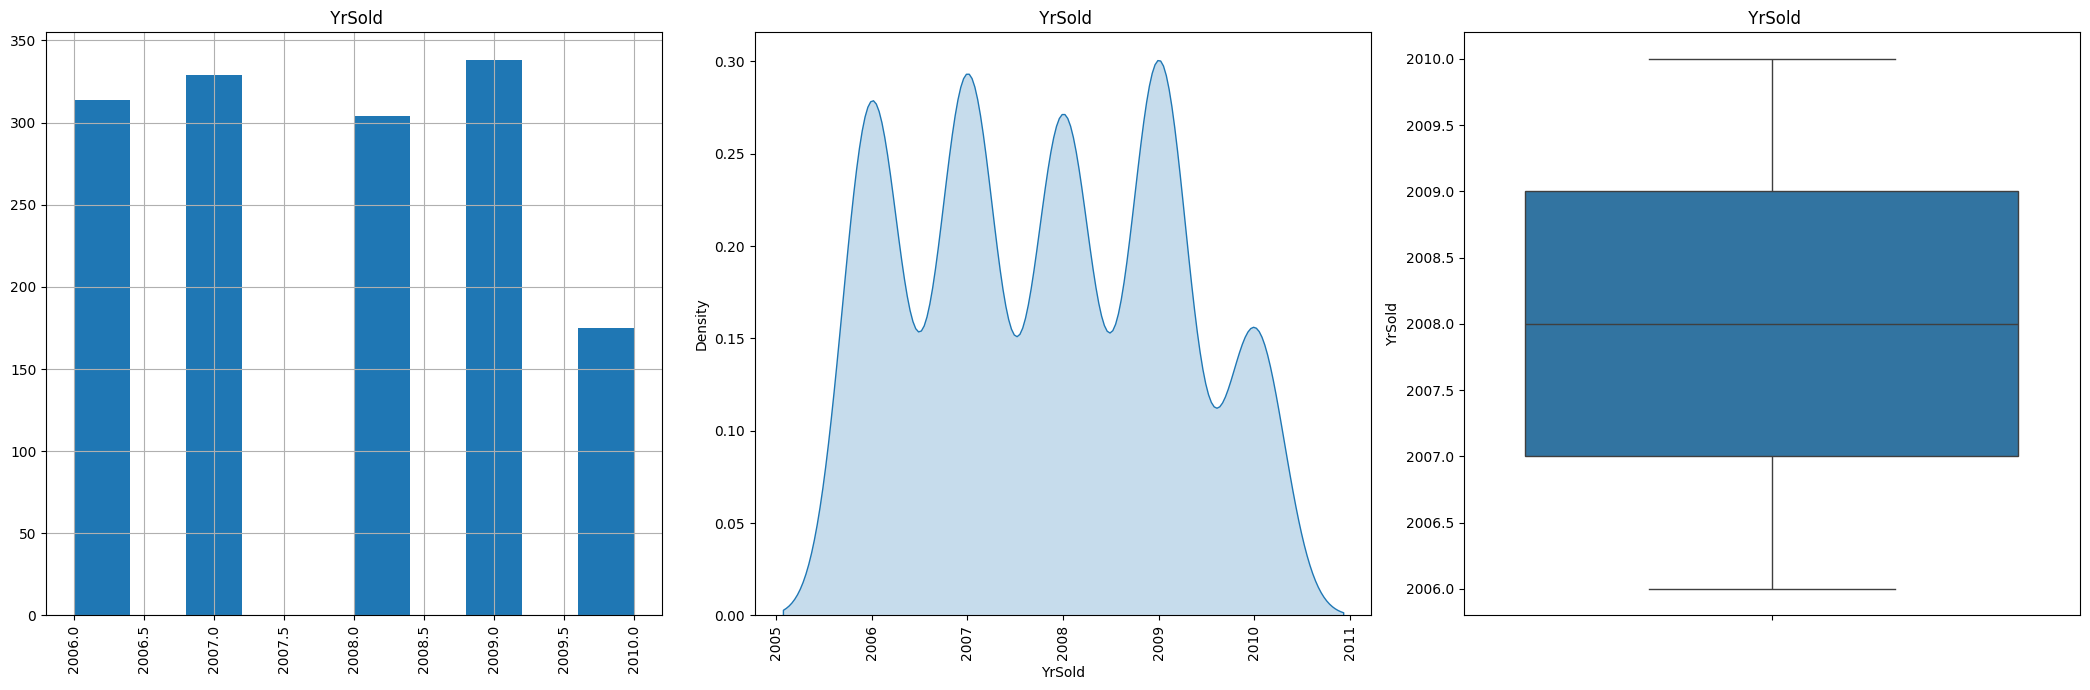

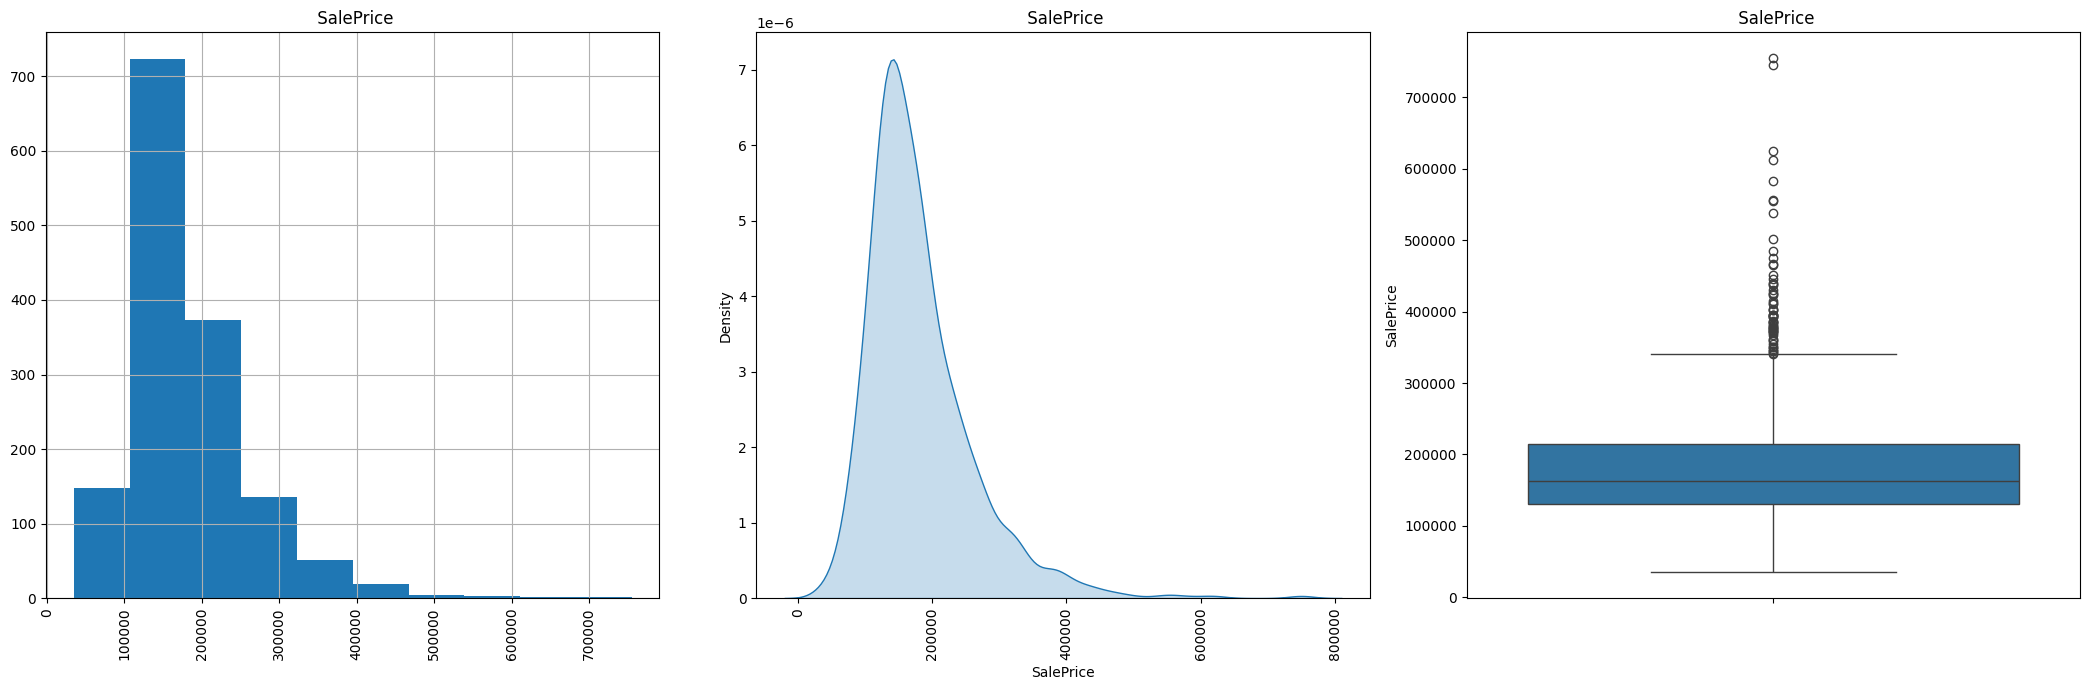

In [12]:
df_varNuImport = df_train.select_dtypes(include=['int64', 'float64'])

for col in df_varNuImport.columns:
    plt.figure(figsize=(21,7))
    
    plt.subplot(1,3,1)
    df_varNuImport[col].hist()
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)
    sns.kdeplot(df_varNuImport[col], fill=True)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=col, data=df_varNuImport)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()

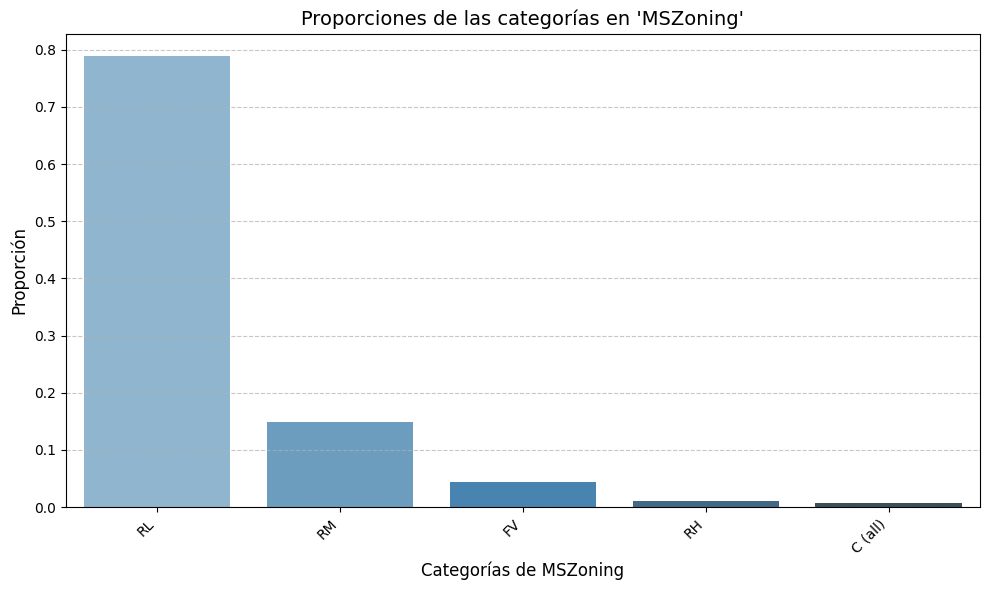

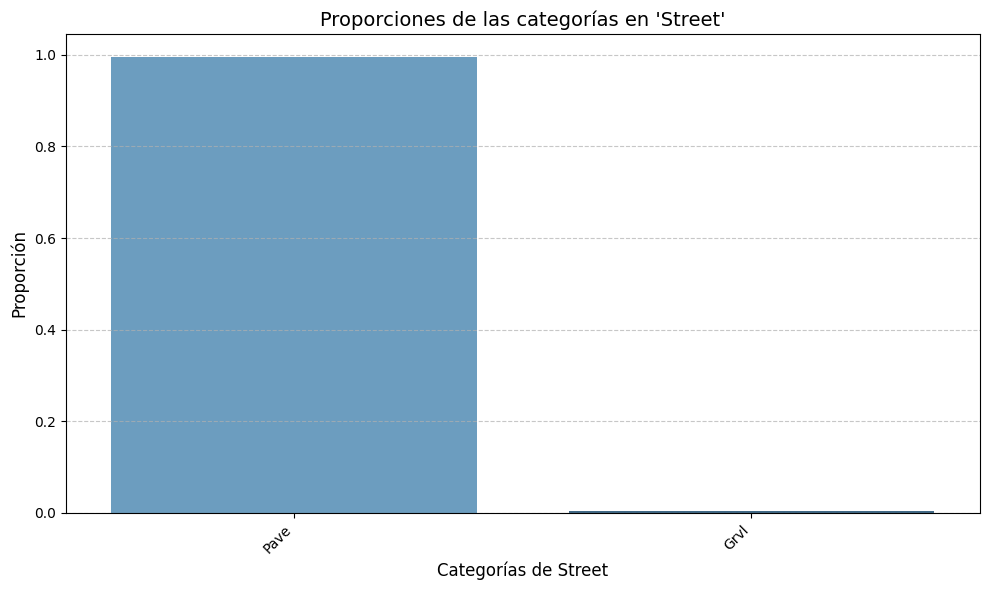

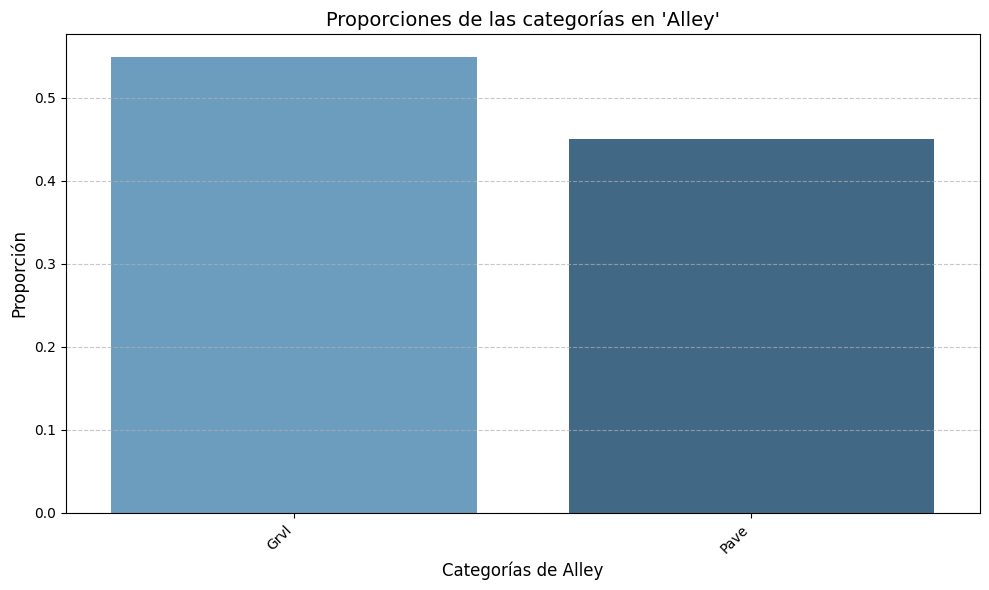

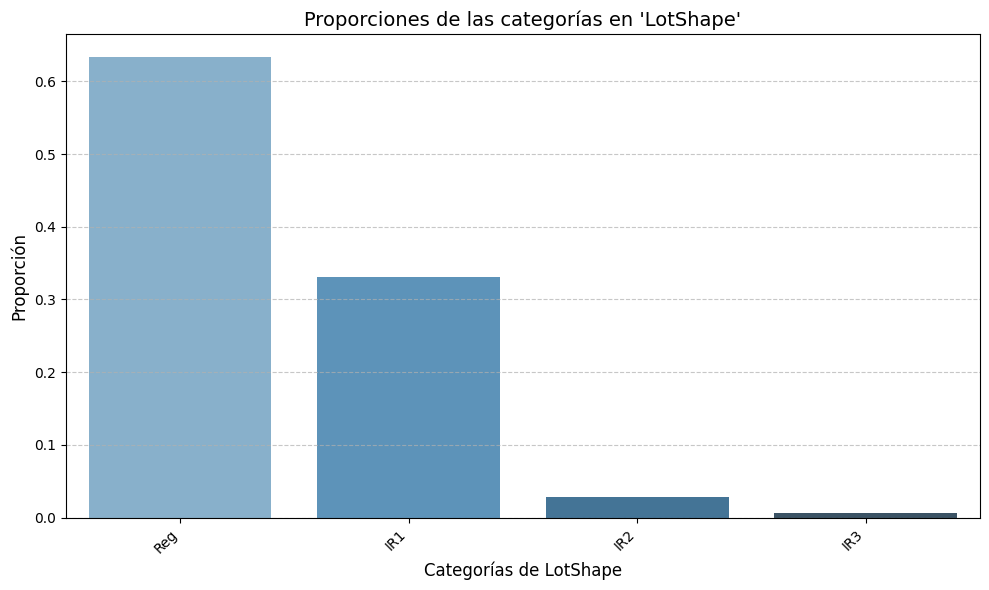

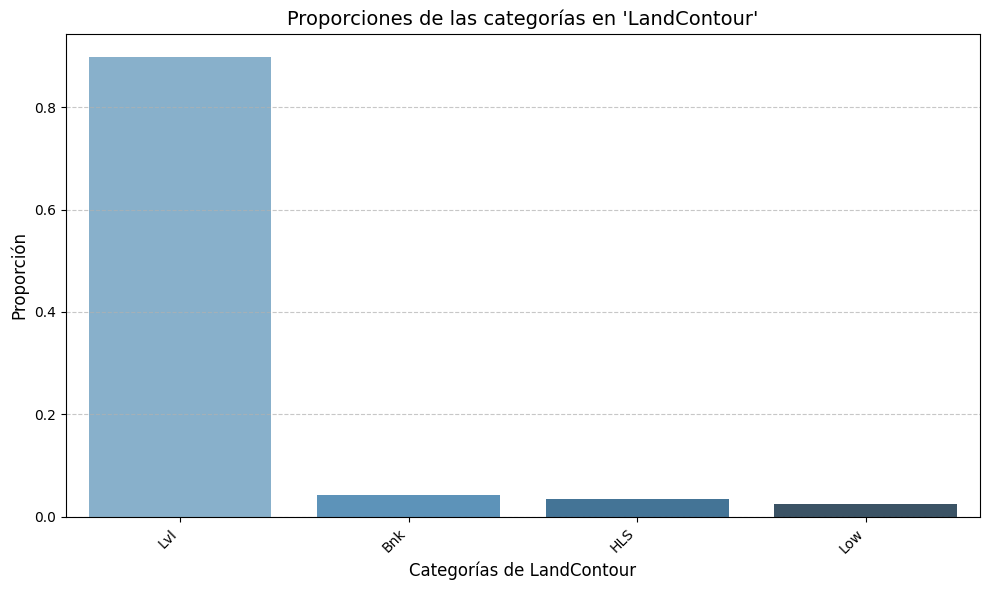

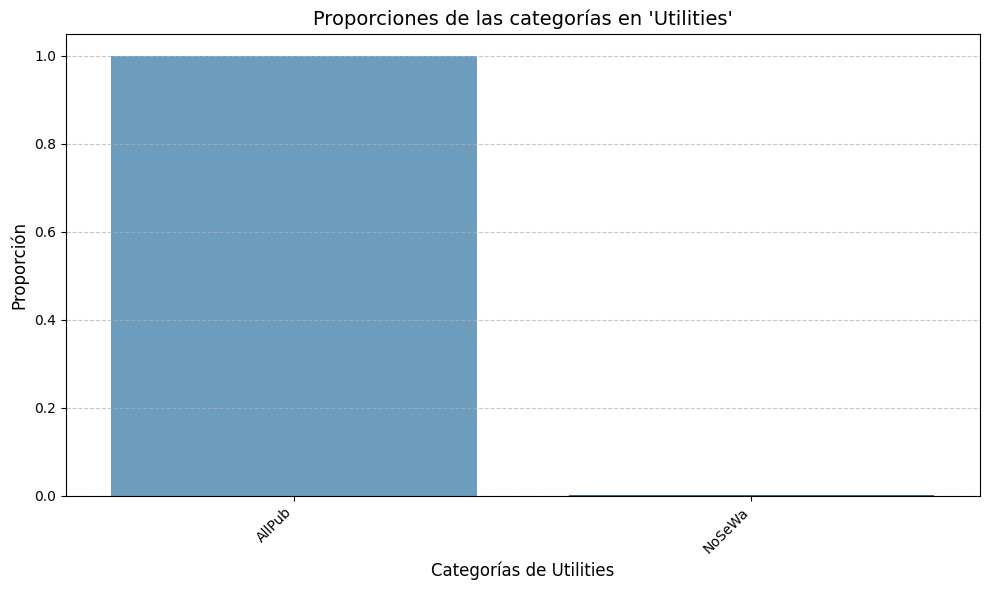

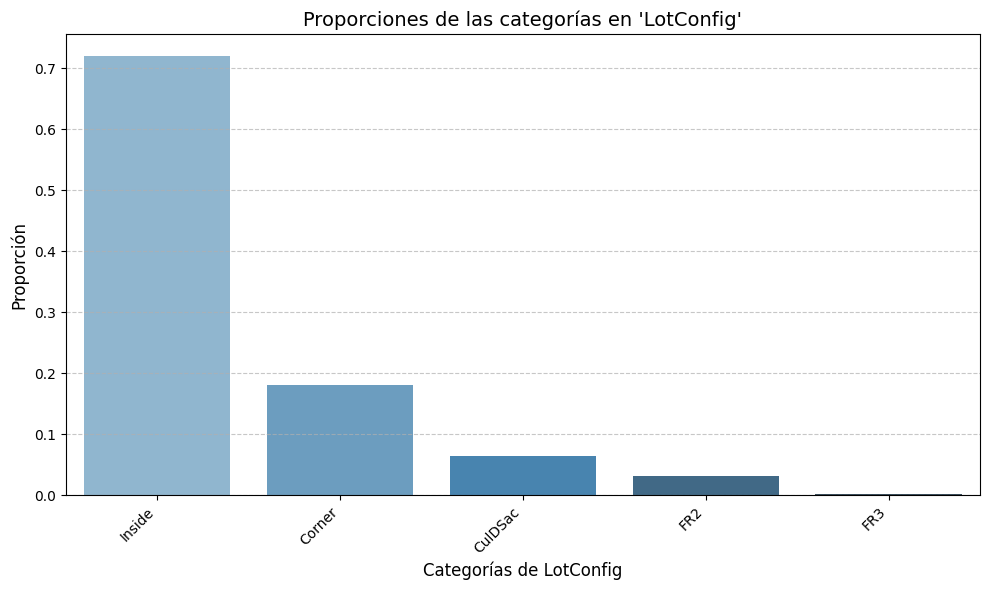

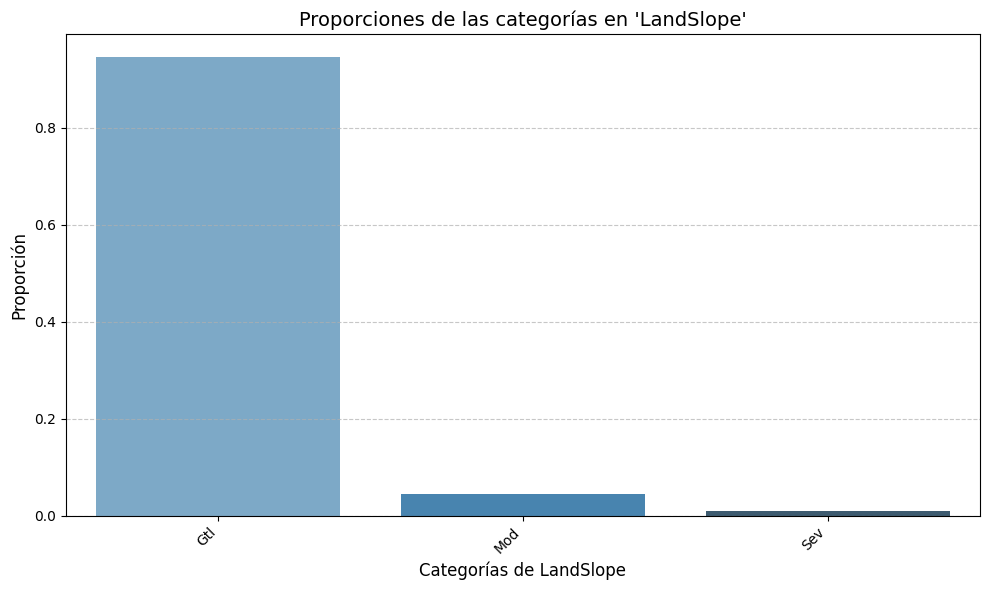

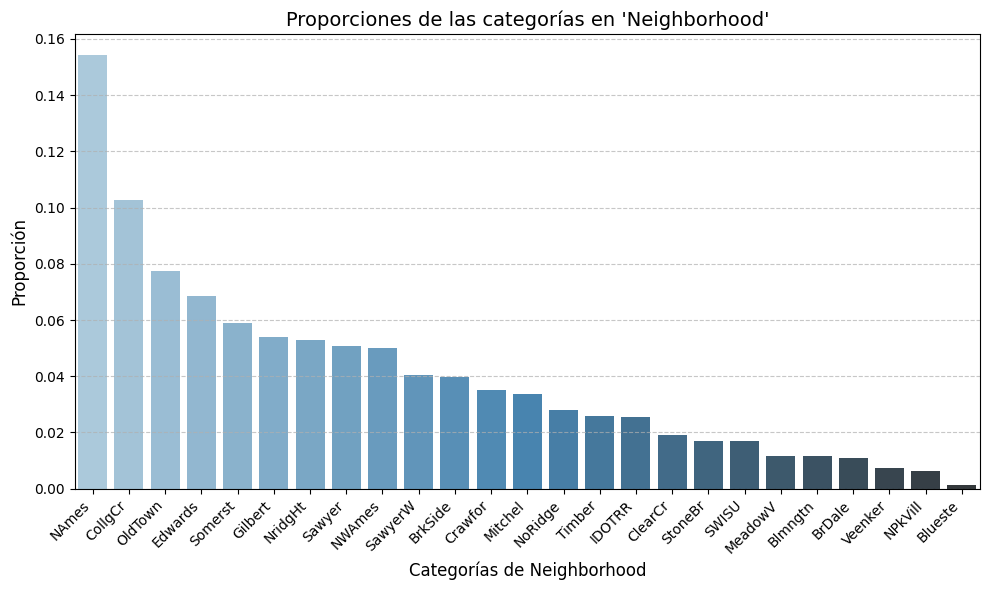

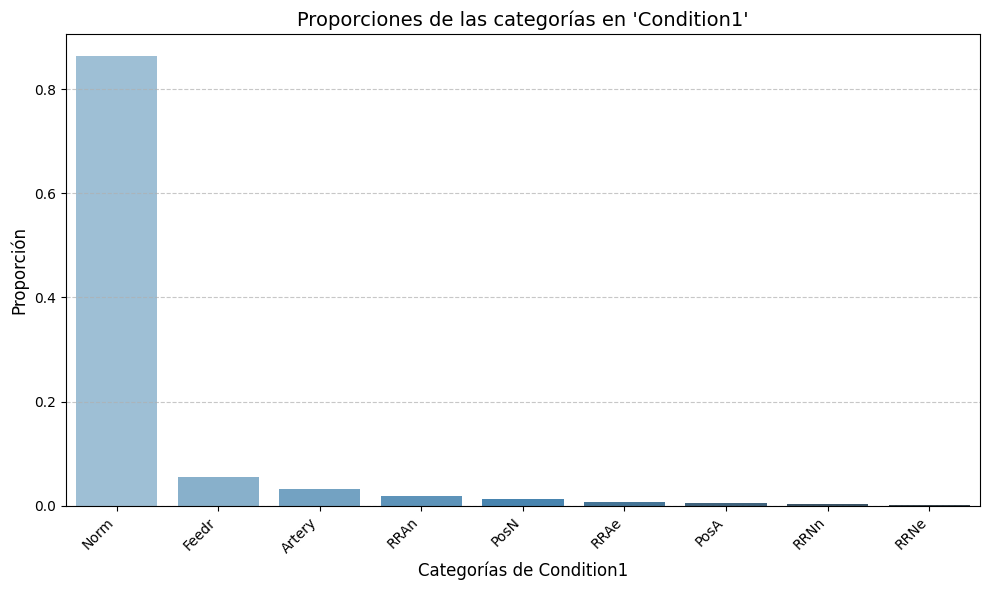

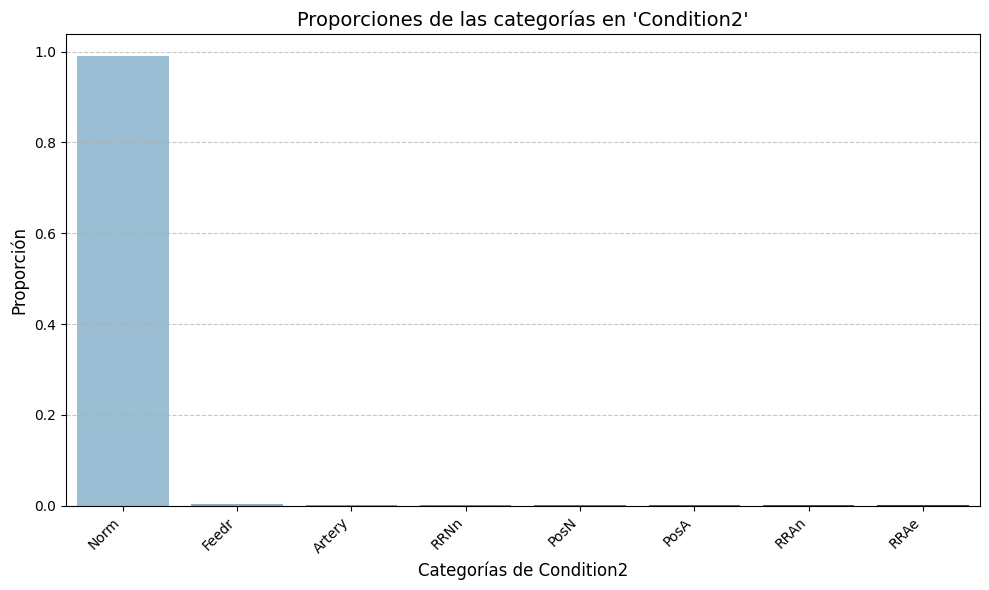

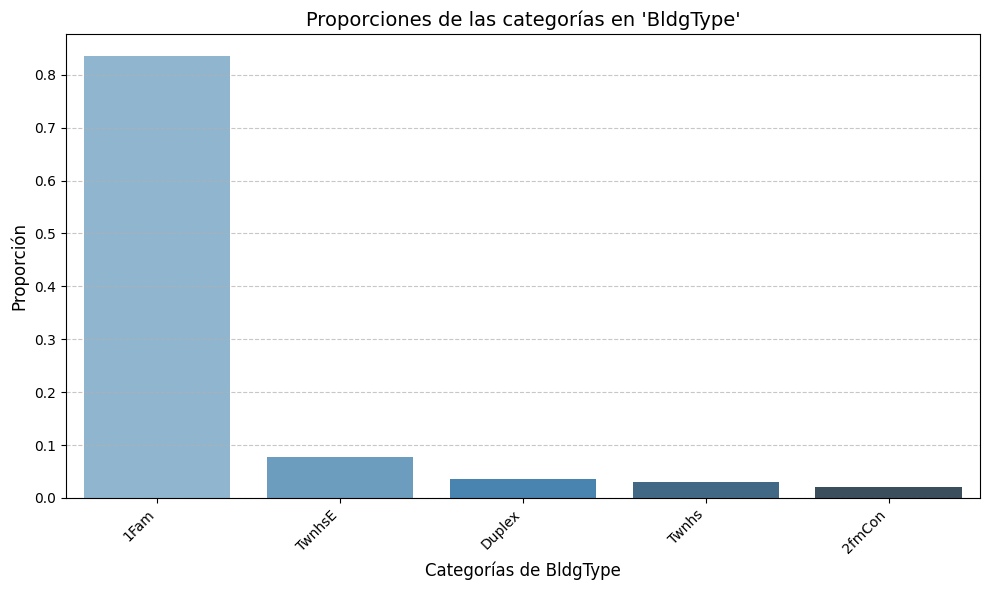

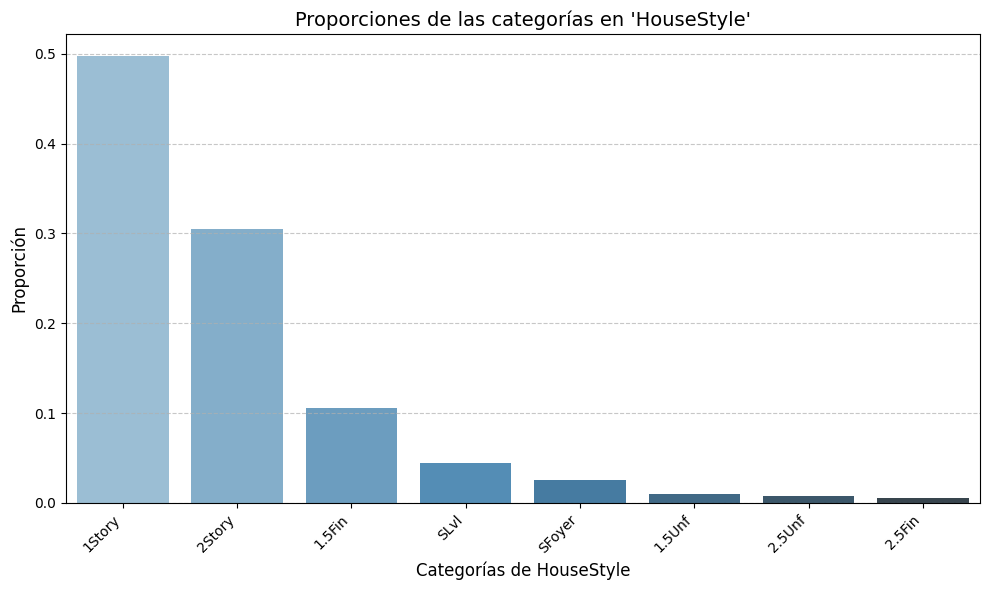

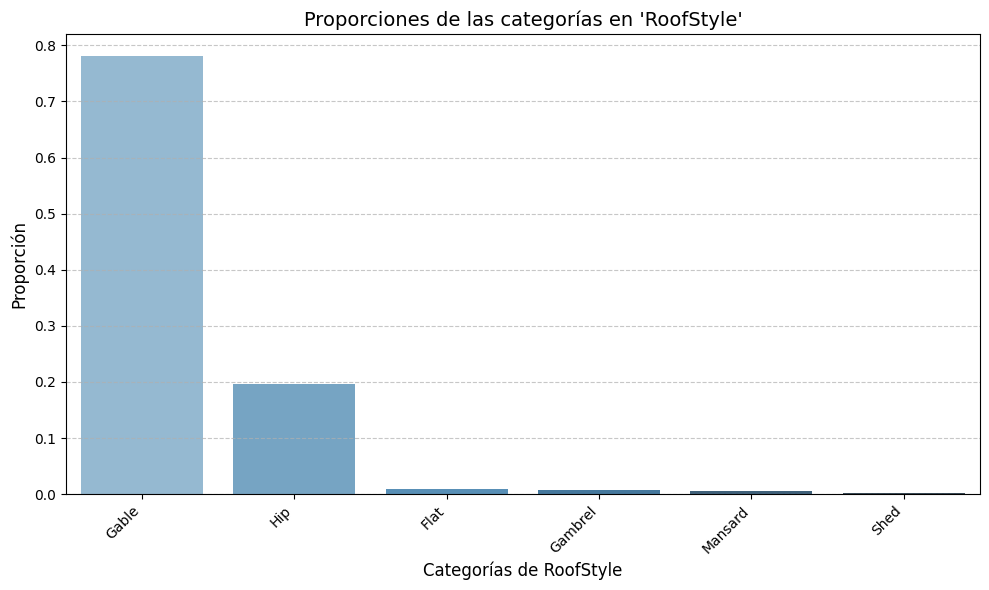

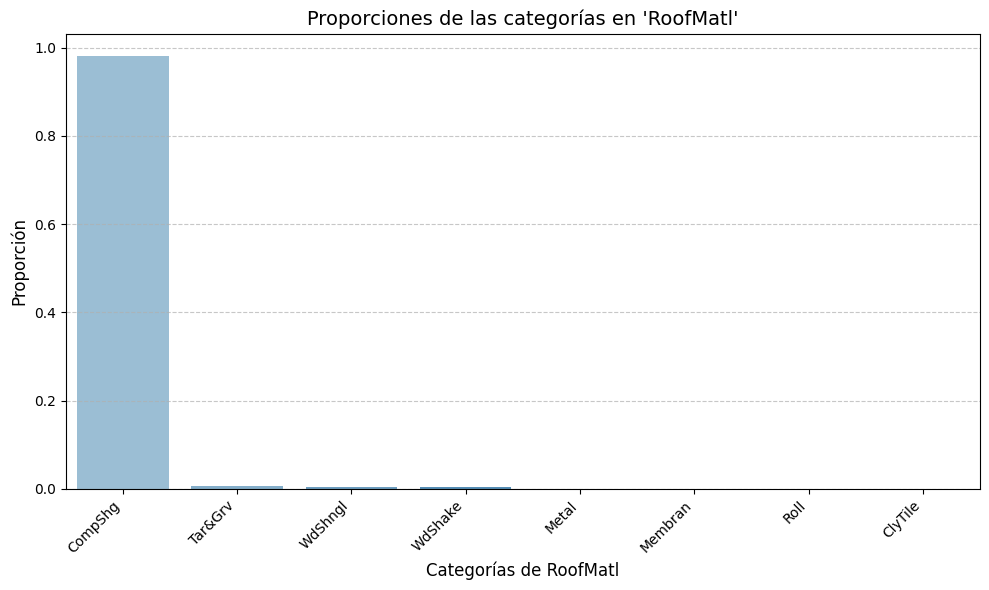

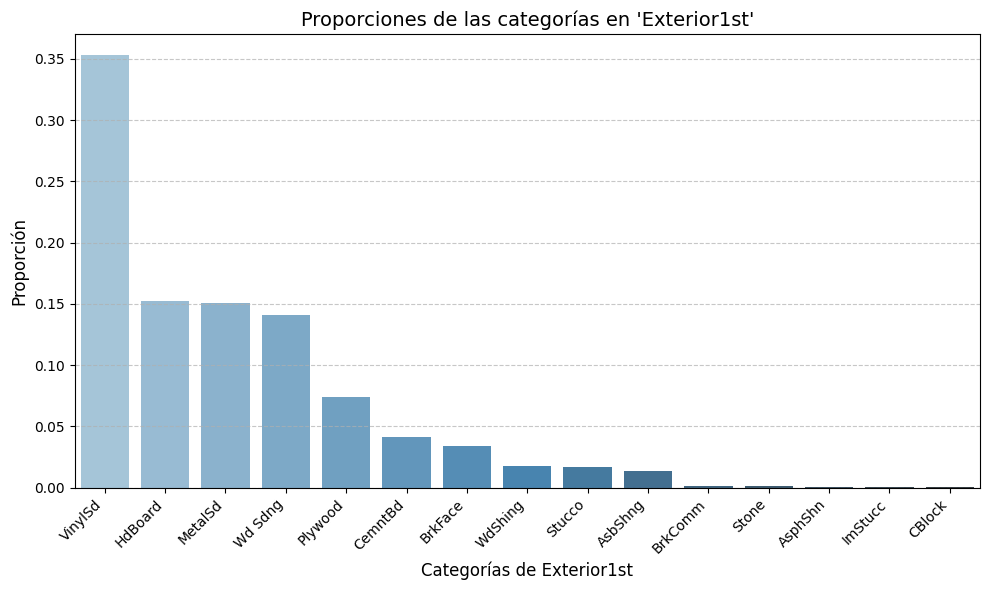

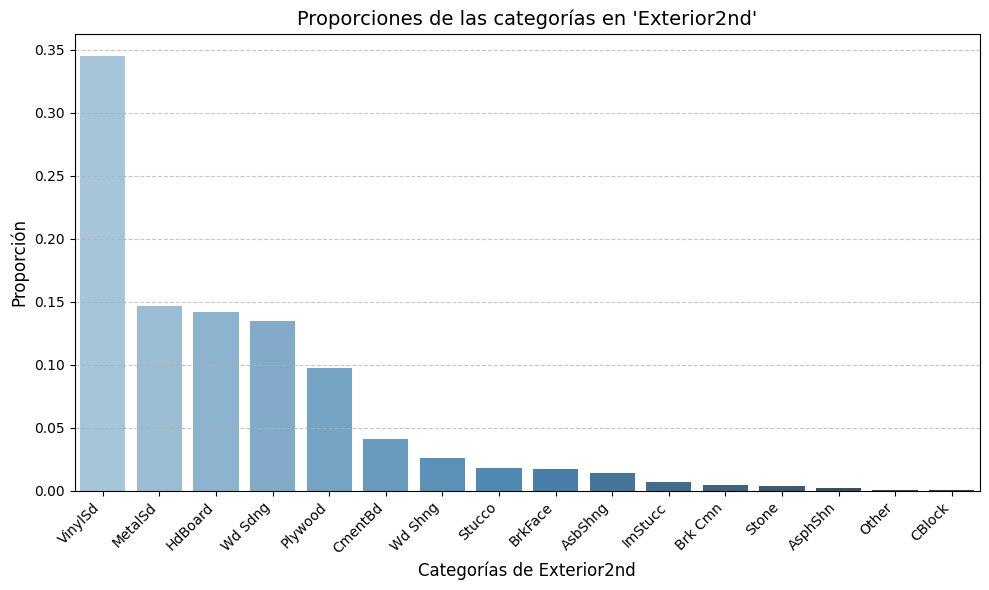

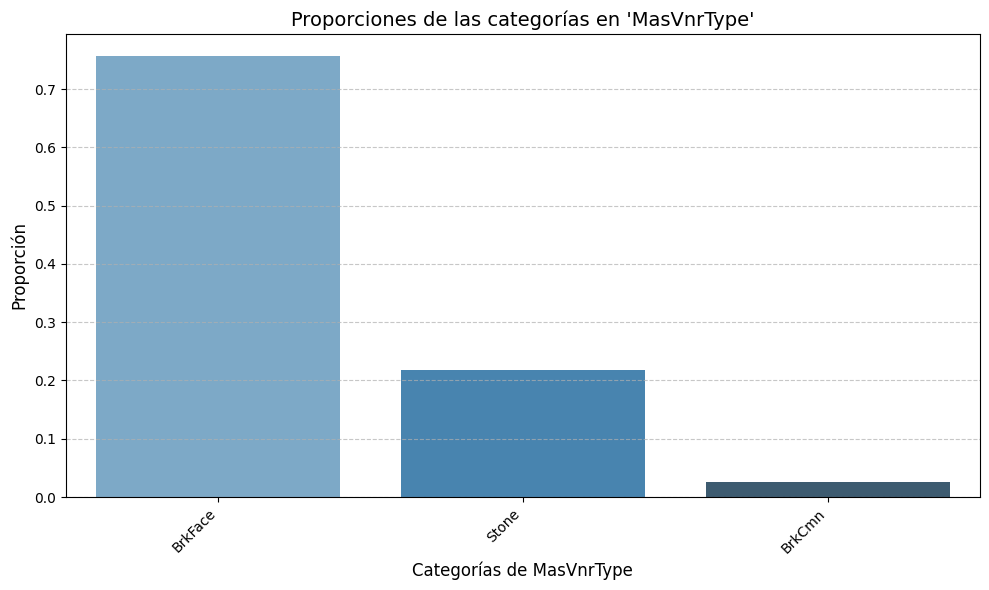

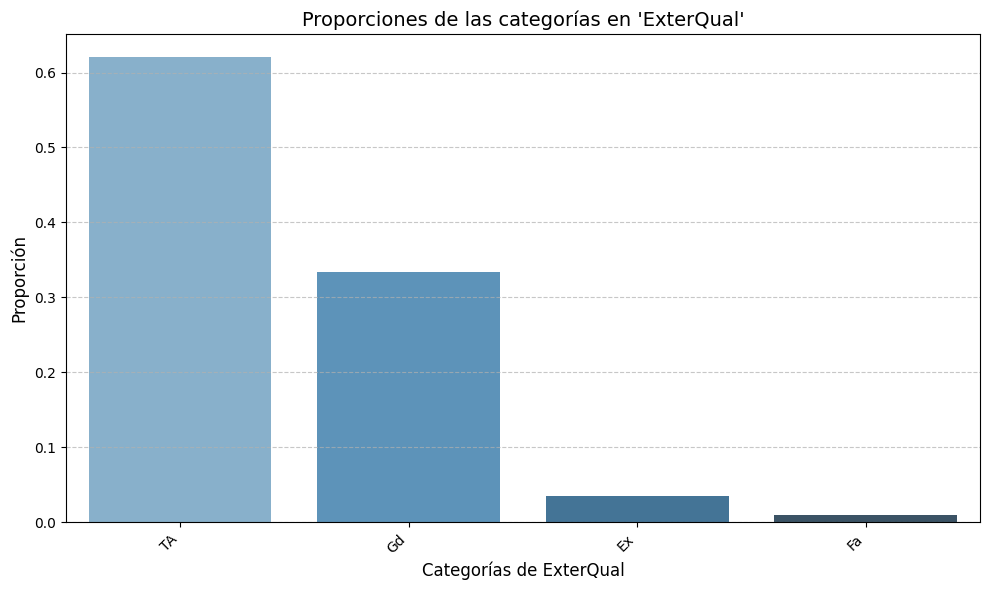

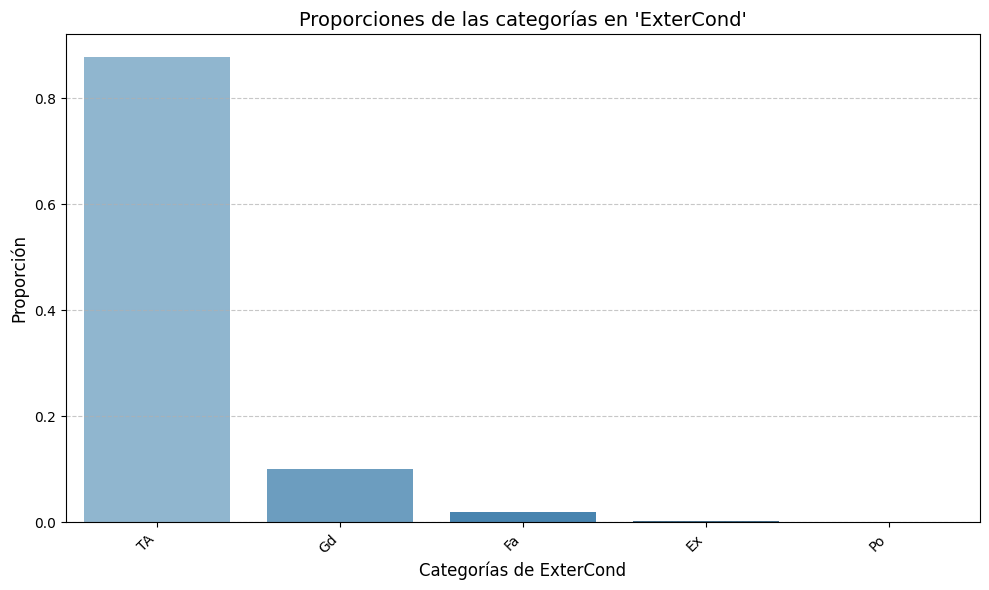

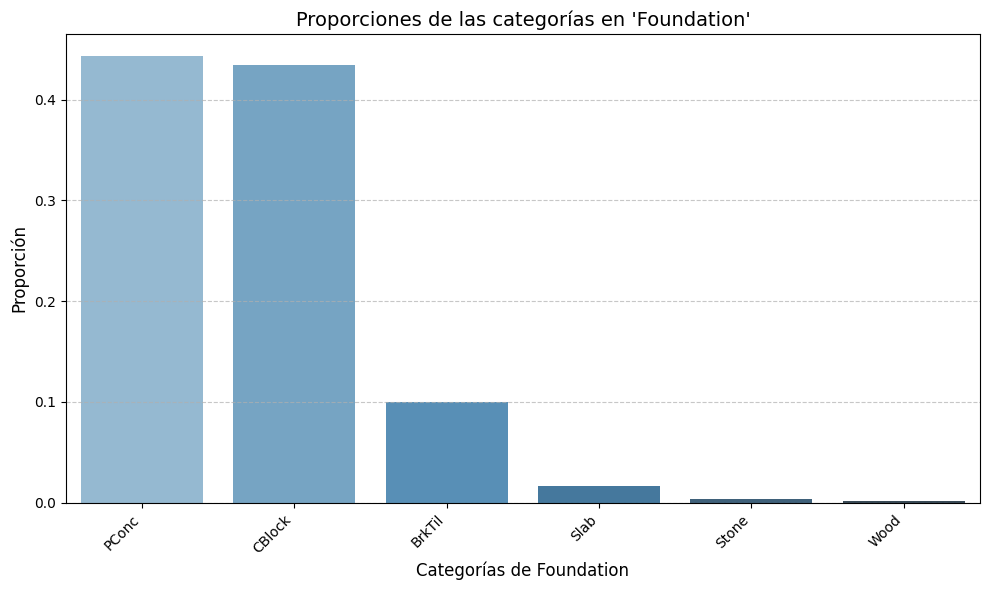

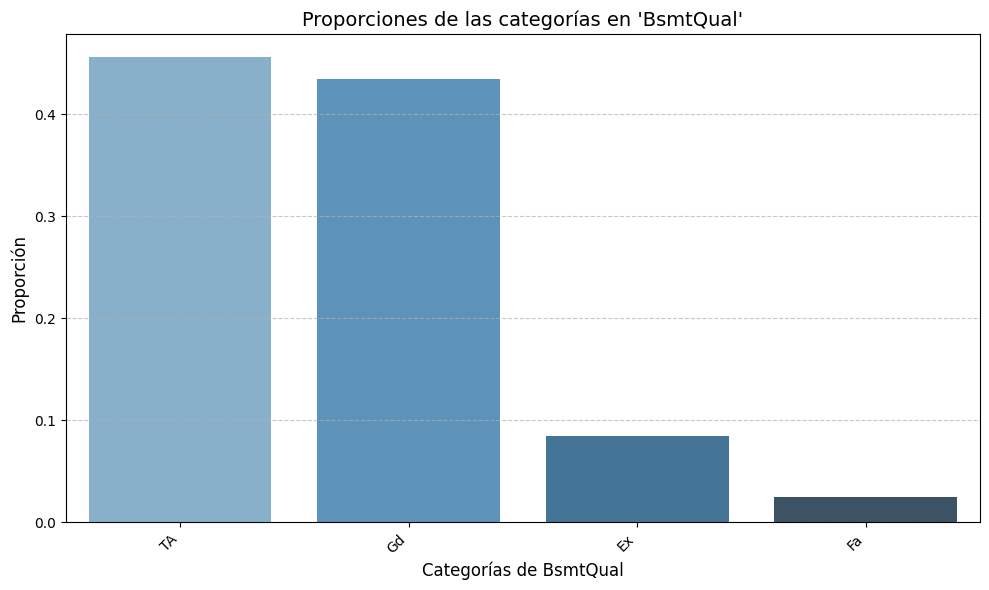

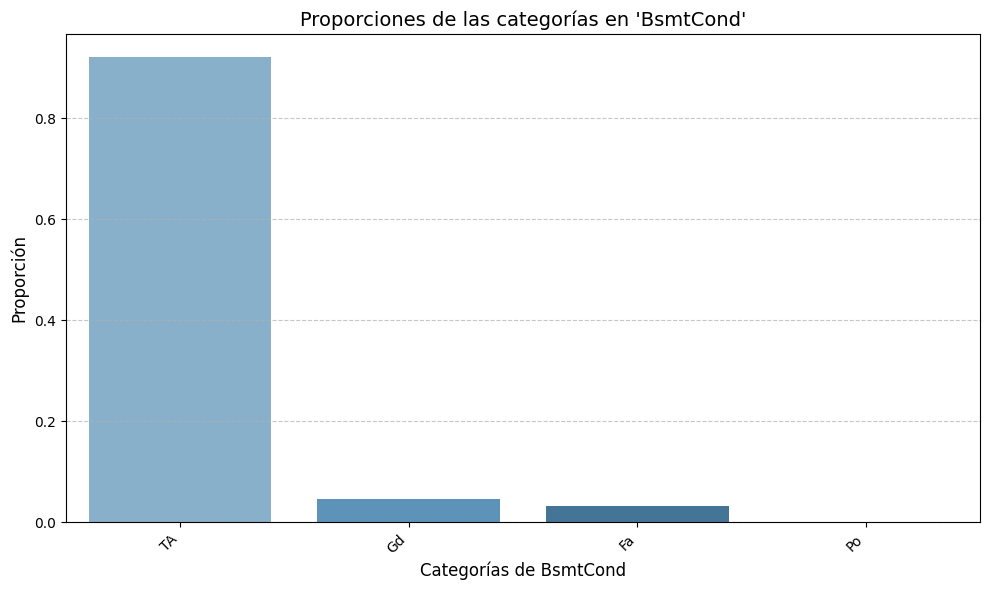

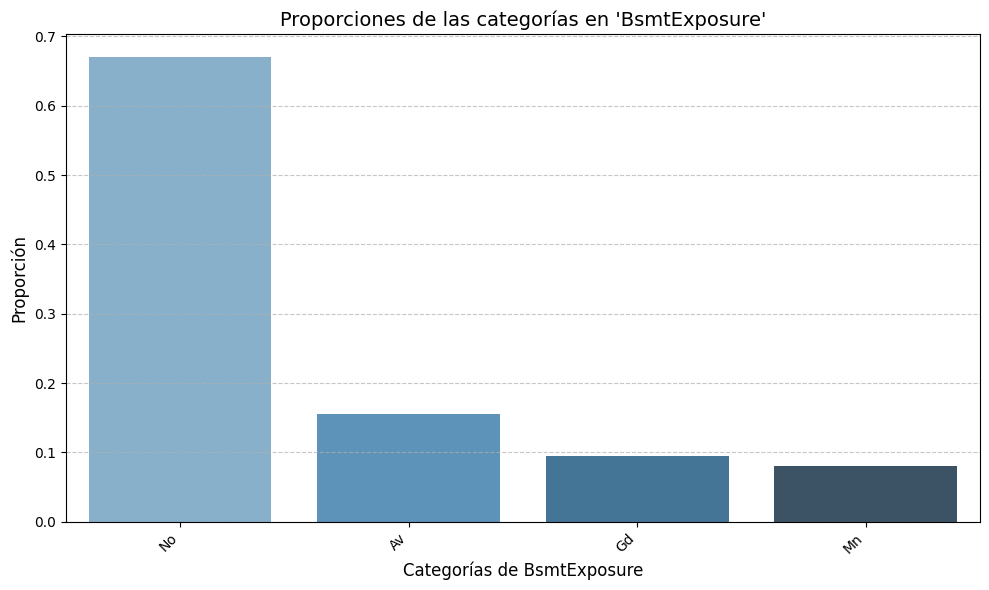

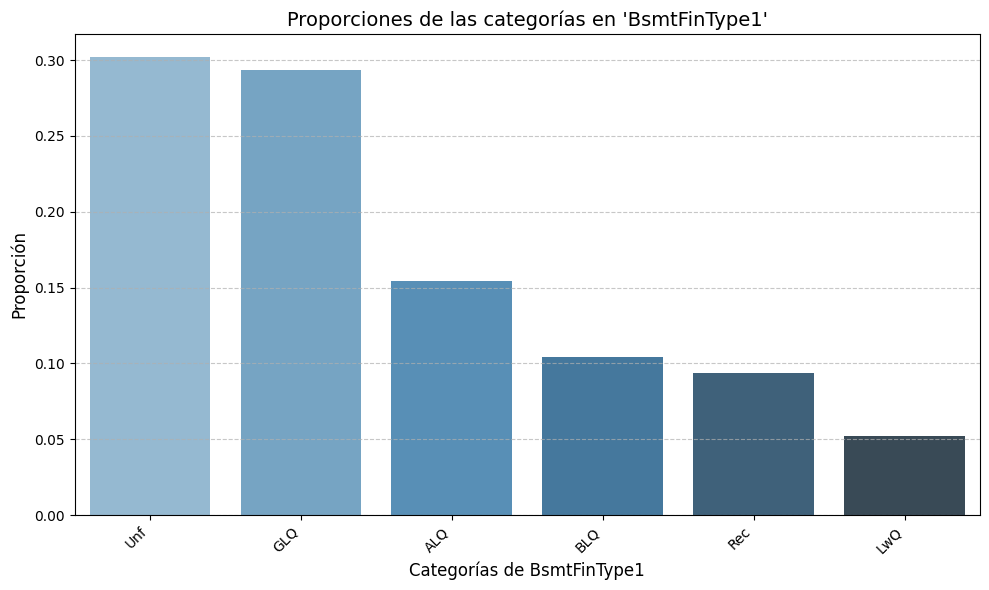

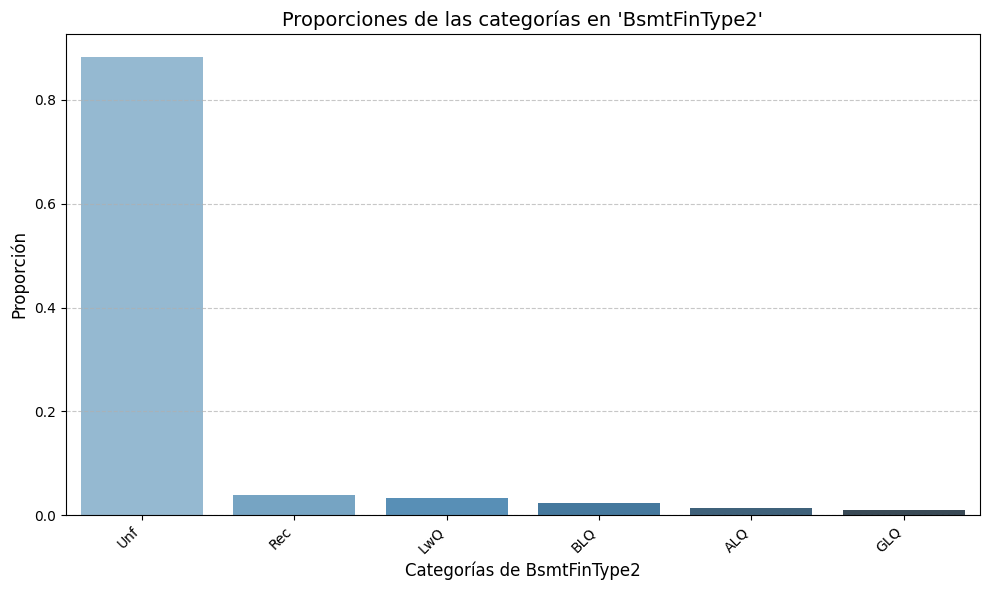

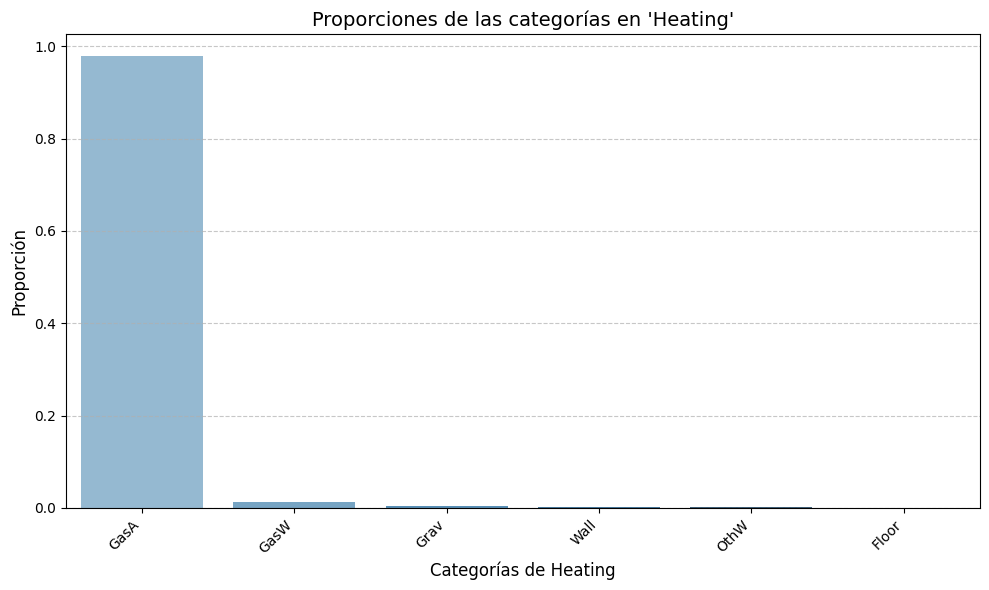

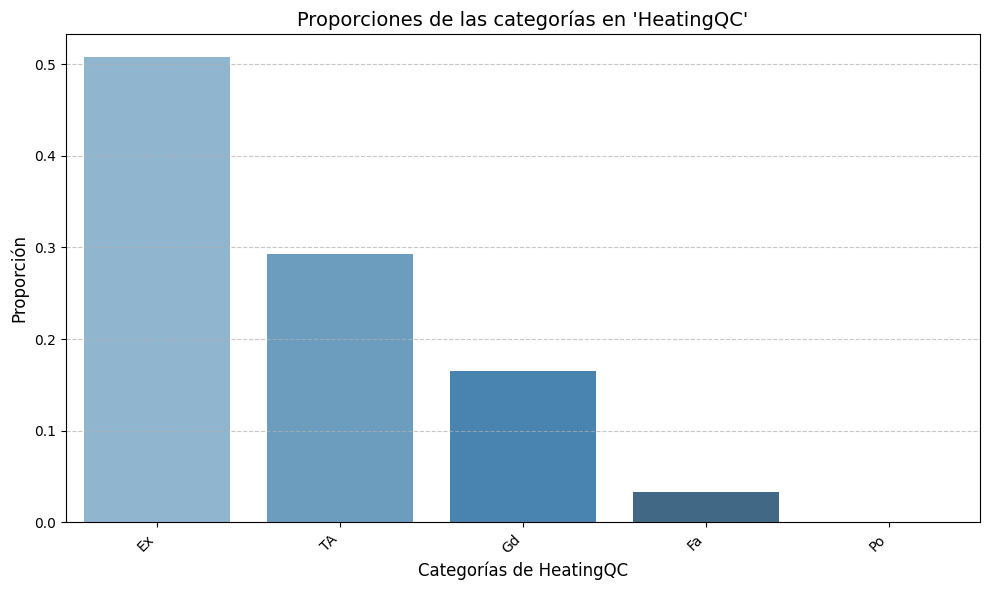

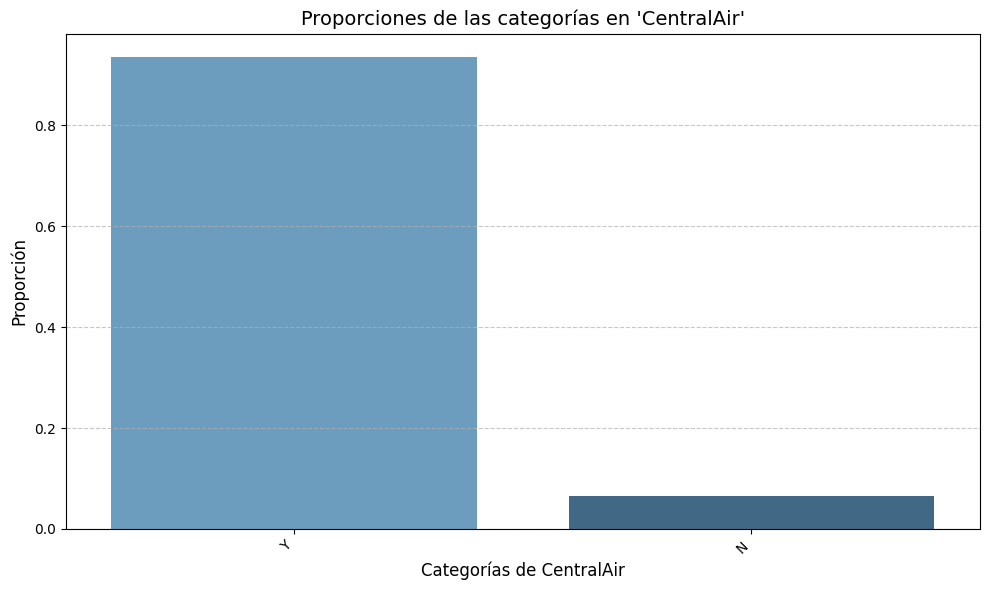

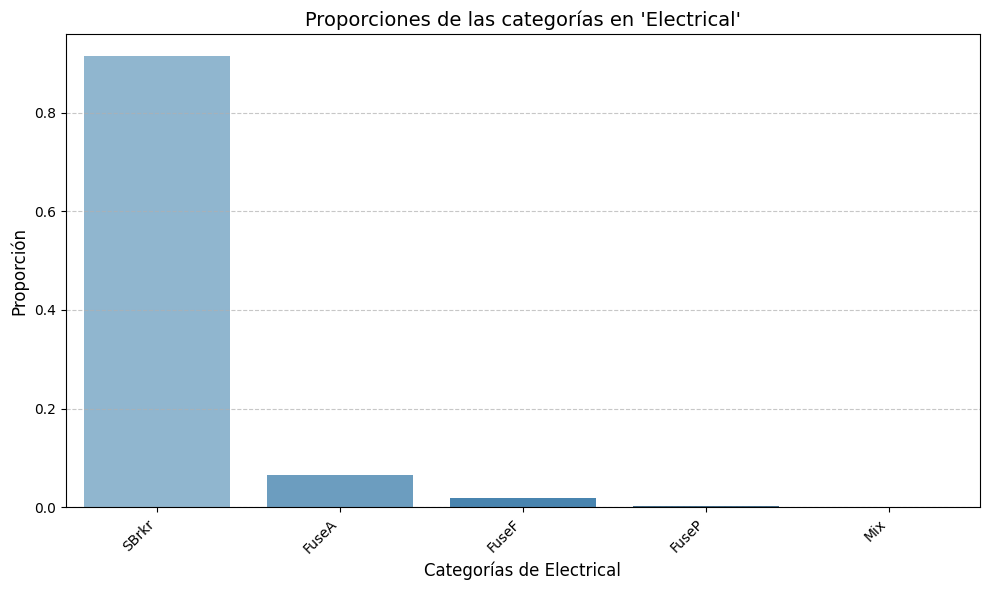

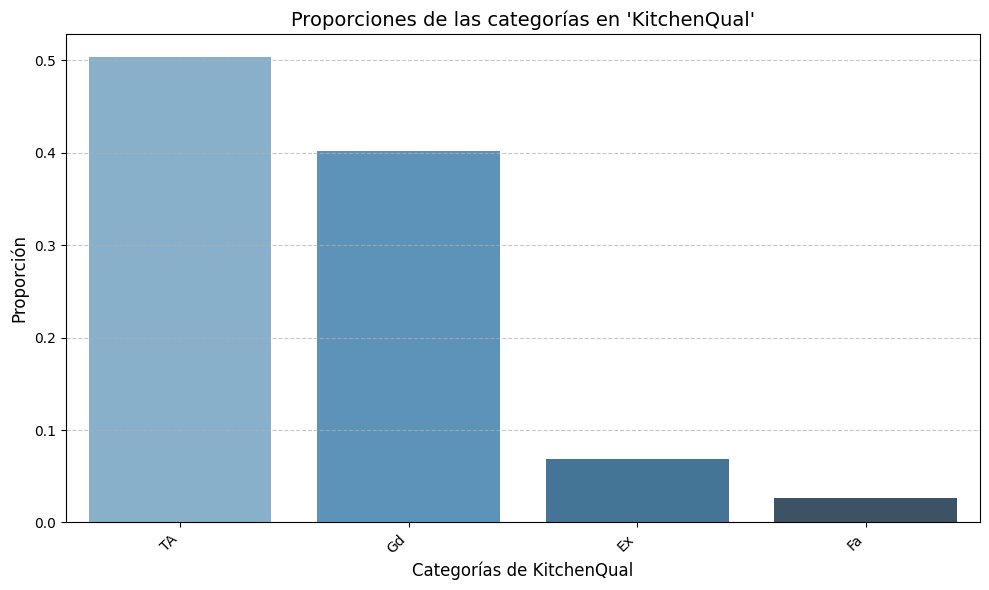

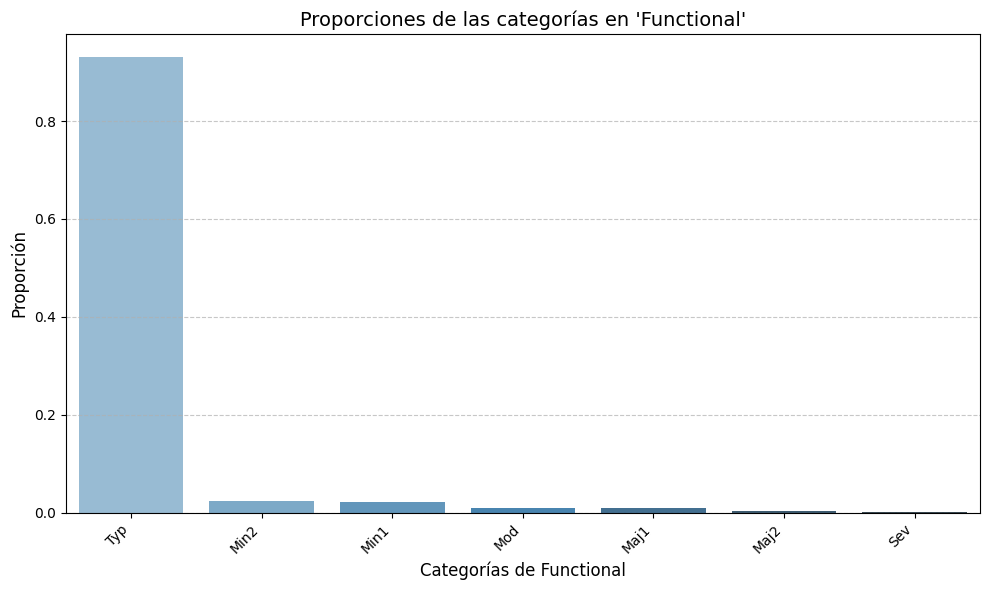

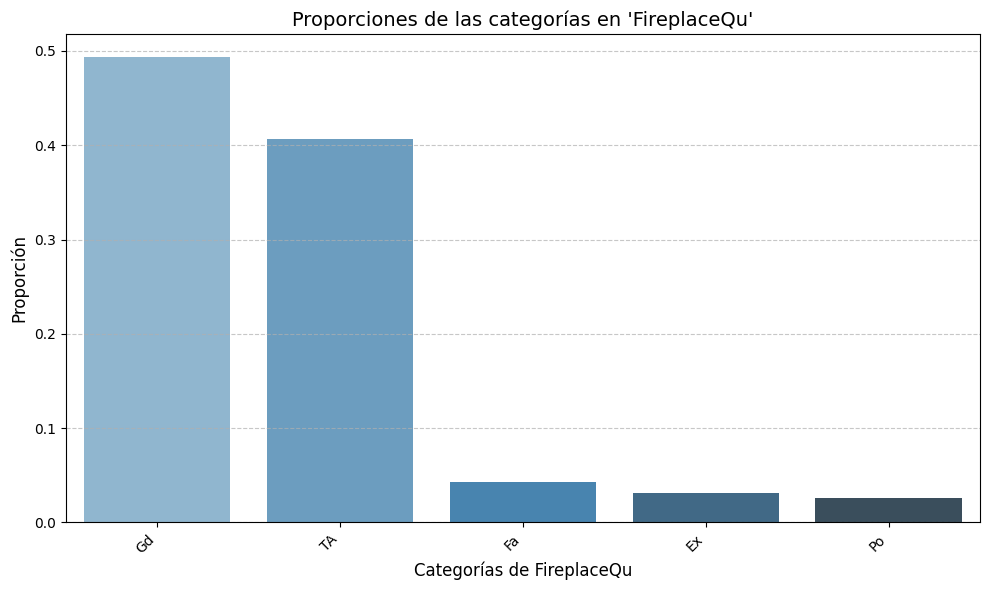

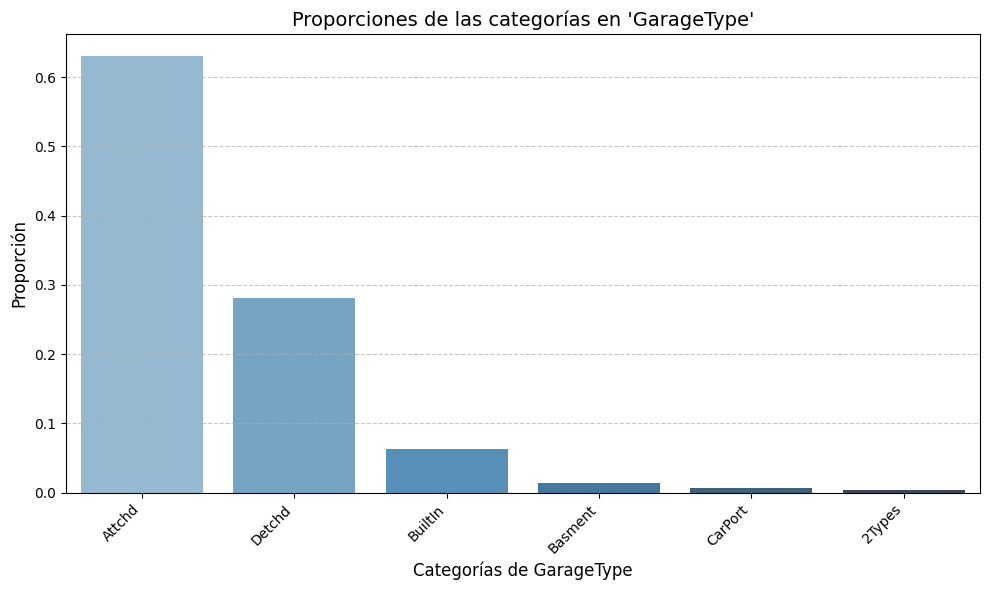

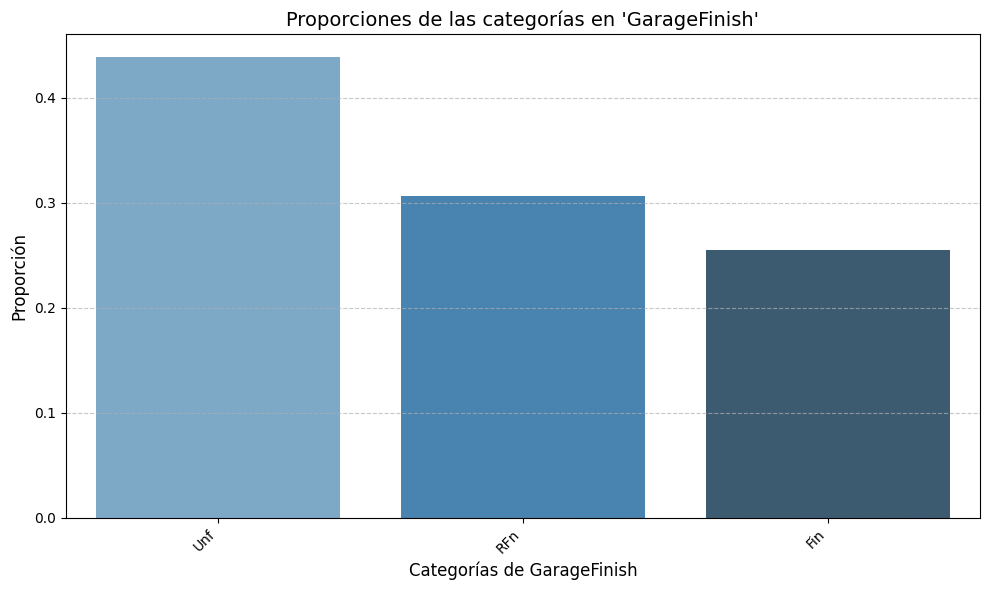

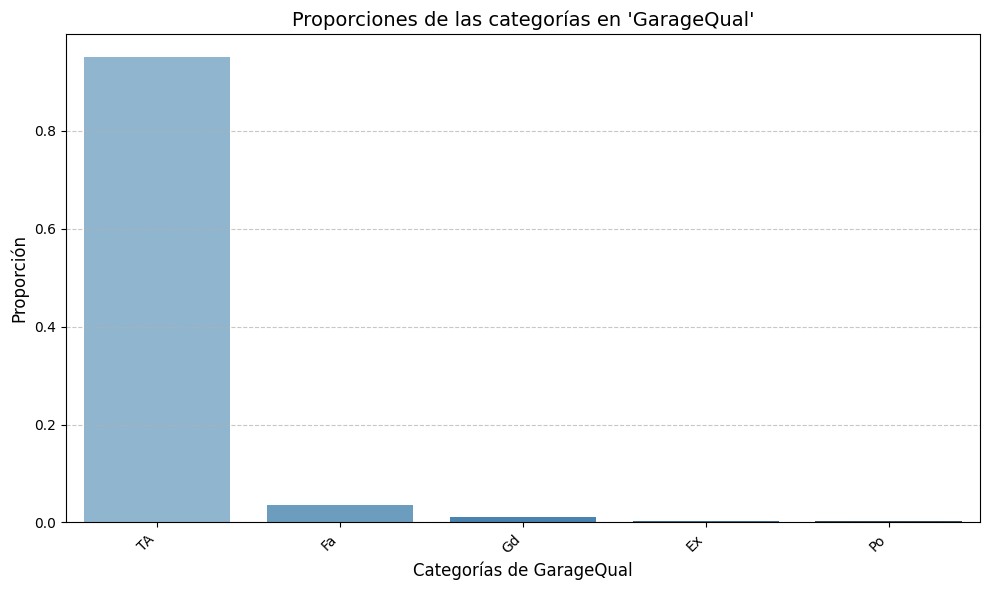

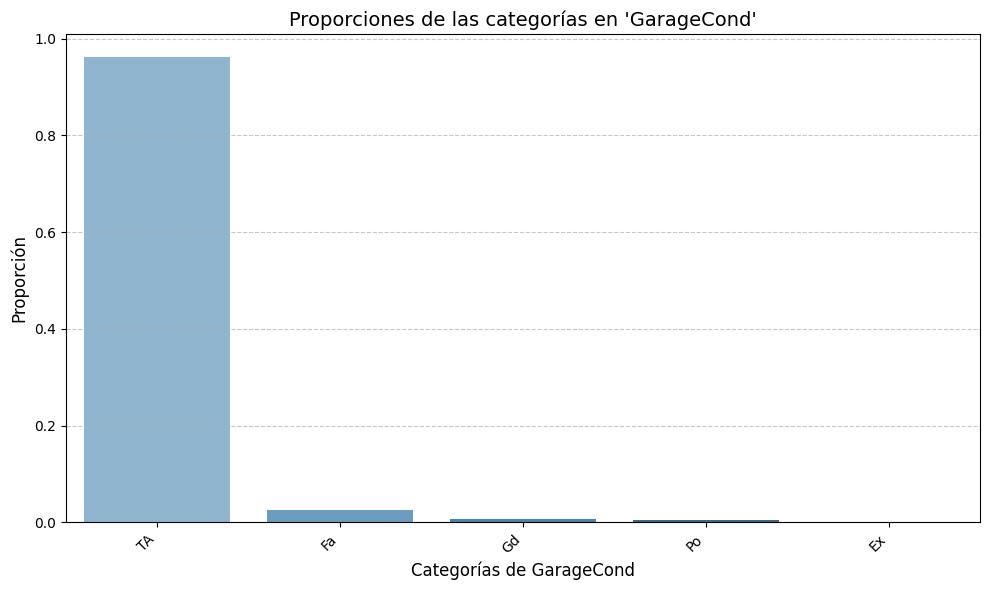

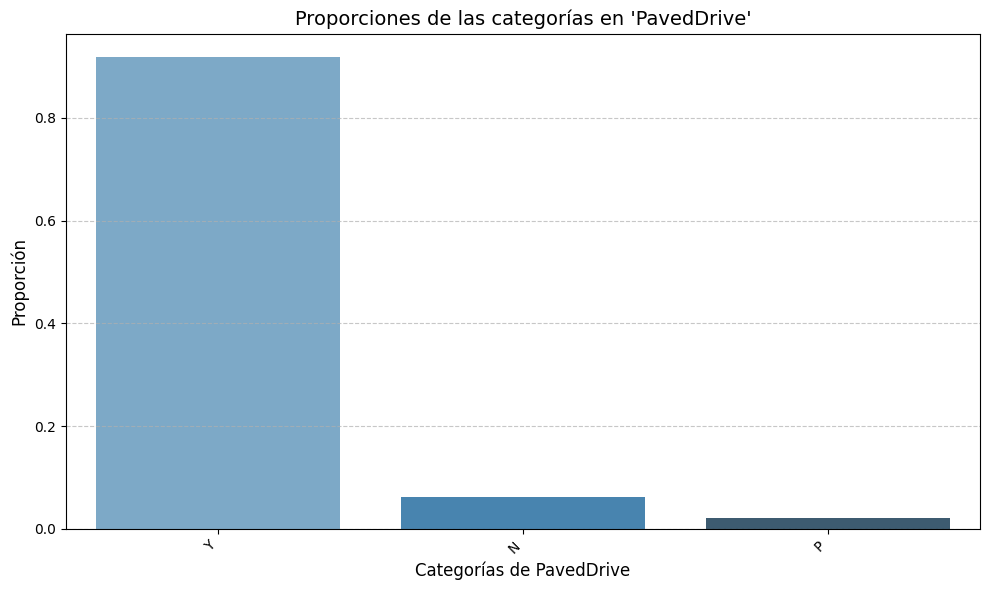

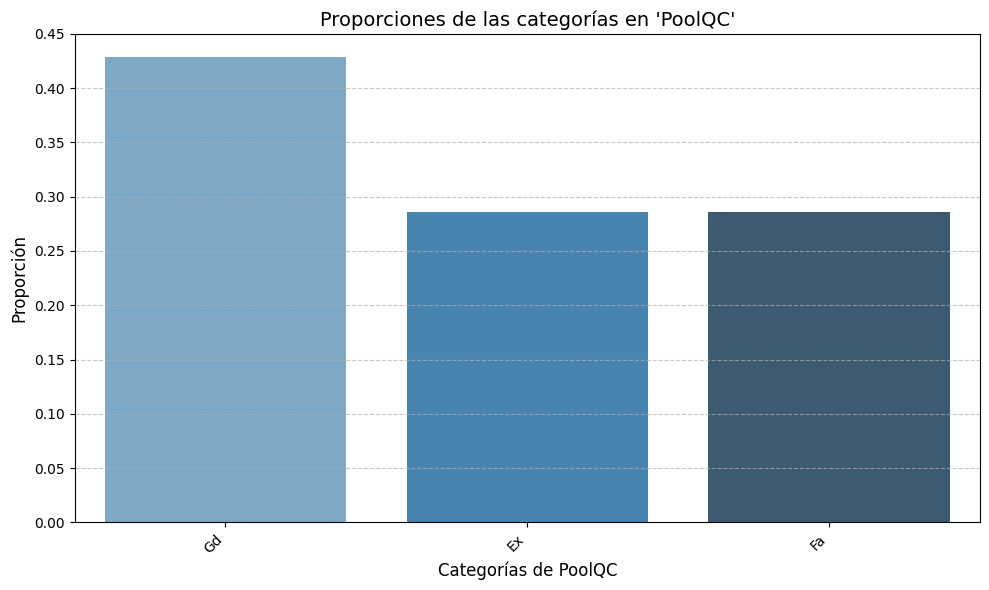

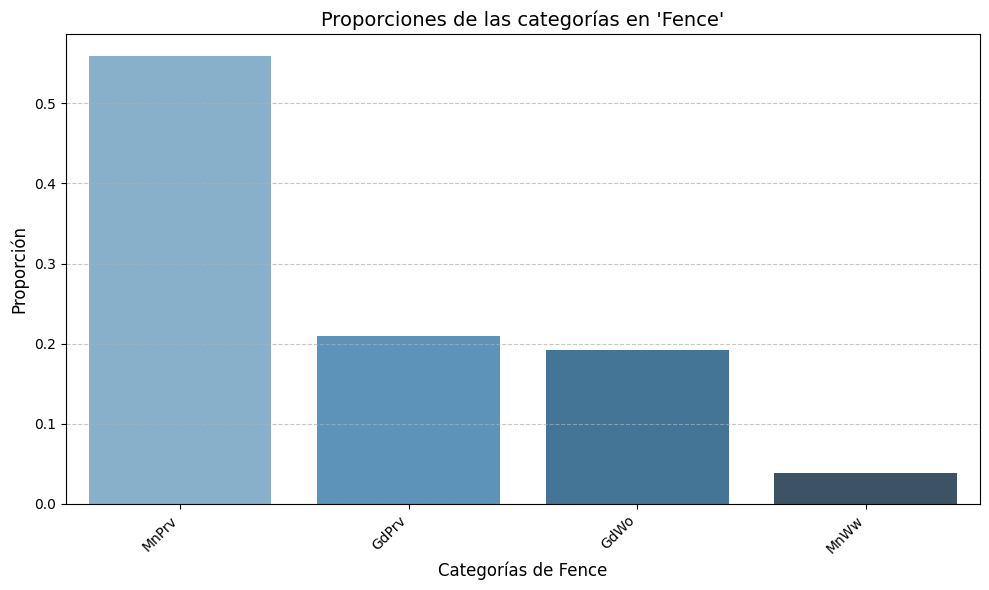

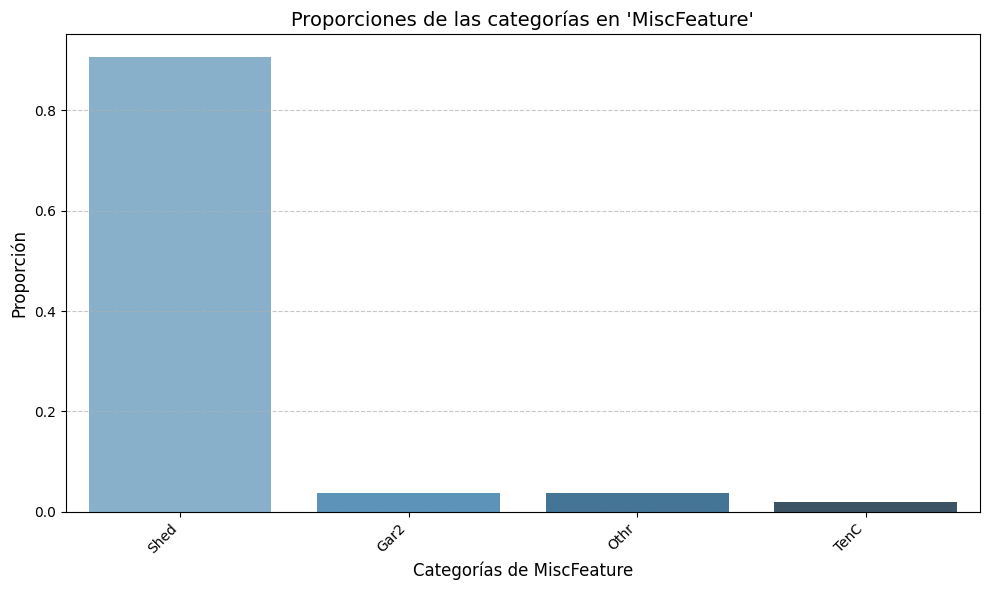

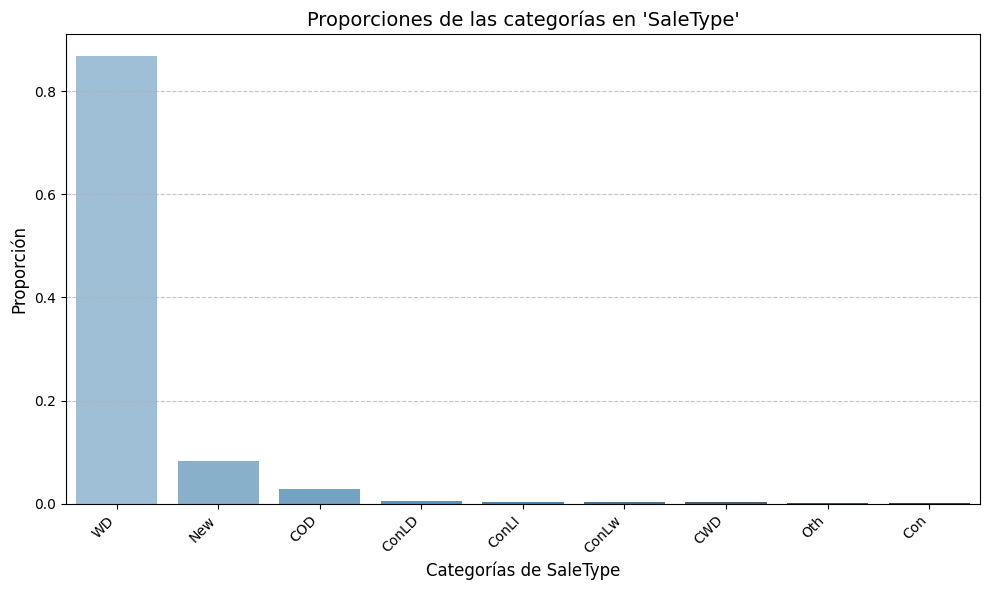

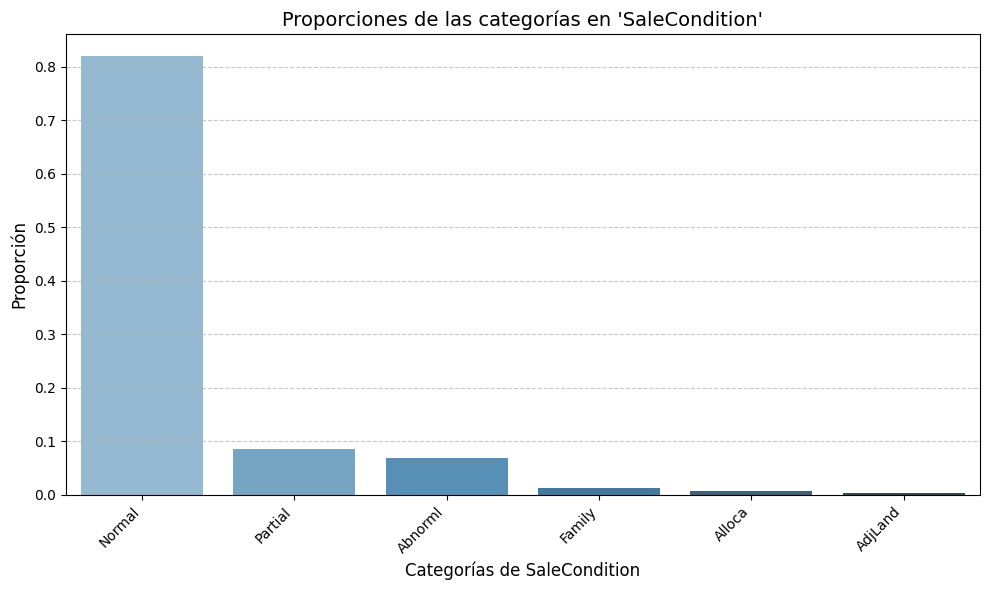

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas categóricas
columnas_categoricas = df_train.select_dtypes(include=["object"])

# Crear un gráfico de barras por cada columna categórica
for col in columnas_categoricas:
    if col in df_train.columns:  # Verificar que la columna esté en el DataFrame
        # Calcular las proporciones de cada categoría
        prop = df_train[col].value_counts(normalize=True)

        # Graficar las proporciones de cada categoría
        plt.figure(figsize=(10, 6))
        sns.barplot(x=prop.index, y=prop.values, hue=prop.index, palette="Blues_d", legend=False)

        # Título y etiquetas
        plt.title(f"Proporciones de las categorías en '{col}'", fontsize=14)
        plt.xlabel(f"Categorías de {col}", fontsize=12)
        plt.ylabel("Proporción", fontsize=12)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Mostrar gráfico
        plt.tight_layout()
        plt.show()


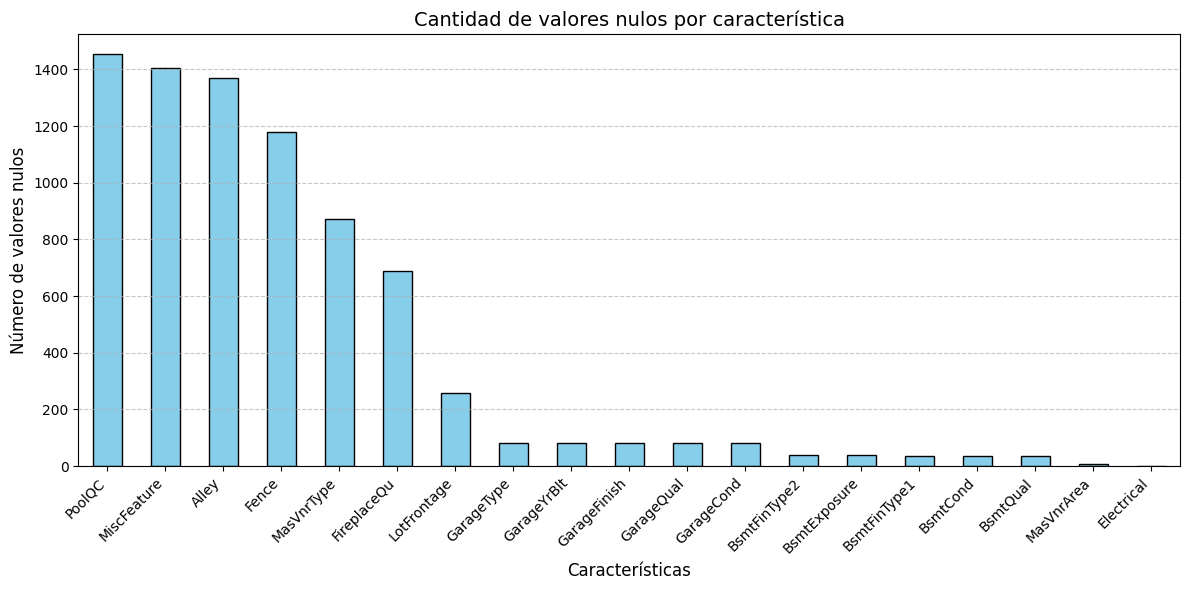

In [14]:
def plot_missing_values(dataframe):
    """
    Función para graficar la cantidad de valores nulos por característica en un DataFrame.
    """
    # Calcular la cantidad de valores nulos
    missing_values = dataframe.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con nulos

    if missing_values.empty:
        print("No hay valores nulos en el DataFrame.")
        return

    # Crear la gráfica
    plt.figure(figsize=(12, 6))
    missing_values.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Cantidad de valores nulos por característica', fontsize=14)
    plt.ylabel('Número de valores nulos', fontsize=12)
    plt.xlabel('Características', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con tu DataFrame `df_train`
plot_missing_values(df_train)

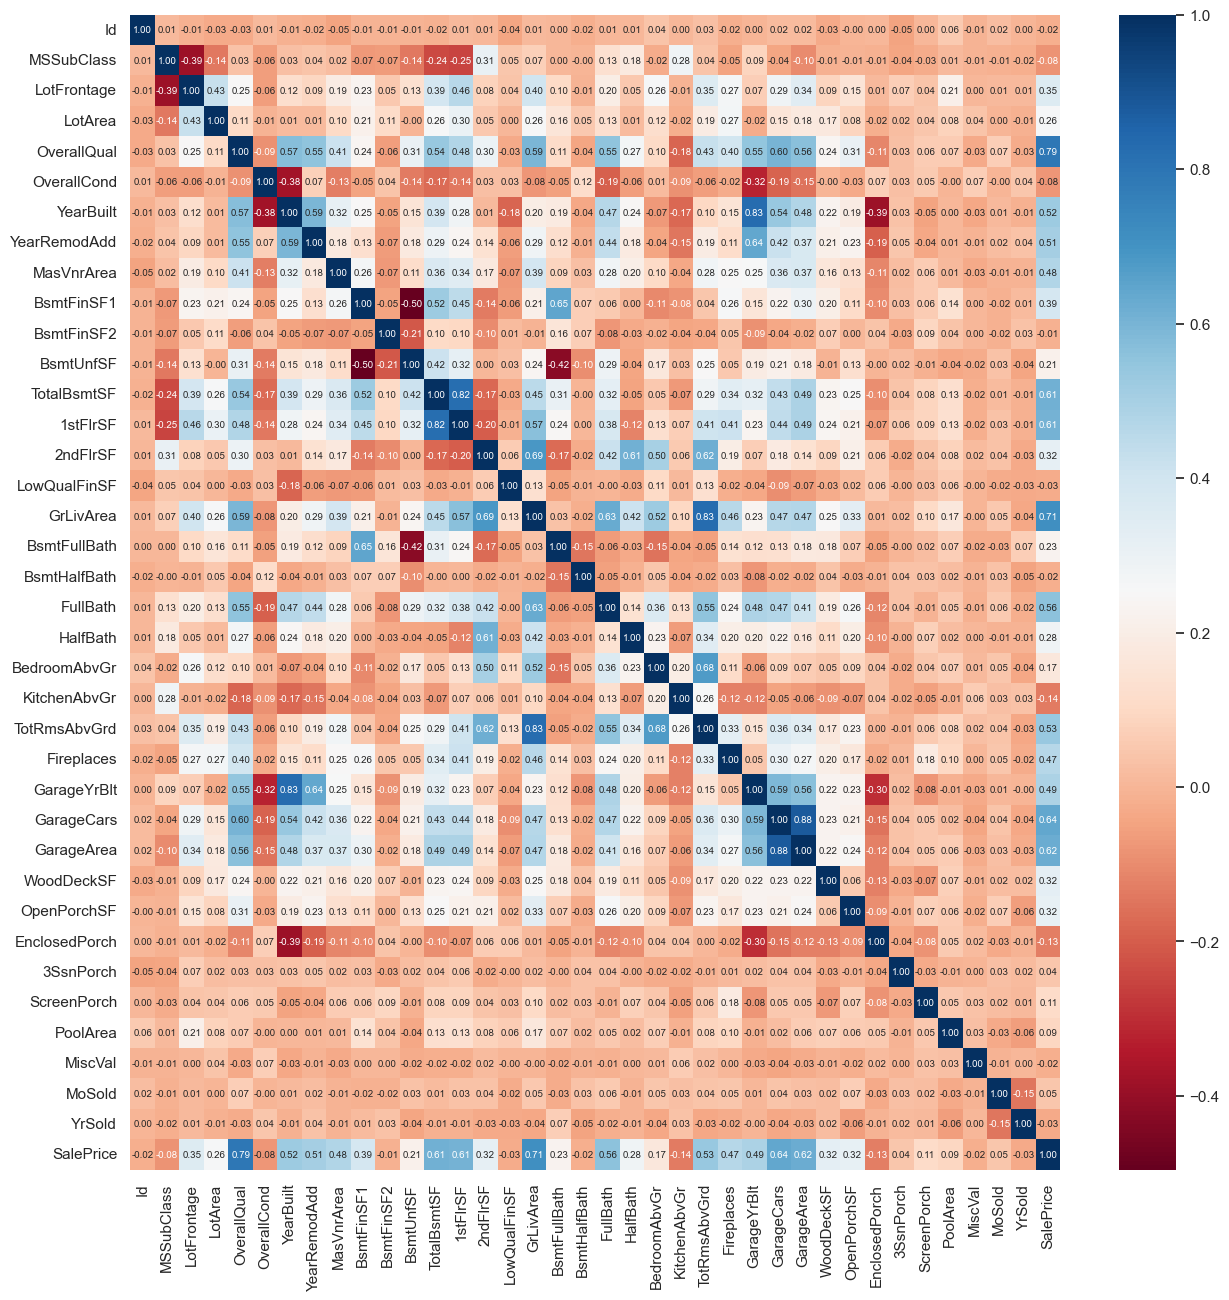

[]

In [15]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", annot_kws={"size": 7})
        plt.show()
    return drop_list

high_correlated_cols(df_train, plot=True)

In [16]:
eliminar = ["Street","LandContour", "Utilities", "LandSlope", "Condition2", "RoofMatl", "ExterCond","BsmtCond", "BsmtFinType2","Heating", "CentralAir","Functional", "GarageQual", "GarageCond", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType"]

df_train.drop(columns= eliminar, inplace=True)
df_test.drop(columns= eliminar, inplace=True)

### Manejo de Datos Faltantes 

In [17]:
# Paso 1: Separar las columnas
columnas_numericas = df_train.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df_train.select_dtypes(include=['object']).columns

# Paso 2: Imputar los valores faltantes para las columnas numéricas utilizando la mediana
ajuste_mediana = SimpleImputer(strategy='median')
df_train[columnas_numericas] = ajuste_mediana.fit_transform(df_train[columnas_numericas])

# Paso 3: Imputar valores faltantes para columnas categóricas usando most_frequent
ajuste_frecuentes = SimpleImputer(strategy='most_frequent')
df_train[columnas_categoricas] = ajuste_frecuentes.fit_transform(df_train[columnas_categoricas])

In [18]:
# Paso 1: Separar las columnas
columnas_numericas = df_test.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df_test.select_dtypes(include=['object']).columns

# Paso 2: Imputar los valores faltantes para las columnas numéricas utilizando la mediana
ajuste_mediana = SimpleImputer(strategy='median')
df_test[columnas_numericas] = ajuste_mediana.fit_transform(df_test[columnas_numericas])

# Paso 3: Imputar valores faltantes para columnas categóricas usando most_frequent
ajuste_frecuentes = SimpleImputer(strategy='most_frequent')
df_test[columnas_categoricas] = ajuste_frecuentes.fit_transform(df_test[columnas_categoricas])

In [19]:
encoder = LabelEncoder()
categorical_columns = [
    'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 
    'HouseStyle', 'RoofStyle',  'Exterior1st', 'Exterior2nd', 
    'ExterQual', 'Foundation', 'BsmtQual',  
    'BsmtExposure', 'BsmtFinType1',  'HeatingQC', 'Electrical', 'KitchenQual',  'GarageType', 
    'GarageFinish', 'PavedDrive', 'SaleType', 
    'SaleCondition'
]

for column in categorical_columns:
    df_train[column] = encoder.fit_transform(df_train[column])
    
for column in categorical_columns:
    df_test[column] = encoder.fit_transform(df_test[column]) 

In [20]:
x = df_train.iloc[ : , :-1] #datos de entrenamiento
y = df_train.iloc[ : , -1] #precio de venta

In [21]:
x

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0        1.0        60.0         3         65.0   8450.0         3          4   
1        2.0        20.0         3         80.0   9600.0         3          2   
2        3.0        60.0         3         68.0  11250.0         0          4   
3        4.0        70.0         3         60.0   9550.0         0          0   
4        5.0        60.0         3         84.0  14260.0         0          2   
...      ...         ...       ...          ...      ...       ...        ...   
1455  1456.0        60.0         3         62.0   7917.0         3          4   
1456  1457.0        20.0         3         85.0  13175.0         3          4   
1457  1458.0        70.0         3         66.0   9042.0         3          4   
1458  1459.0        20.0         3         68.0   9717.0         3          4   
1459  1460.0        20.0         3         75.0   9937.0         3          4   

      Neighborhood  Condition1  BldgType  ...  OpenPorchSF  EnclosedPorch  \
0                5           2         0  ...         61.0            0.0   
1               24           1         0  ...          0.0            0.0   
2                5           2         0  ...         42.0            0.0   
3                6           2         0  ...         35.0          272.0   
4               15           2         0  ...         84.0            0.0   
...            ...         ...       ...  ...          ...            ...   
1455             8           2         0  ...         40.0            0.0   
1456            14           2         0  ...          0.0            0.0   
1457             6           2         0  ...         60.0            0.0   
1458            12           2         0  ...          0.0          112.0   
1459             7           2         0  ...         68.0            0.0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0           0.0          0.0       0.0      0.0     2.0  2008.0         8   
1           0.0          0.0       0.0      0.0     5.0  2007.0         8   
2           0.0          0.0       0.0      0.0     9.0  2008.0         8   
3           0.0          0.0       0.0      0.0     2.0  2006.0         8   
4           0.0          0.0       0.0      0.0    12.0  2008.0         8   
...         ...          ...       ...      ...     ...     ...       ...   
1455        0.0          0.0       0.0      0.0     8.0  2007.0         8   
1456        0.0          0.0       0.0      0.0     2.0  2010.0         8   
1457        0.0          0.0       0.0   2500.0     5.0  2010.0         8   
1458        0.0          0.0       0.0      0.0     4.0  2010.0         8   
1459        0.0          0.0       0.0      0.0     6.0  2008.0         8   

      SaleCondition  
0                 4  
1                 4  
2                 4  
3                 0  
4                 4  
...             ...  
1455              4  
1456              4  
1457              4  
1458              4  
1459              4  

[1460 rows x 60 columns]

In [22]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

Estandarizamos 

In [23]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [24]:
y_df = y.to_frame()
y = scaler.fit_transform(y_df)

In [25]:
y.shape

(1460, 1)

División de entrenamiento para entrenamiento y validación 

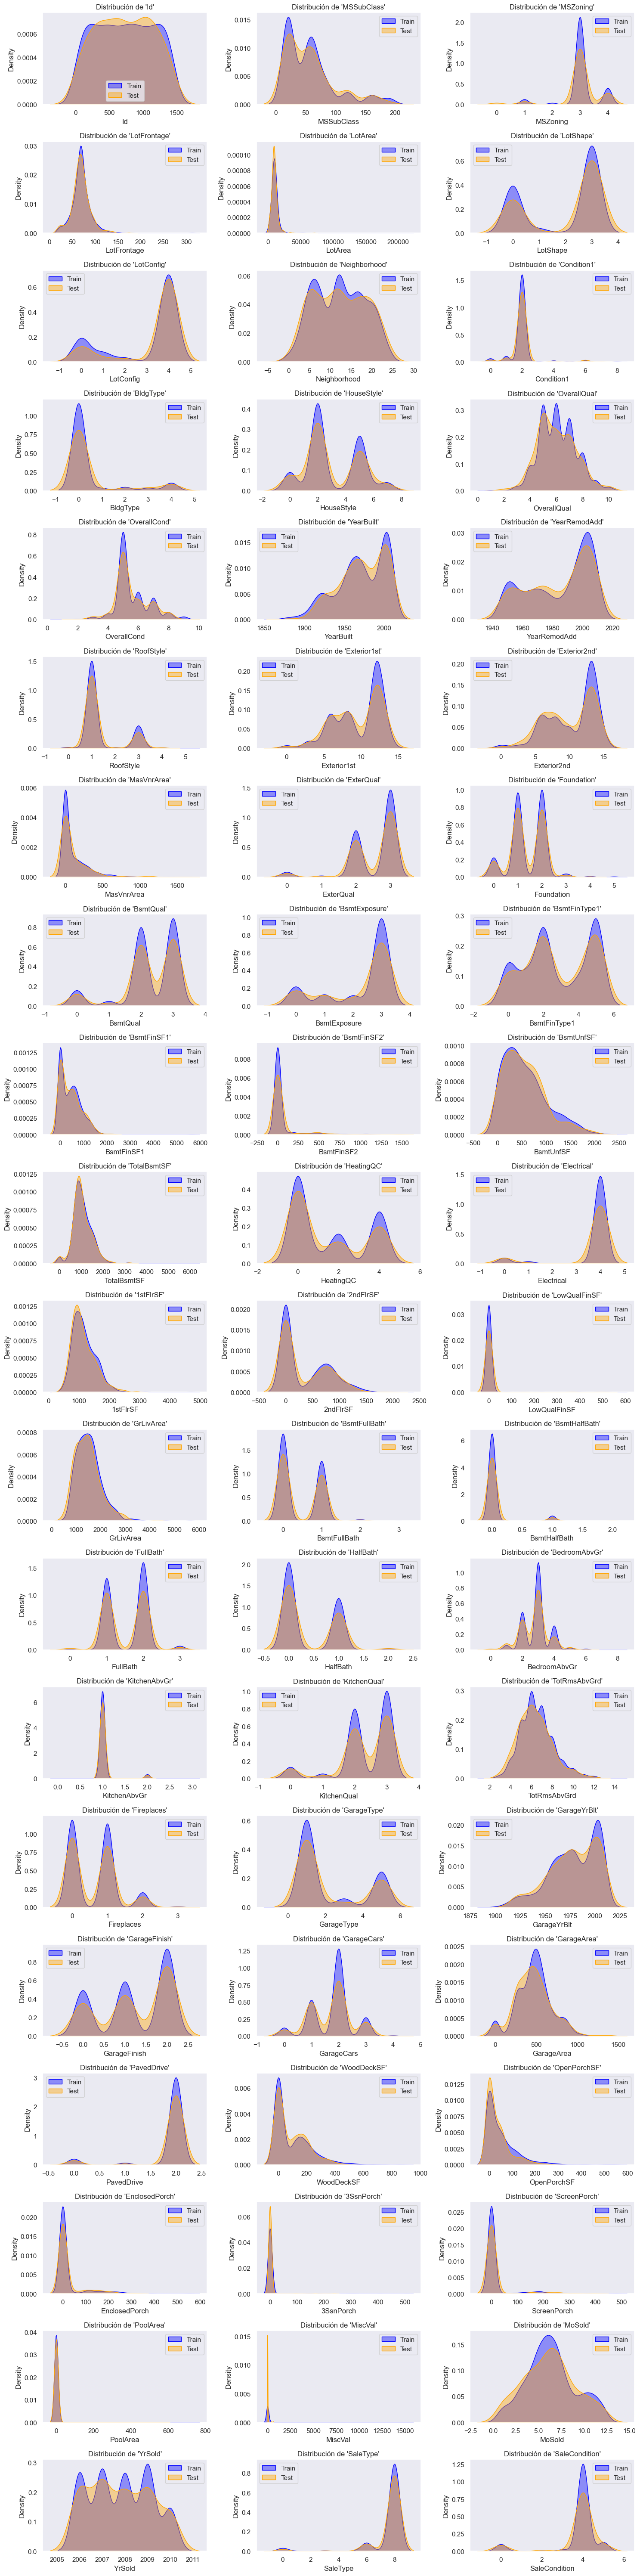

In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

# Supongamos que `df` es tu DataFrame original
# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    df_train.drop(columns=["SalePrice"]),  # Variables predictoras
    df_train["SalePrice"],  # Variable objetivo
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# Convertir `x_train` y `x_test` a DataFrames para mantener nombres de columnas
x_train_df = pd.DataFrame(x_train, columns=df_train.drop(columns=["SalePrice"]).columns)
x_test_df = pd.DataFrame(x_test, columns=df_train.drop(columns=["SalePrice"]).columns)

# Función para visualizar la distribución de características en una sola figura
def check_data_representation(X_train, X_test, feature_list):
    num_features = len(feature_list)
    cols = 3  # Número de gráficos por fila
    rows = (num_features + cols - 1) // cols  # Número de filas necesarias
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()  # Convertir en una lista para iterar fácilmente
    
    for idx, feature in enumerate(feature_list):
        sns.kdeplot(X_train[feature], label="Train", fill=True, color="blue", alpha=0.4, ax=axes[idx])
        sns.kdeplot(X_test[feature], label="Test", fill=True, color="orange", alpha=0.4, ax=axes[idx])
        axes[idx].set_title(f"Distribución de '{feature}'")
        axes[idx].legend()
        axes[idx].grid()
    
    # Eliminar cualquier subplot vacío
    for ax in axes[num_features:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

# Lista de características numéricas clave
features_to_check = x_train_df.columns

# Llamada a la función con los DataFrames corregidos
check_data_representation(x_train_df, x_test_df, feature_list=features_to_check)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True,random_state=42)

Modelos de machine 


In [28]:
linearRegression= LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
decisionTreeRegresor = DecisionTreeRegressor(random_state=42)
randomForest = RandomForestRegressor(random_state=42)

In [29]:
print("Regresión Lineal: " , linearRegression.get_params())
print("Lasso: " , lasso.get_params())
print("Rigde: " , ridge.get_params())
print("Arbol de decisión: " , decisionTreeRegresor.get_params())
print("Radom Forest: " , randomForest.get_params())

Regresión Lineal:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Lasso:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Rigde:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Arbol de decisión:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Radom Forest:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2,

In [30]:
linearRegression.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
svr.fit(x_train, y_train)
decisionTreeRegresor.fit(x_train, y_train)
randomForest.fit(x_train, y_train)

c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [31]:

def evaluate_models(models, models_names, x_train, y_train, x_valid, y_valid):
    # Calcular predicciones y errores cuadrados para cada modelo
    squared_errors = []
    for model in models:
        y_pred = model.predict(x_valid)
        mse = mean_squared_error(y_valid, y_pred)
        squared_errors.append(f'{mse * 100:.2f}%')  # Formatear como porcentaje

    # Calcular puntuaciones de entrenamiento y validación
    train_score = [model.score(x_train, y_train) for model in models]
    valid_score = [model.score(x_valid, y_valid) for model in models]

    # Diferencia entre las puntuaciones de entrenamiento y validación
    ratio = []
    for train, valid in zip(train_score, valid_score):
        result = train - valid
        ratio.append(f'{result * 100:.2f}%')

    # Evaluar el estado del modelo
    rate = []
    for train, valid in zip(train_score, valid_score):
        if train <= 0.65 and valid <= 0.65:
            rate.append('malo')
        elif train > valid * 1.10:
            rate.append('overfite')
        elif train > 0.65 and train < 0.80 and valid > 0.65 and valid < 0.80:
            rate.append('medio')
        elif train >= 0.80 and valid >= 0.80 and train < 1.00 and valid < 1.00:
            rate.append('bueno')
        elif train >= 0.80 and valid < 0.80:
            rate.append('Alto train, Bajo test')
        else:
            rate.append('unknown')

    # Crear DataFrame con los resultados
    model_score = pd.DataFrame({
        'Modelo': models_names,
        'Score Entrenamiento': [f'{round(score * 100, 2)}%' for score in train_score],
        'Score Validacion': [f'{round(score * 100, 2)}%' for score in valid_score],
        'Difererencia': ratio,
        'Evaluacion': rate,
        'MSE': squared_errors
    })

    return model_score, train_score, valid_score

# Ejemplo de uso
models = [linearRegression, lasso, ridge, svr, decisionTreeRegresor, randomForest]
models_names = ['RegresionLineal','Lasso', 'Rigde', 'Svr','ArbolesDecisionRegresion','RandomForestRegresion']
model_score, t, v = evaluate_models(models, models_names, x_train, y_train, x_test, y_test)

model_score

Modelo Score Entrenamiento Score Validacion Difererencia  \
0           RegresionLineal              83.82%           84.56%       -0.74%   
1                     Lasso                0.0%           -0.09%        0.09%   
2                     Rigde              83.82%           84.56%       -0.74%   
3                       Svr              92.13%           80.86%       11.27%   
4  ArbolesDecisionRegresion              100.0%           74.22%       25.78%   
5     RandomForestRegresion              97.96%           89.33%        8.63%   

  Evaluacion      MSE  
0      bueno   18.78%  
1       malo  121.73%  
2      bueno   18.78%  
3   overfite   23.28%  
4   overfite   31.35%  
5      bueno   12.97%

## Validacion cruzada 

### Regresión Lineal 

In [32]:

model = LinearRegression()

mse_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

metricas = {
    "Métrica": ["MSE (Validación cruzada)", "R² (Validación cruzada)", "MAE (Validación cruzada)", 
                "RMSE (Prueba)", "R² (Prueba)", "MAE (Prueba)"],
    "Valor": [mse_cv, r2_cv, mae_cv, rmse_test, r2_test, mae_test]
}

df_metricas = pd.DataFrame(metricas)

df_metricas

Métrica     Valor
0  MSE (Validación cruzada)  0.217421
1   R² (Validación cruzada)  0.780681
2  MAE (Validación cruzada)  0.262708
3             RMSE (Prueba)  0.433392
4               R² (Prueba)  0.845561
5              MAE (Prueba)  0.270211

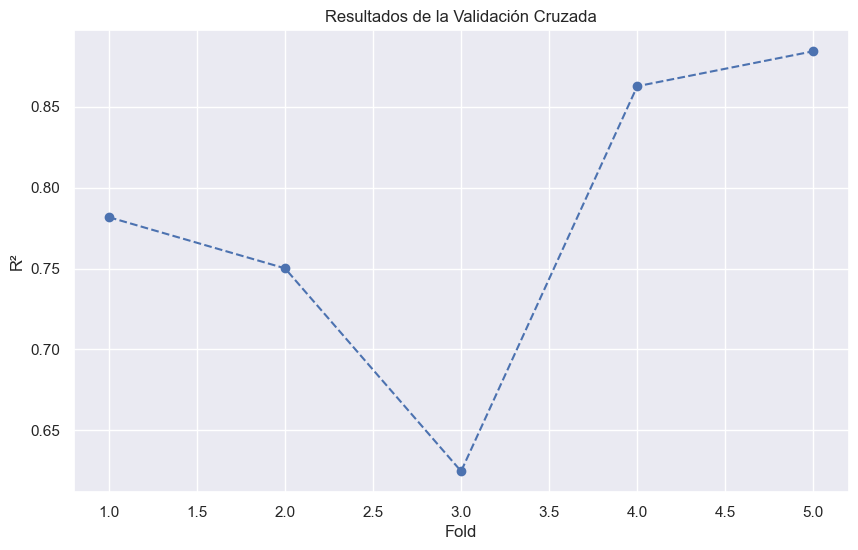

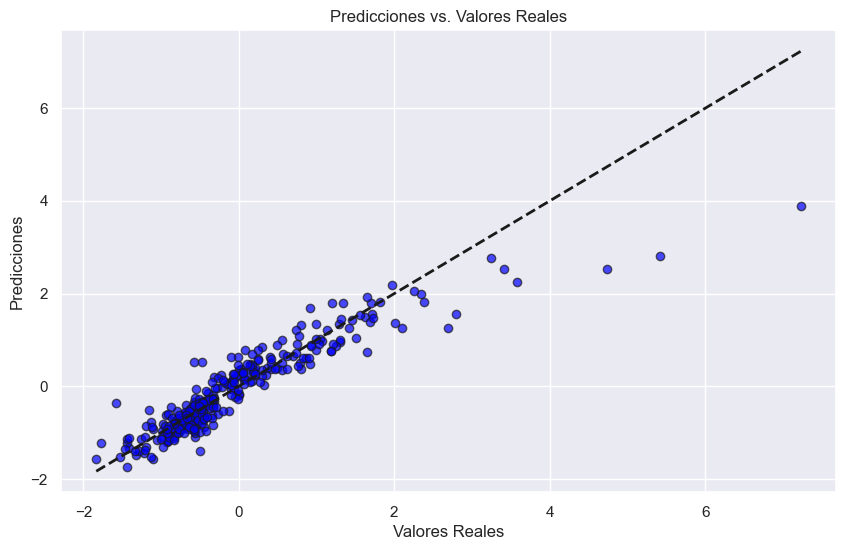

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que y_test y y_pred sean arrays de NumPy
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Verificar que y_test y y_pred tengan la misma longitud
assert len(y_test_array) == len(y_pred_array), "y_test y y_pred deben tener la misma longitud"

# Graficar los resultados de la validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_cv_scores ) + 1), r2_cv_scores, marker='o', linestyle='--', color='b')
plt.title('Resultados de la Validación Cruzada')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.grid(True)
plt.show()

# Graficar las predicciones vs. los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### Lasso 

In [34]:
# Definir el modelo
model = Lasso()

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()

# Ajustar el modelo a los datos de entrenamiento completos
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Crear un diccionario con las métricas
metricas = {
    "Métrica": ["MSE (Validación cruzada)", "R² (Validación cruzada)", "MAE (Validación cruzada)", 
                "RMSE (Prueba)", "R² (Prueba)", "MAE (Prueba)"],
    "Valor": [mse_cv, r2_cv, mae_cv, rmse_test, r2_test, mae_test]
}

df_metricas = pd.DataFrame(metricas)

df_metricas

Métrica     Valor
0  MSE (Validación cruzada)  0.946731
1   R² (Validación cruzada) -0.003663
2  MAE (Validación cruzada)  0.709441
3             RMSE (Prueba)  1.103302
4               R² (Prueba) -0.000882
5              MAE (Prueba)  0.787958

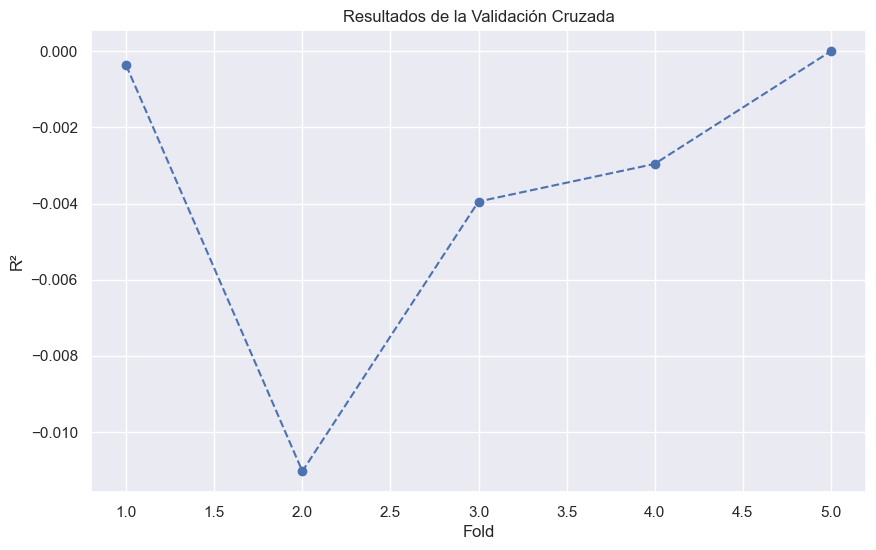

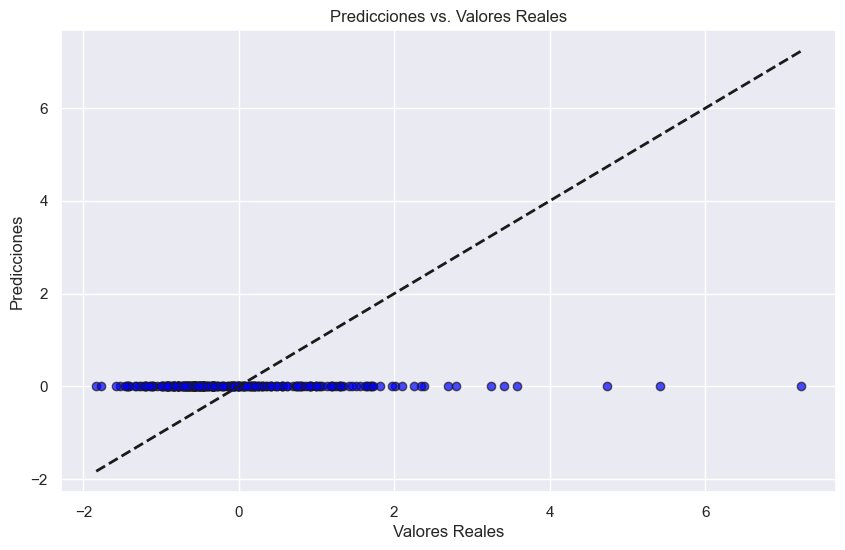

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que y_test y y_pred sean arrays de NumPy
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Verificar que y_test y y_pred tengan la misma longitud
assert len(y_test_array) == len(y_pred_array), "y_test y y_pred deben tener la misma longitud"

# Graficar los resultados de la validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_cv_scores ) + 1), r2_cv_scores, marker='o', linestyle='--', color='b')
plt.title('Resultados de la Validación Cruzada')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.grid(True)
plt.show()

# Graficar las predicciones vs. los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### Rigde 

In [36]:
# Definir el modelo
model = Ridge()

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()

# Ajustar el modelo a los datos de entrenamiento completos
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Crear un diccionario con las métricas
metricas = {
    "Métrica": ["MSE (Validación cruzada)", "R² (Validación cruzada)", "MAE (Validación cruzada)", 
                "RMSE (Prueba)", "R² (Prueba)", "MAE (Prueba)"],
    "Valor": [mse_cv, r2_cv, mae_cv, rmse_test, r2_test, mae_test]
}

df_metricas = pd.DataFrame(metricas)

df_metricas

Métrica     Valor
0  MSE (Validación cruzada)  0.217202
1   R² (Validación cruzada)  0.780880
2  MAE (Validación cruzada)  0.262537
3             RMSE (Prueba)  0.433400
4               R² (Prueba)  0.845555
5              MAE (Prueba)  0.270125

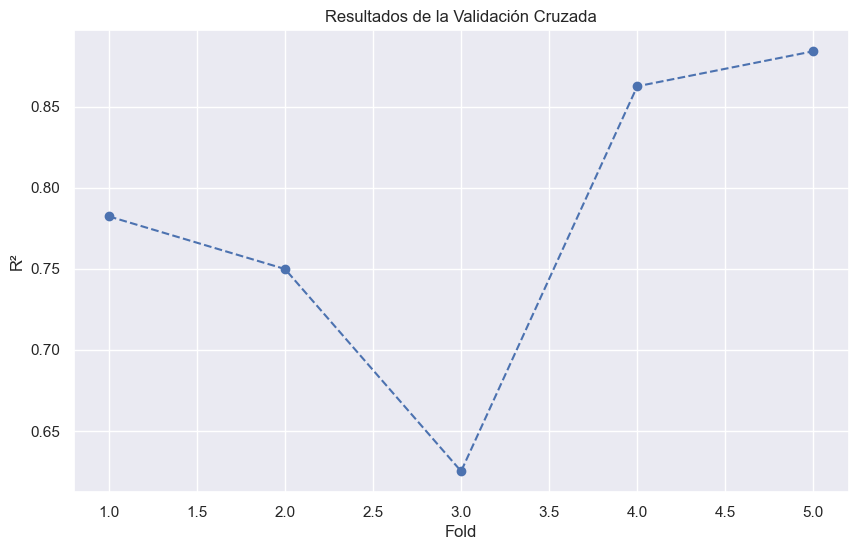

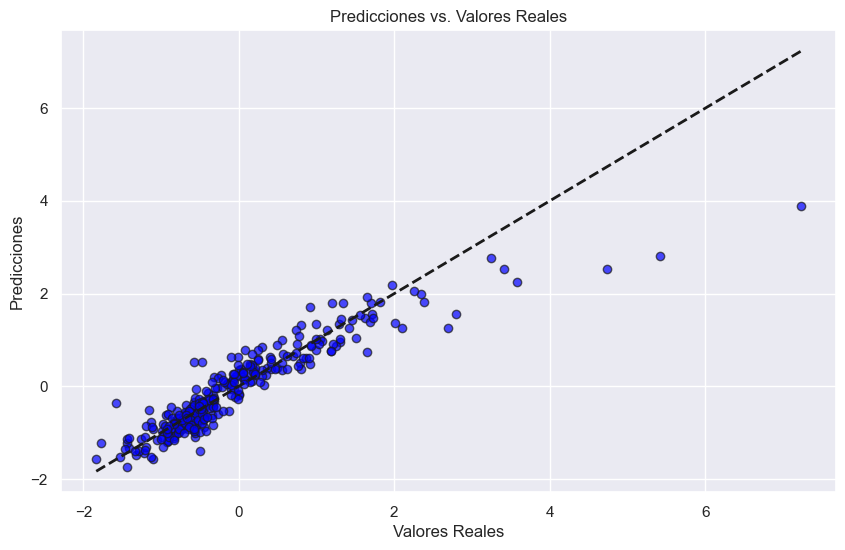

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que y_test y y_pred sean arrays de NumPy
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Verificar que y_test y y_pred tengan la misma longitud
assert len(y_test_array) == len(y_pred_array), "y_test y y_pred deben tener la misma longitud"

# Graficar los resultados de la validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_cv_scores ) + 1), r2_cv_scores, marker='o', linestyle='--', color='b')
plt.title('Resultados de la Validación Cruzada')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.grid(True)
plt.show()

# Graficar las predicciones vs. los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### Arbol de decisión 

In [38]:
# Definir el modelo
model = DecisionTreeRegressor(random_state=42)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()

# Ajustar el modelo a los datos de entrenamiento completos
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Crear un diccionario con las métricas
metricas = {
    "Métrica": ["MSE (Validación cruzada)", "R² (Validación cruzada)", "MAE (Validación cruzada)", 
                "RMSE (Prueba)", "R² (Prueba)", "MAE (Prueba)"],
    "Valor": [mse_cv, r2_cv, mae_cv, rmse_test, r2_test, mae_test]
}

df_metricas = pd.DataFrame(metricas)

df_metricas

Métrica     Valor
0  MSE (Validación cruzada)  0.348809
1   R² (Validación cruzada)  0.626535
2  MAE (Validación cruzada)  0.344028
3             RMSE (Prueba)  0.559920
4               R² (Prueba)  0.742222
5              MAE (Prueba)  0.357046

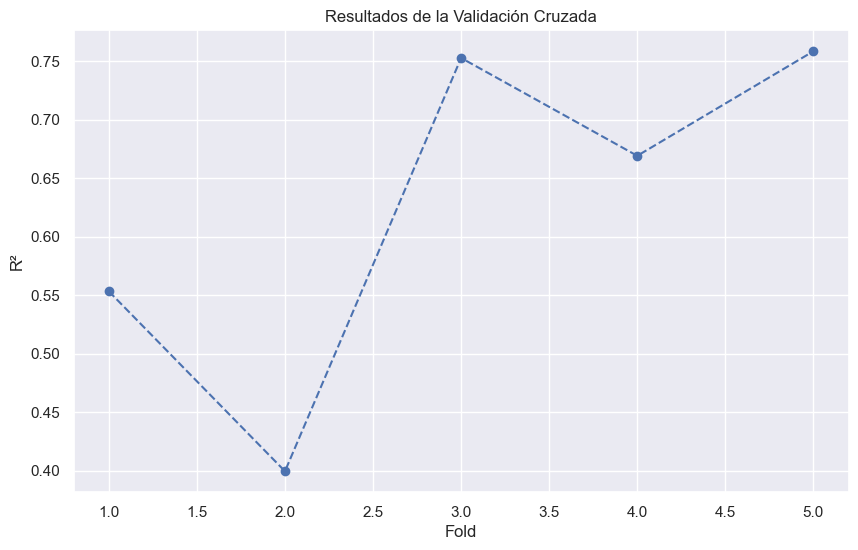

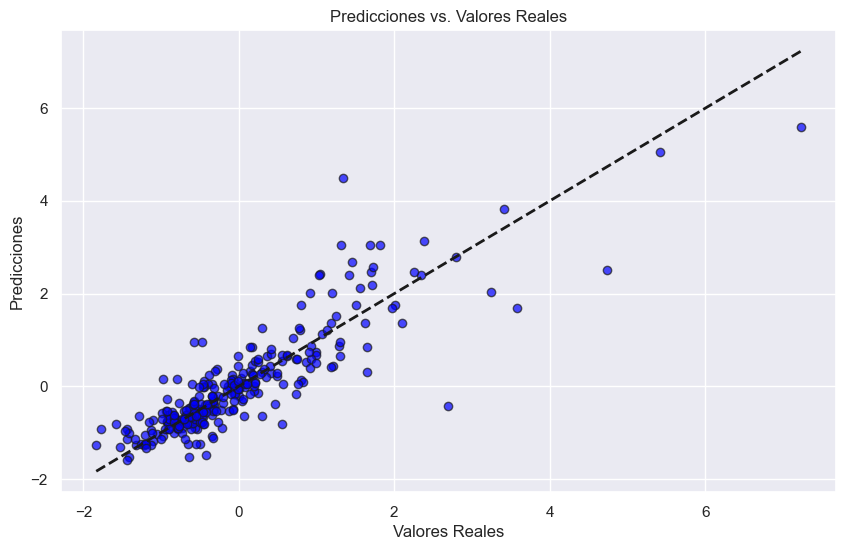

In [39]:
# Asegúrate de que y_test y y_pred sean arrays de NumPy
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Verificar que y_test y y_pred tengan la misma longitud
assert len(y_test_array) == len(y_pred_array), "y_test y y_pred deben tener la misma longitud"

# Graficar los resultados de la validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_cv_scores ) + 1), r2_cv_scores, marker='o', linestyle='--', color='b')
plt.title('Resultados de la Validación Cruzada')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.grid(True)
plt.show()

# Graficar las predicciones vs. los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### Random Forest 

In [40]:
# Definir el modelo
model = RandomForestRegressor(random_state=42)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()

# Ajustar el modelo a los datos de entrenamiento completos
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Crear un diccionario con las métricas
metricas = {
    "Métrica": ["MSE (Validación cruzada)", "R² (Validación cruzada)", "MAE (Validación cruzada)", 
                "RMSE (Prueba)", "R² (Prueba)", "MAE (Prueba)"],
    "Valor": [mse_cv, r2_cv, mae_cv, rmse_test, r2_test, mae_test]
}

df_metricas = pd.DataFrame(metricas)

df_metricas

c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Métrica     Valor
0  MSE (Validación cruzada)  0.154562
1   R² (Validación cruzada)  0.836373
2  MAE (Validación cruzada)  0.231031
3             RMSE (Prueba)  0.360188
4               R² (Prueba)  0.893328
5              MAE (Prueba)  0.220005

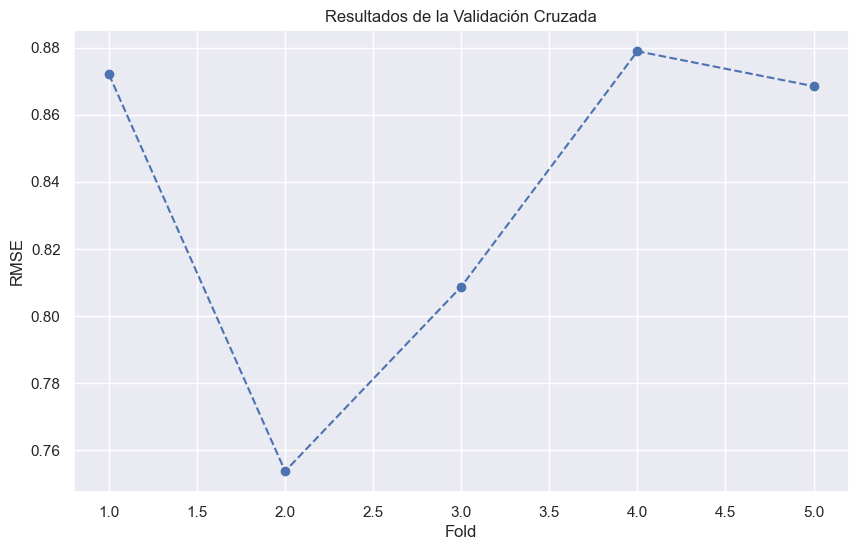

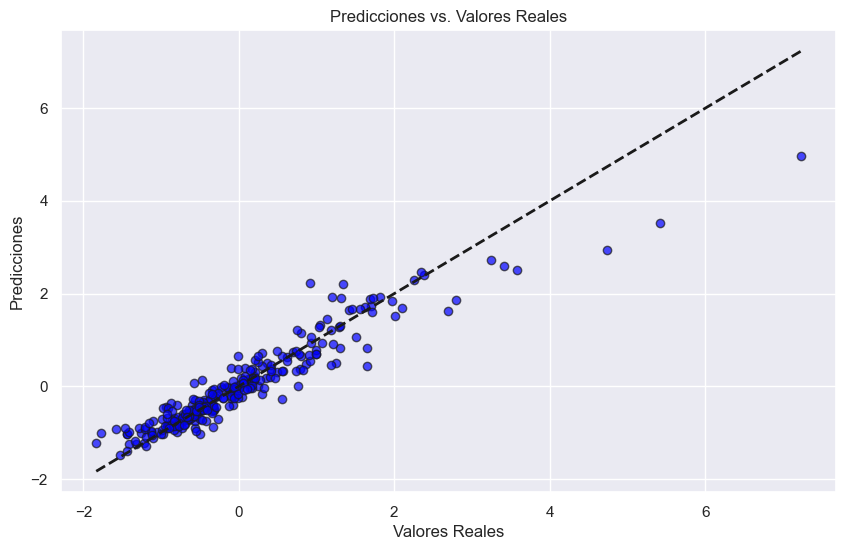

In [41]:
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

assert len(y_test_array) == len(y_pred_array), "y_test y y_pred deben tener la misma longitud"

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_cv_scores) + 1),r2_cv_scores, marker='o', linestyle='--', color='b')
plt.title('Resultados de la Validación Cruzada')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

## Mejores Hiperparamaetros Validacion Cruzada 

### Regresion Lineal 

In [42]:
# Definir el modelo
model = LinearRegression()

# Definir el rango de hiperparámetros
param_grid = {
    'fit_intercept': [True, False],  # Si se debe calcular el intercepto
    'positive': [True, False]       # Forzar coeficientes positivos
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica a optimizar (Error cuadrático negativo)
    cv=5,                             # Número de folds de validación cruzada
    n_jobs=-1,                        # Paralelización
)

# Realizar la búsqueda
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor RMSE (negativo):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE en prueba:", rmse)
print("R2 en prueba:", r2)
print("MAE en prueba:", mae)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()
print("MSE promedio de la validación cruzada:", mse_cv)

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()
print("MAE promedio de la validación cruzada:", mae_cv)

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()
print("R² promedio de la validación cruzada:", r2_cv)

Mejores parámetros: {'fit_intercept': False, 'positive': False}
Mejor RMSE (negativo): 0.4661720002896063
RMSE en prueba: 0.4329862135541664
R2 en prueba: 0.845850338408183
MAE en prueba: 0.27015296887377005
MSE promedio de la validación cruzada: 0.21731633385401272
MAE promedio de la validación cruzada: 0.26328320855030973
R² promedio de la validación cruzada: 0.7807743671358885


### Lasso

In [43]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [1000, 5000, 10000],
    'tol': [0.0001, 0.001, 0.01]
}

# Crear el objeto GridSearchCV para Lasso
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x, y)


# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor RMSE (negativo):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE en prueba:", rmse)
print("R2 en prueba:", r2)
print("MAE en prueba:", mae)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()
print("MSE promedio de la validación cruzada:", mse_cv)

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()
print("MAE promedio de la validación cruzada:", mae_cv)

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()
print("R² promedio de la validación cruzada:", r2_cv)

Mejores parámetros: {'alpha': 0.01, 'max_iter': 1000, 'tol': 0.01}
Mejor RMSE (negativo): 0.43641990059848873
RMSE en prueba: 0.4123609152246929
R2 en prueba: 0.8601863967470311
MAE en prueba: 0.2512207093816591
MSE promedio de la validación cruzada: 0.20517190273981822
MAE promedio de la validación cruzada: 0.2520320823039271
R² promedio de la validación cruzada: 0.7930779076668565


### Rigde 

In [44]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [1000, 5000, 10000],
    'tol': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor RMSE (negativo):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE en prueba:", rmse)
print("R2 en prueba:", r2)
print("MAE en prueba:", mae)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()
print("MSE promedio de la validación cruzada:", mse_cv)

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()
print("MAE promedio de la validación cruzada:", mae_cv)

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()
print("R² promedio de la validación cruzada:", r2_cv)

Mejores parámetros: {'alpha': 100.0, 'max_iter': 10000, 'solver': 'saga', 'tol': 0.01}
Mejor RMSE (negativo): 0.45344539090109687
RMSE en prueba: 0.4340969624950003
R2 en prueba: 0.8450584370164652
MAE en prueba: 0.2635571351401496
MSE promedio de la validación cruzada: 0.2054813157483913
MAE promedio de la validación cruzada: 0.2546343149886585
R² promedio de la validación cruzada: 0.7915177583725324


### Arboles de decision regresion

In [45]:

param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Crear el objeto GridSearchCV para DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor RMSE (negativo):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE en prueba:", rmse)
print("R2 en prueba:", r2)
print("MAE en prueba:", mae)

# Realizar la validación cruzada para MSE
mse_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_cv = -mse_cv_scores.mean()
print("MSE promedio de la validación cruzada:", mse_cv)

# Realizar la validación cruzada para MAE
mae_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_cv = -mae_cv_scores.mean()
print("MAE promedio de la validación cruzada:", mae_cv)

# Realizar la validación cruzada para R²
r2_cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
r2_cv = r2_cv_scores.mean()
print("R² promedio de la validación cruzada:", r2_cv)

Mejores parámetros: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Mejor RMSE (negativo): 0.5179875099217515
RMSE en prueba: 0.5045651200493553
R2 en prueba: 0.7906712458526362
MAE en prueba: 0.33406430010850346
MSE promedio de la validación cruzada: 0.2683110604349366
MAE promedio de la validación cruzada: 0.33503099907484657
R² promedio de la validación cruzada: 0.7125736803092323


c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4860 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
253 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\rueda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

### Random Forest

In [ ]:
# Optimización de Hiperparámetros para el mejor modelo (por ejemplo, RandomForestRegressor)
param_grid = {
    'n_estimators': list(range(1, 301, 50)),
    'max_depth': list(range(10, 101, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'random_state' : [42]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)


# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor RMSE (negativo):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calcular métricas finales en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("RMSE en prueba:", rmse)
print("R2 en prueba:", r2)
print("MAE en prueba:", mae)

